### Статистика

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sample_input = pd.read_csv('/content/drive/MyDrive/12345/train/input_2023_w01.csv')
sample_output = pd.read_csv('/content/drive/MyDrive/12345/train/output_2023_w01.csv')
print(f"Input shape: {sample_input.shape}")
print(f"Output shape: {sample_output.shape}")

Input shape: (285714, 23)
Output shape: (32088, 6)


Инфо инпут

In [ ]:
sample_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285714 entries, 0 to 285713
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   285714 non-null  int64  
 1   play_id                   285714 non-null  int64  
 2   player_to_predict         285714 non-null  bool   
 3   nfl_id                    285714 non-null  int64  
 4   frame_id                  285714 non-null  int64  
 5   play_direction            285714 non-null  object 
 6   absolute_yardline_number  285714 non-null  int64  
 7   player_name               285714 non-null  object 
 8   player_height             285714 non-null  object 
 9   player_weight             285714 non-null  int64  
 10  player_birth_date         285714 non-null  object 
 11  player_position           285714 non-null  object 
 12  player_side               285714 non-null  object 
 13  player_role               285714 non-null  o

In [ ]:
sample_input.head()

game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101              False   54527         1          right   
1  2023090700      101              False   54527         2          right   
2  2023090700      101              False   54527         3          right   
3  2023090700      101              False   54527         4          right   
4  2023090700      101              False   54527         5          right   

   absolute_yardline_number player_name player_height  player_weight  ...  \
0                        42  Bryan Cook           6-1            210  ...   
1                        42  Bryan Cook           6-1            210  ...   
2                        42  Bryan Cook           6-1            210  ...   
3                        42  Bryan Cook           6-1            210  ...   
4                        42  Bryan Cook           6-1            210  ...   

          player_role      x      y     s     a     dir       o  \
0  Defensive Coverage  52.33  36.94  0.09  0.39  322.40  238.24   
1  Defensive Coverage  52.33  36.94  0.04  0.61  200.89  236.05   
2  Defensive Coverage  52.33  36.93  0.12  0.73  147.55  240.60   
3  Defensive Coverage  52.35  36.92  0.23  0.81  131.40  244.25   
4  Defensive Coverage  52.37  36.90  0.35  0.82  123.26  244.25   

   num_frames_output  ball_land_x  ball_land_y  
0                 21    63.259998        -0.22  
1                 21    63.259998        -0.22  
2                 21    63.259998        -0.22  
3                 21    63.259998        -0.22  
4                 21    63.259998        -0.22  

[5 rows x 23 columns]

Инфо аутпут

In [ ]:
sample_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32088 entries, 0 to 32087
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   game_id   32088 non-null  int64  
 1   play_id   32088 non-null  int64  
 2   nfl_id    32088 non-null  int64  
 3   frame_id  32088 non-null  int64  
 4   x         32088 non-null  float64
 5   y         32088 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.5 MB


In [ ]:
sample_output.head()

game_id  play_id  nfl_id  frame_id      x      y
0  2023090700      101   46137         1  56.22  17.28
1  2023090700      101   46137         2  56.63  16.88
2  2023090700      101   46137         3  57.06  16.46
3  2023090700      101   46137         4  57.48  16.02
4  2023090700      101   46137         5  57.91  15.56

Статистика инпут

In [ ]:
sample_input.describe()

game_id        play_id         nfl_id       frame_id  \
count  2.857140e+05  285714.000000  285714.000000  285714.000000   
mean   2.023091e+09    2284.758118   49278.353829      16.055010   
std    8.575269e+01    1239.145629    5173.118005      10.689869   
min    2.023091e+09      55.000000   34452.000000       1.000000   
25%    2.023091e+09    1232.000000   44995.000000       8.000000   
50%    2.023091e+09    2263.000000   48456.000000      15.000000   
75%    2.023091e+09    3302.000000   53609.000000      23.000000   
max    2.023091e+09    4699.000000   56663.000000      74.000000   

       absolute_yardline_number  player_weight              x              y  \
count             285714.000000  285714.000000  285714.000000  285714.000000   
mean                  60.343049     211.784074      60.466355      26.751004   
std                   23.534325      21.965350      24.007917      10.035753   
min                   11.000000     153.000000       1.210000       0.970000   
25%                   40.000000     195.000000      41.630000      18.900000   
50%                   59.000000     208.000000      58.810000      26.710000   
75%                   79.000000     226.000000      78.520000      34.530000   
max                  109.000000     347.000000     119.860000      52.430000   

                   s              a            dir              o  \
count  285714.000000  285714.000000  285714.000000  285714.000000   
mean        3.041966       2.126249     177.926268     181.198227   
std         2.231126       1.430355     100.934248      98.972312   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.120000       1.010000      89.530000      89.930000   
50%         2.730000       1.920000     173.365000     182.230000   
75%         4.650000       3.050000     269.580000     271.320000   
max        12.530000      17.120000     359.990000     359.990000   

       num_frames_output    ball_land_x    ball_land_y  
count      285714.000000  285714.000000  285714.000000  
mean           11.298669      60.851685      26.215487  
std             5.727945      25.759902      15.275341  
min             5.000000       1.330000      -1.690000  
25%             8.000000      41.730000      12.640000  
50%            10.000000      59.060001      25.450001  
75%            13.000000      78.970001      39.250000  
max            94.000000     119.779999      57.330002

In [ ]:
print(f"Уникальных игр: {sample_input['game_id'].nunique()}")
print(f"Уникальных plays: {sample_input.groupby('game_id')['play_id'].nunique().sum()}")
print(f"Уникальных игроков: {sample_input['nfl_id'].nunique()}")

Уникальных игр: 16
Уникальных plays: 819
Уникальных игроков: 737


Анализ frame_id в инпут

In [ ]:
print(f"Макс: {sample_input['frame_id'].max()}")
print(f"Мин: {sample_input['frame_id'].min()}")

Макс: 74
Мин: 1


In [ ]:
sample_input['num_frames_output'].describe()

count    285714.000000
mean         11.298669
std           5.727945
min           5.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          94.000000
Name: num_frames_output, dtype: float64

Анализ num_frames_output

In [ ]:
print(f"Мин. кадров для предсказания: {sample_input['num_frames_output'].min()}")
print(f"Макс. кадров для предсказания: {sample_input['num_frames_output'].max()}")
print(f"Медиана: {sample_input['num_frames_output'].median()}")

Мин. кадров для предсказания: 5
Макс. кадров для предсказания: 94
Медиана: 10.0


Распределение по ролям игроков

In [ ]:
sample_input['player_role'].value_counts()

player_role
Defensive Coverage    155397
Other Route Runner     84063
Targeted Receiver      23151
Passer                 23103
Name: count, dtype: int64

Распределение по позициям

In [ ]:
sample_input['player_position'].value_counts().head(15)

player_position
WR     62341
CB     59753
FS     29470
TE     24359
QB     23059
SS     22636
RB     19050
ILB    17638
MLB    12282
OLB    11539
FB      1508
DE      1424
S        553
DT        65
NT        37
Name: count, dtype: int64

Распределение по сторонам (Offense/Defense)

In [ ]:
sample_input['player_side'].value_counts()

player_side
Defense    155397
Offense    130317
Name: count, dtype: int64

Игроки для предсказания

In [ ]:
sample_input['player_to_predict'].value_counts()

player_to_predict
False    209315
True      76399
Name: count, dtype: int64

Скорость

In [ ]:
print(f"Средняя: {sample_input['s'].mean():.2f}")
print(f"Медиана: {sample_input['s'].median():.2f}")
print(f"Макс: {sample_input['s'].max():.2f}")
print(f"Мин: {sample_input['s'].min():.2f}")

Средняя: 3.04
Медиана: 2.73
Макс: 12.53
Мин: 0.00


Ускорение

In [ ]:
print(f"Среднее: {sample_input['a'].mean():.2f}")
print(f"Медиана: {sample_input['a'].median():.2f}")
print(f"Макс: {sample_input['a'].max():.2f}")
print(f"Мин: {sample_input['a'].min():.2f}")

Среднее: 2.13
Медиана: 1.92
Макс: 17.12
Мин: 0.00


Координаты X (длина поля: 0-120 ярдов)

In [ ]:
print(f"Средняя: {sample_input['x'].mean():.2f}")
print(f"Медиана: {sample_input['x'].median():.2f}")
print(f"Диапазон: [{sample_input['x'].min():.2f}, {sample_input['x'].max():.2f}]")

Средняя: 60.47
Медиана: 58.81
Диапазон: [1.21, 119.86]


Координаты Y (ширина поля: 0-53.3 ярдов)

In [ ]:
print(f"Средняя: {sample_input['y'].mean():.2f}")
print(f"Медиана: {sample_input['y'].median():.2f}")
print(f"Диапазон: [{sample_input['y'].min():.2f}, {sample_input['y'].max():.2f}]")

Средняя: 26.75
Медиана: 26.71
Диапазон: [0.97, 52.43]


Точка приземления мяча

In [ ]:
print(f"Ball land X - средняя: {sample_input['ball_land_x'].mean():.2f}")
print(f"Ball land Y - средняя: {sample_input['ball_land_y'].mean():.2f}")

Ball land X - средняя: 60.85
Ball land Y - средняя: 26.22


Распределение направлений

In [ ]:
sample_input['play_direction'].value_counts()

play_direction
right    152219
left     133495
Name: count, dtype: int64

In [ ]:
sample_play = sample_input.groupby(['game_id', 'play_id']).first().reset_index().iloc[0]
game_id = sample_play['game_id']
play_id = sample_play['play_id']
play_input = sample_input[(sample_input['game_id'] == game_id) & (sample_input['play_id'] == play_id)]
play_output = sample_output[(sample_output['game_id'] == game_id) & (sample_output['play_id'] == play_id)]
print(f"Анализ play: game_id={game_id}, play_id={play_id}")
print(f"Количество игроков в play: {play_input['nfl_id'].nunique()}")
print(f"Количество входных фреймов: {play_input['frame_id'].max()}")
print(f"Количество выходных фреймов: {play_output['frame_id'].max()}")

Анализ play: game_id=2023090700, play_id=101
Количество игроков в play: 9
Количество входных фреймов: 26
Количество выходных фреймов: 21


Пропуски в инпут

In [ ]:
missing_input = sample_input.isnull().sum()
missing_input[missing_input > 0]

Series([], dtype: int64)

Пропуски в аутпут

In [ ]:
missing_output = sample_output.isnull().sum()
missing_output[missing_output > 0]

Series([], dtype: int64)

### Визуализации

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Тепловая карта поля

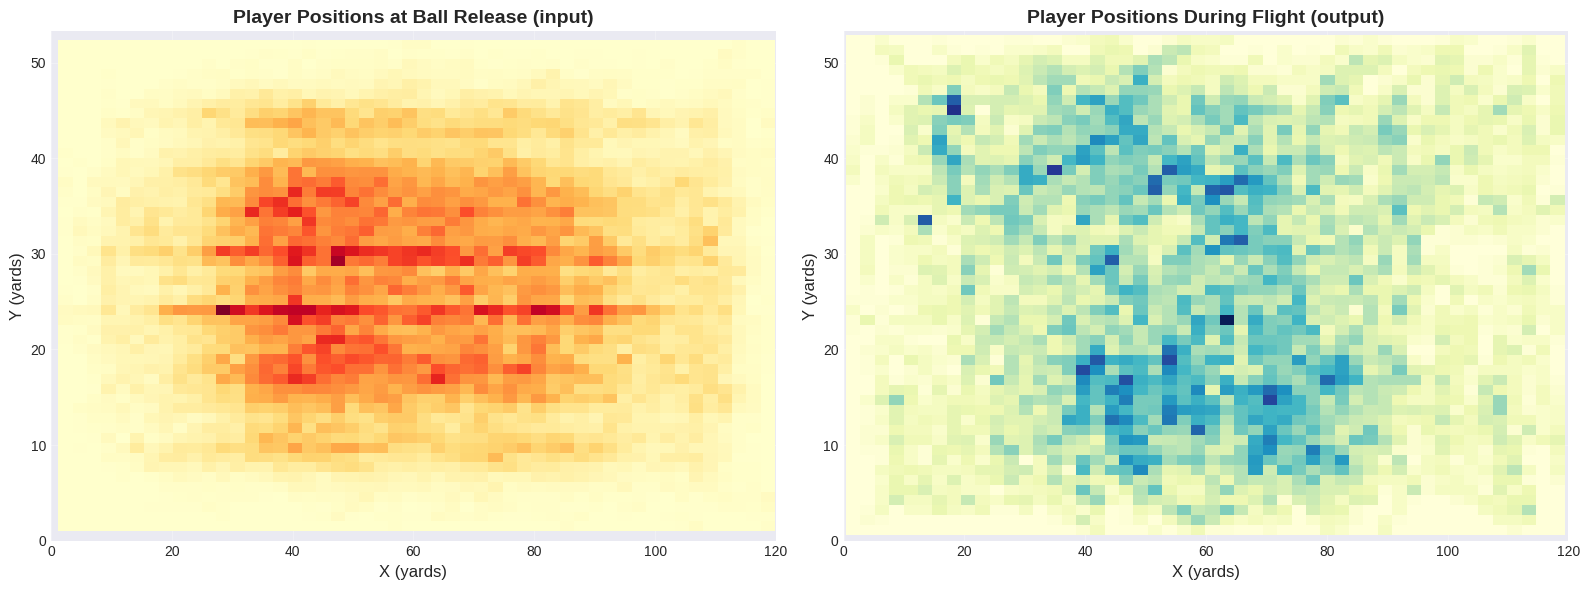

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist2d(sample_input['x'], sample_input['y'], bins=50, cmap='YlOrRd')
axes[0].set_xlim(0, 120)
axes[0].set_ylim(0, 53.3)
axes[0].set_xlabel('X (yards)', fontsize=12)
axes[0].set_ylabel('Y (yards)', fontsize=12)
axes[0].set_title('Player Positions at Ball Release (input)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[1].hist2d(sample_output['x'], sample_output['y'], bins=50, cmap='YlGnBu')
axes[1].set_xlim(0, 120)
axes[1].set_ylim(0, 53.3)
axes[1].set_xlabel('X (yards)', fontsize=12)
axes[1].set_ylabel('Y (yards)', fontsize=12)
axes[1].set_title('Player Positions During Flight (output)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Распределение скорости и ускорения

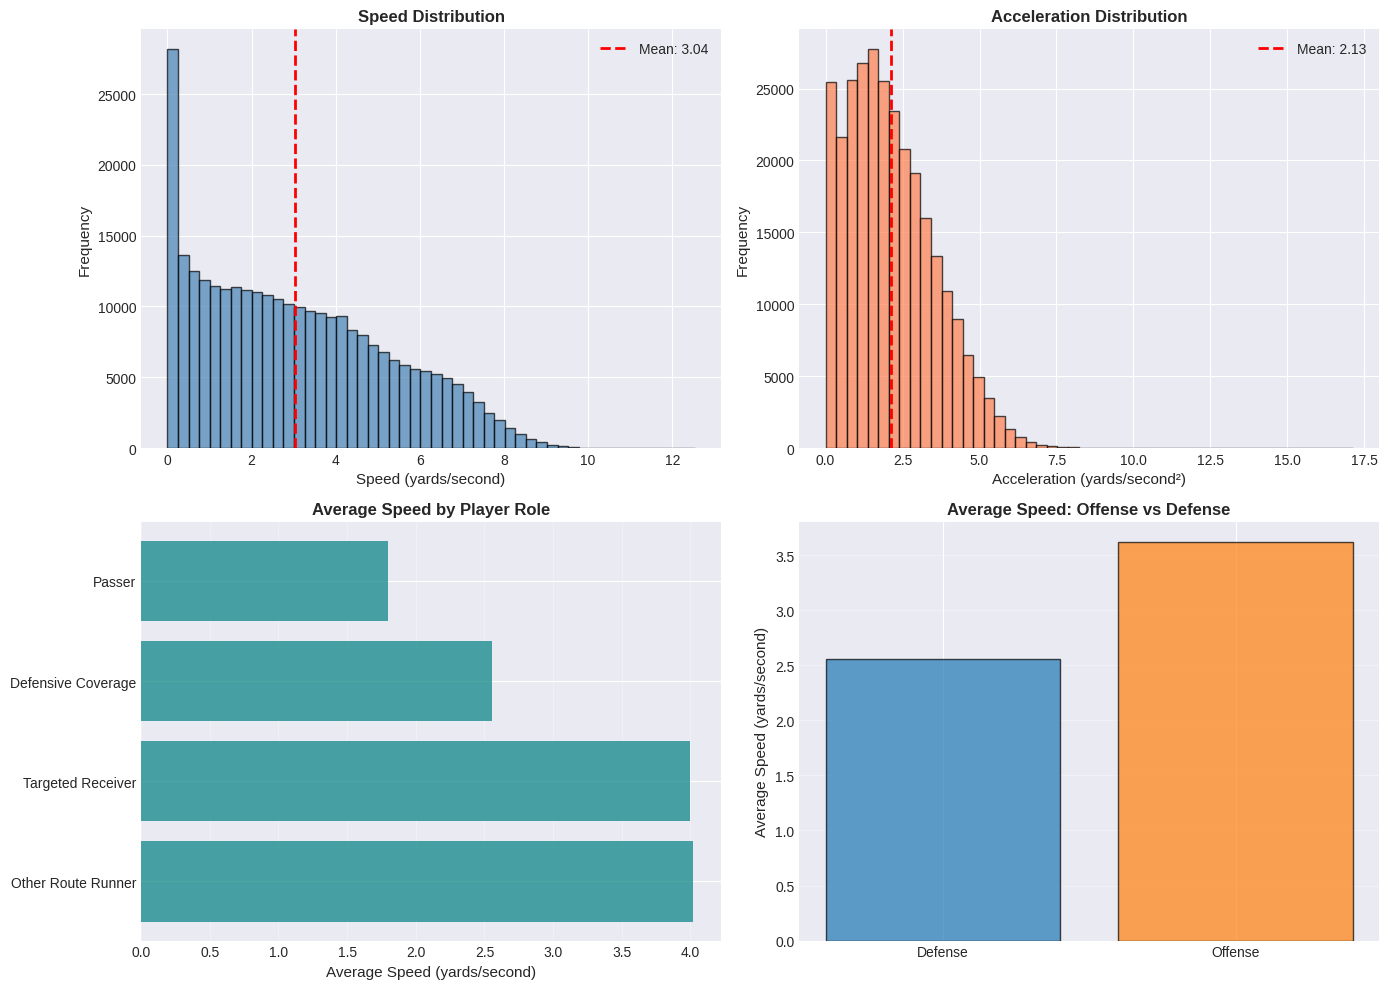

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0, 0].hist(sample_input['s'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Speed (yards/second)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Speed Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(sample_input['s'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_input["s"].mean():.2f}')
axes[0, 0].legend()
axes[0, 1].hist(sample_input['a'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Acceleration (yards/second²)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Acceleration Distribution', fontsize=12, fontweight='bold')
axes[0, 1].axvline(sample_input['a'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_input["a"].mean():.2f}')
axes[0, 1].legend()
speed_by_role = sample_input.groupby('player_role')['s'].mean().sort_values(ascending=False)
axes[1, 0].barh(range(len(speed_by_role)), speed_by_role.values, color='teal', alpha=0.7)
axes[1, 0].set_yticks(range(len(speed_by_role)))
axes[1, 0].set_yticklabels(speed_by_role.index, fontsize=10)
axes[1, 0].set_xlabel('Average Speed (yards/second)', fontsize=11)
axes[1, 0].set_title('Average Speed by Player Role', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, axis='x', alpha=0.3)
speed_by_side = sample_input.groupby('player_side')['s'].mean()
axes[1, 1].bar(speed_by_side.index, speed_by_side.values, color=['#1f77b4', '#ff7f0e'], alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Average Speed (yards/second)', fontsize=11)
axes[1, 1].set_title('Average Speed: Offense vs Defense', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Анализ длины прогноза

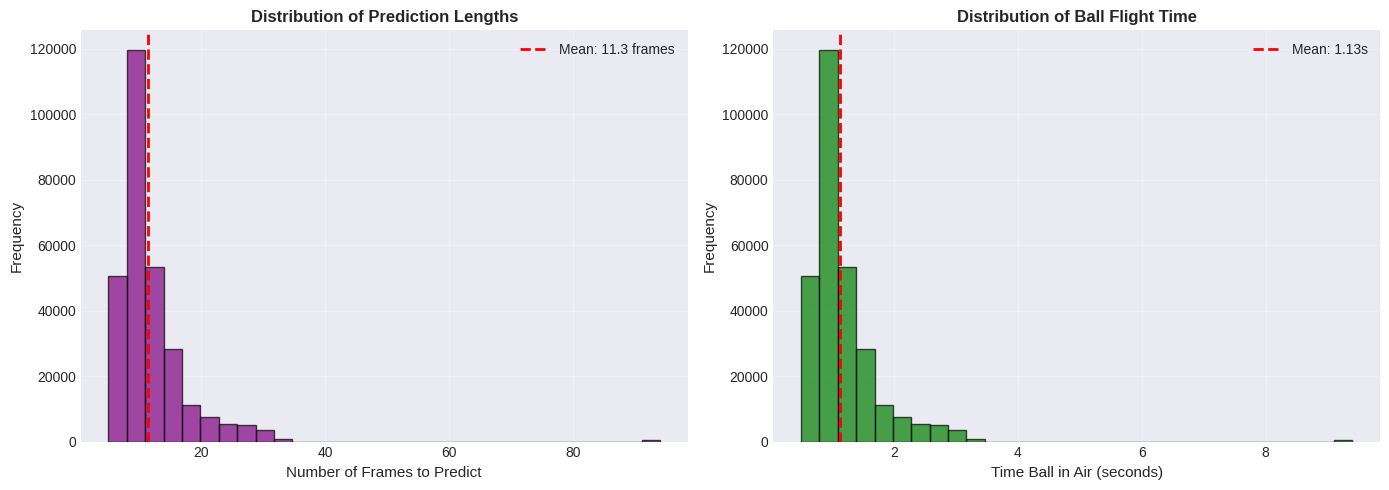

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(sample_input['num_frames_output'].dropna(), bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Number of Frames to Predict', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Prediction Lengths', fontsize=12, fontweight='bold')
axes[0].axvline(sample_input['num_frames_output'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_input["num_frames_output"].mean():.1f} frames')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
time_in_air = sample_input['num_frames_output'].dropna() / 10
axes[1].hist(time_in_air, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Time Ball in Air (seconds)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Distribution of Ball Flight Time', fontsize=12, fontweight='bold')
axes[1].axvline(time_in_air.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {time_in_air.mean():.2f}s')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Анализ роли и позиции игрока

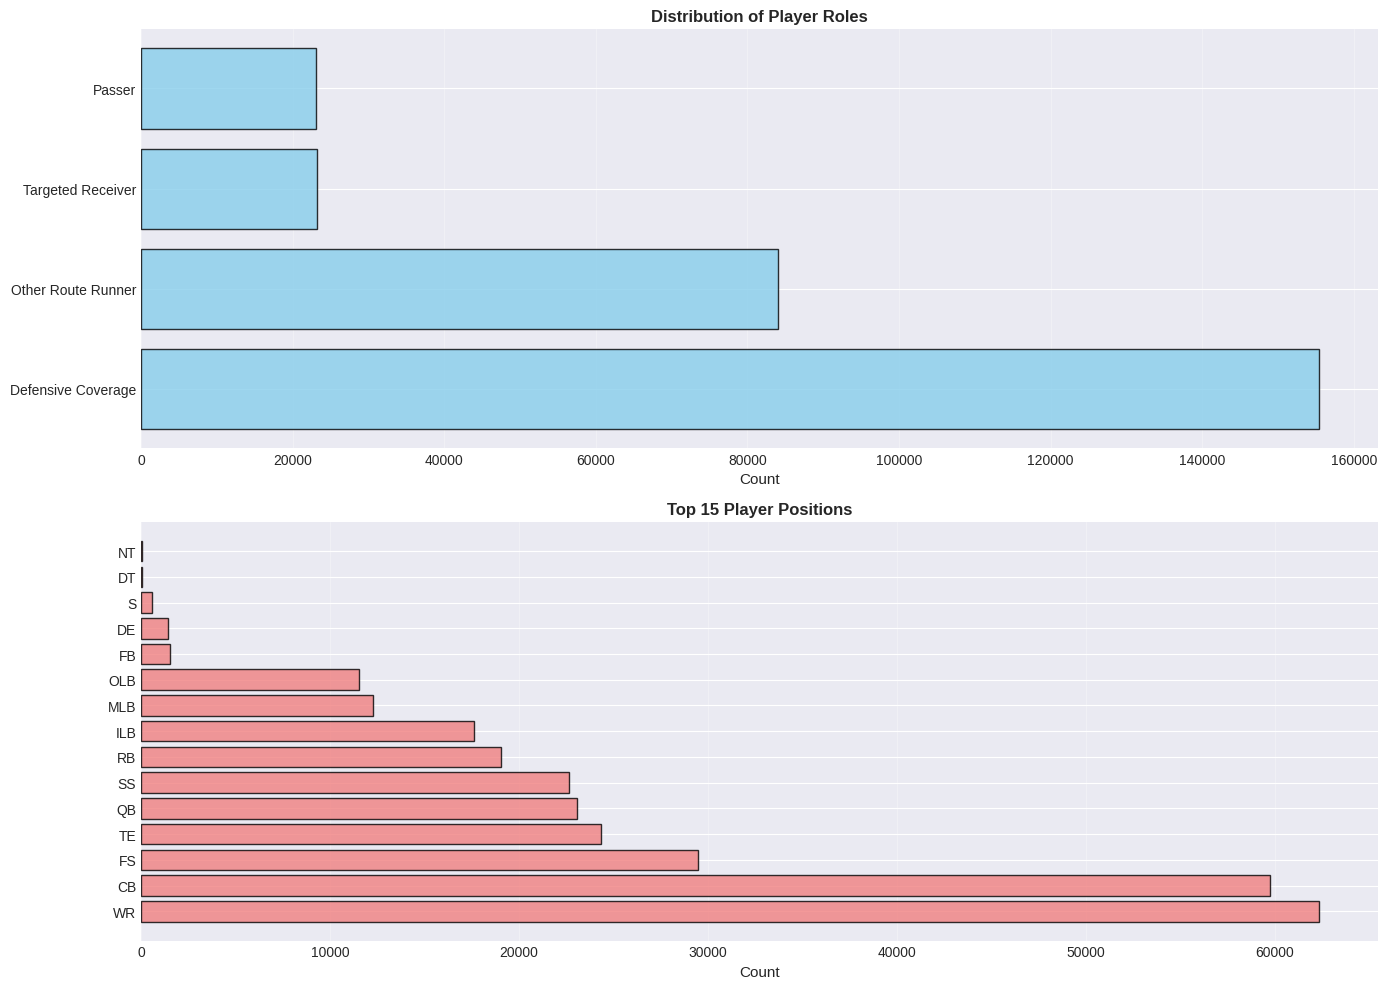

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
role_counts = sample_input['player_role'].value_counts()
axes[0].barh(range(len(role_counts)), role_counts.values, color='skyblue', alpha=0.8, edgecolor='black')
axes[0].set_yticks(range(len(role_counts)))
axes[0].set_yticklabels(role_counts.index, fontsize=10)
axes[0].set_xlabel('Count', fontsize=11)
axes[0].set_title('Distribution of Player Roles', fontsize=12, fontweight='bold')
axes[0].grid(True, axis='x', alpha=0.3)
position_counts = sample_input['player_position'].value_counts().head(15)
axes[1].barh(range(len(position_counts)), position_counts.values, color='lightcoral', alpha=0.8, edgecolor='black')
axes[1].set_yticks(range(len(position_counts)))
axes[1].set_yticklabels(position_counts.index, fontsize=10)
axes[1].set_xlabel('Count', fontsize=11)
axes[1].set_title('Top 15 Player Positions', fontsize=12, fontweight='bold')
axes[1].grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Пример траектории

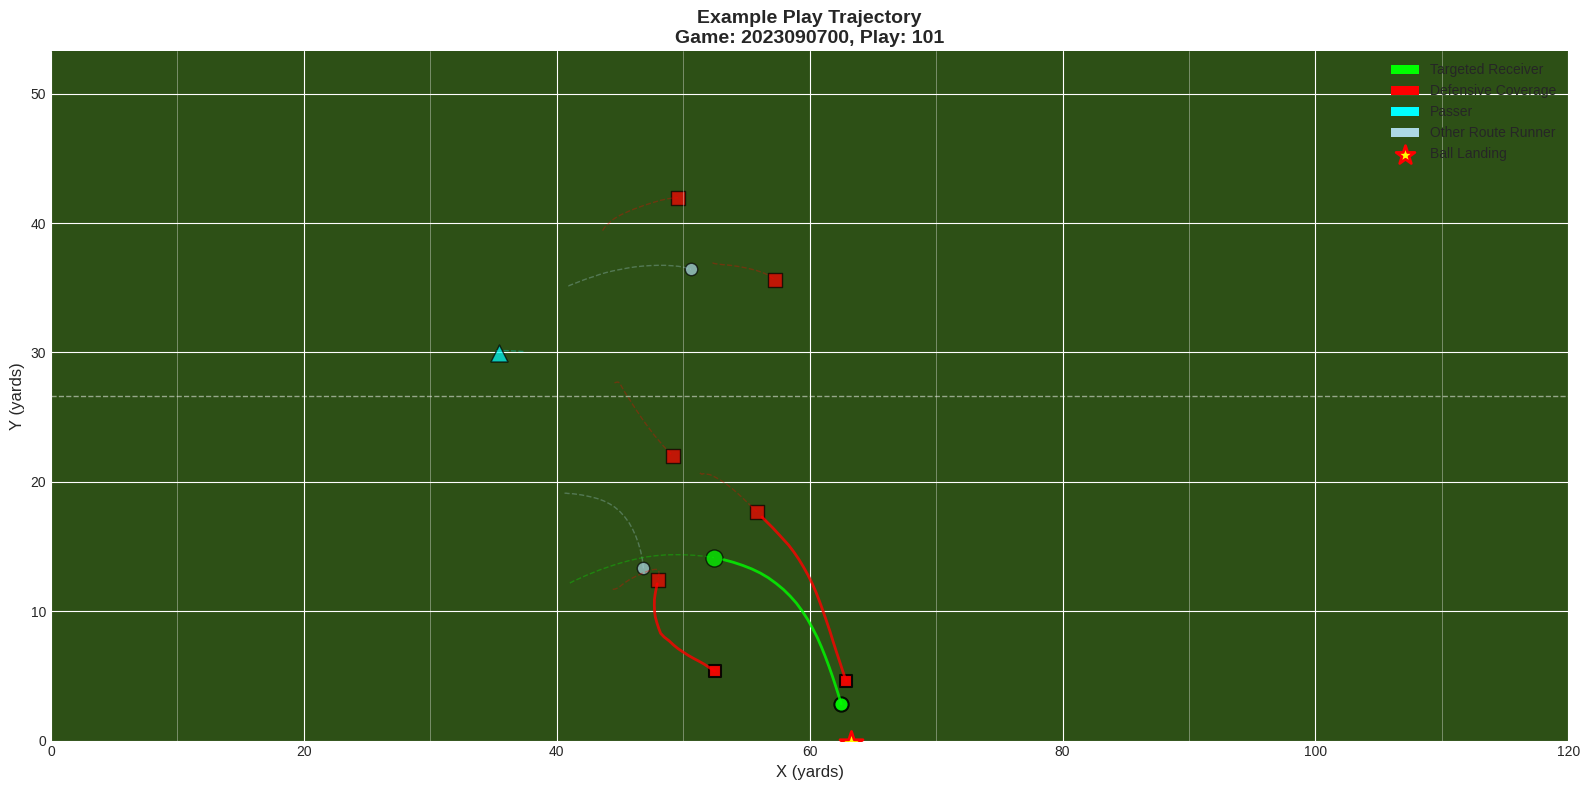

In [ ]:
plays_with_data = sample_input.merge(
    sample_output[['game_id', 'play_id']].drop_duplicates(),
    on=['game_id', 'play_id']
)
sample_play = plays_with_data.groupby(['game_id', 'play_id']).first().reset_index().iloc[0]
game_id = sample_play['game_id']
play_id = sample_play['play_id']
play_input = sample_input[(sample_input['game_id'] == game_id) & (sample_input['play_id'] == play_id)]
play_output = sample_output[(sample_output['game_id'] == game_id) & (sample_output['play_id'] == play_id)]
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('X (yards)', fontsize=12)
ax.set_ylabel('Y (yards)', fontsize=12)
ax.set_title(f'Example Play Trajectory\nGame: {game_id}, Play: {play_id}', fontsize=14, fontweight='bold')
for x in range(0, 121, 10):
    ax.axvline(x, color='white', linestyle='-', linewidth=0.5, alpha=0.5)
ax.axhline(53.3/2, color='white', linestyle='--', linewidth=1, alpha=0.5)
ball_land_x = play_input['ball_land_x'].iloc[0]
ball_land_y = play_input['ball_land_y'].iloc[0]
ax.scatter(ball_land_x, ball_land_y, c='yellow', s=300, marker='*', edgecolor='red', linewidth=2, zorder=10, label='Ball Landing')
for nfl_id in play_input['nfl_id'].unique():
    player_input = play_input[play_input['nfl_id'] == nfl_id].sort_values('frame_id')
    player_output = play_output[play_output['nfl_id'] == nfl_id].sort_values('frame_id')
    if len(player_input) > 0:
        role = player_input['player_role'].iloc[0]
        if 'Targeted' in role:
            color = 'lime'
            marker = 'o'
            s = 150
        elif 'Defensive' in role:
            color = 'red'
            marker = 's'
            s = 100
        elif 'Passer' in role:
            color = 'cyan'
            marker = '^'
            s = 150
        else:
            color = 'lightblue'
            marker = 'o'
            s = 80
        if len(player_input) > 1:
            ax.plot(player_input['x'], player_input['y'],
                   color=color, alpha=0.3, linewidth=1, linestyle='--')
        ax.scatter(player_input['x'].iloc[-1], player_input['y'].iloc[-1],
                  c=color, s=s, marker=marker, alpha=0.7, edgecolor='black', linewidth=1)
        if len(player_output) > 0:
            ax.plot(player_output['x'], player_output['y'],
                   color=color, alpha=0.8, linewidth=2)
            ax.scatter(player_output['x'].iloc[-1], player_output['y'].iloc[-1],
                      c=color, s=s*0.7, marker=marker, alpha=0.9, edgecolor='black', linewidth=1.5)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lime', label='Targeted Receiver'),
    Patch(facecolor='red', label='Defensive Coverage'),
    Patch(facecolor='cyan', label='Passer'),
    Patch(facecolor='lightblue', label='Other Route Runner'),
    plt.scatter([], [], c='yellow', s=200, marker='*', edgecolor='red', linewidth=2, label='Ball Landing')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)
ax.set_facecolor('#2d5016')
plt.tight_layout()
plt.show()

Матрица корреляций

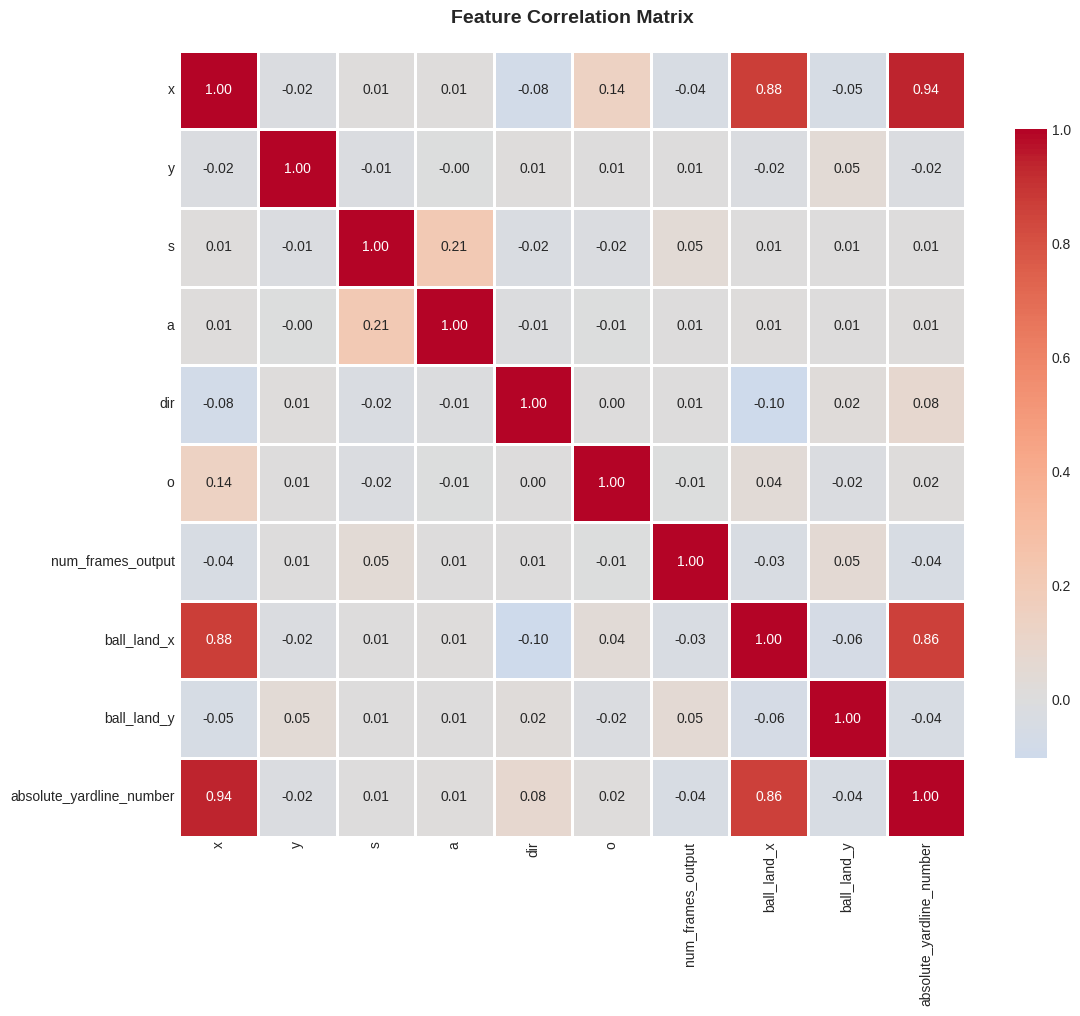

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
numeric_features = ['x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y', 'absolute_yardline_number']
corr_data = sample_input[numeric_features].corr()
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Анализ расстояния до мяча

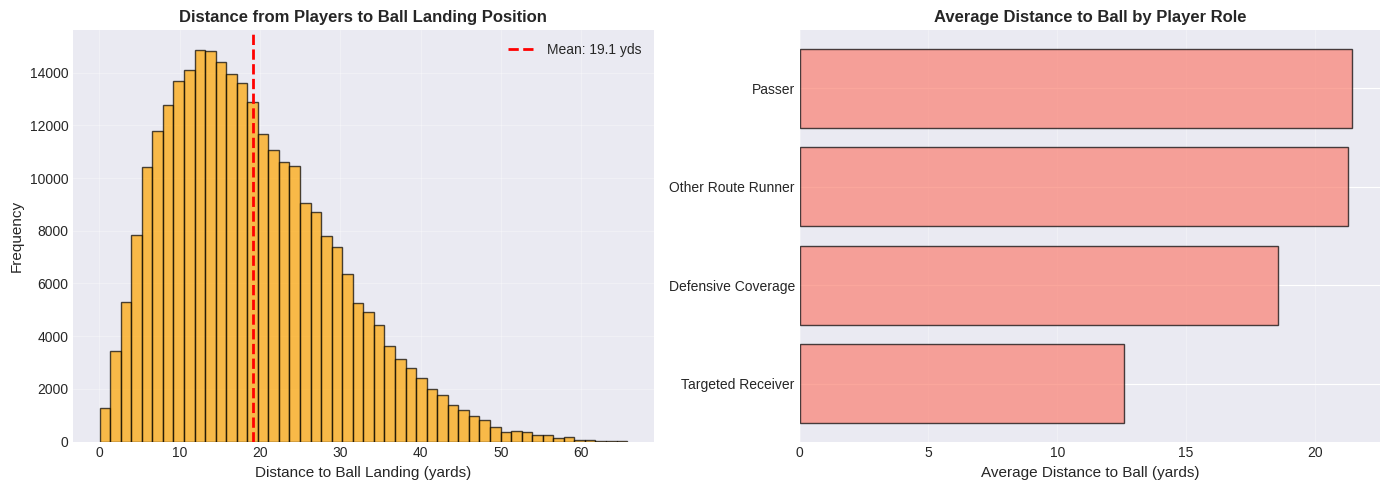

In [ ]:
sample_input['distance_to_ball'] = np.sqrt((sample_input['x'] - sample_input['ball_land_x'])**2 + (sample_input['y'] - sample_input['ball_land_y'])**2)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(sample_input['distance_to_ball'], bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Distance to Ball Landing (yards)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distance from Players to Ball Landing Position', fontsize=12, fontweight='bold')
axes[0].axvline(sample_input['distance_to_ball'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sample_input["distance_to_ball"].mean():.1f} yds')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
dist_by_role = sample_input.groupby('player_role')['distance_to_ball'].mean().sort_values()
axes[1].barh(range(len(dist_by_role)), dist_by_role.values, color='salmon', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(dist_by_role)))
axes[1].set_yticklabels(dist_by_role.index, fontsize=10)
axes[1].set_xlabel('Average Distance to Ball (yards)', fontsize=11)
axes[1].set_title('Average Distance to Ball by Player Role', fontsize=12, fontweight='bold')
axes[1].grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Бейслайн

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def load_all_weeks(base_path='/content/drive/MyDrive/12345/train'):
    input_files = sorted(glob.glob(f'{base_path}/input_2023_w*.csv'))
    print(f"Найдено {len(input_files)} input файлов")
    input_dfs = []
    for file in tqdm(input_files, desc="Loading input files"):
        df = pd.read_csv(file)
        input_dfs.append(df)
    input_df = pd.concat(input_dfs, ignore_index=True)
    output_files = sorted(glob.glob(f'{base_path}/output_2023_w*.csv'))
    print(f"Найдено {len(output_files)} output файлов")
    output_dfs = []
    for file in tqdm(output_files, desc="Loading output files"):
        df = pd.read_csv(file)
        output_dfs.append(df)
    output_df = pd.concat(output_dfs, ignore_index=True)
    print(f"Всего input данных: {input_df.shape}")
    print(f"Всего output данных: {output_df.shape}")
    return input_df, output_df

In [ ]:
input_df, output_df = load_all_weeks()

Найдено 18 input файлов


Loading input files: 100%|██████████| 18/18 [00:35<00:00,  1.99s/it]


Найдено 18 output файлов


Loading output files: 100%|██████████| 18/18 [00:09<00:00,  1.95it/s]

Всего input данных: (4880579, 23)
Всего output данных: (562936, 6)


In [ ]:
test_input = pd.read_csv('/content/drive/MyDrive/12345/test_input.csv')
test = pd.read_csv('/content/drive/MyDrive/12345/test.csv')
print(f"Test input shape: {test_input.shape}")
print(f"Test shape: {test.shape}")

Test input shape: (49753, 23)
Test shape: (5837, 5)


In [ ]:
def create_features(df):
    df = df.copy()
    df['distance_to_ball'] = np.sqrt(
        (df['x'] - df['ball_land_x'])**2 +
        (df['y'] - df['ball_land_y'])**2
    )
    df['vector_to_ball_x'] = df['ball_land_x'] - df['x']
    df['vector_to_ball_y'] = df['ball_land_y'] - df['y']
    df['velocity_x'] = df['s'] * np.cos(np.radians(df['dir']))
    df['velocity_y'] = df['s'] * np.sin(np.radians(df['dir']))
    df['acceleration_x'] = df['a'] * np.cos(np.radians(df['dir']))
    df['acceleration_y'] = df['a'] * np.sin(np.radians(df['dir']))
    df['angle_to_ball'] = np.degrees(np.arctan2(
        df['vector_to_ball_y'],
        df['vector_to_ball_x']
    ))
    df['angle_diff_to_ball'] = np.abs(df['dir'] - df['angle_to_ball'])
    df['angle_diff_to_ball'] = np.minimum(
        df['angle_diff_to_ball'],
        360 - df['angle_diff_to_ball']
    )
    df['orientation_dir_diff'] = np.abs(df['o'] - df['dir'])
    df['orientation_dir_diff'] = np.minimum(
        df['orientation_dir_diff'],
        360 - df['orientation_dir_diff']
    )
    df['estimated_time_to_ball'] = df['distance_to_ball'] / (df['s'] + 0.1)
    df['relative_x'] = df['x'] / 120.0
    df['relative_y'] = df['y'] / 53.3
    df['ball_land_relative_x'] = df['ball_land_x'] / 120.0
    df['ball_land_relative_y'] = df['ball_land_y'] / 53.3
    df['distance_from_center'] = np.abs(df['y'] - 53.3/2)
    df['is_targeted_receiver'] = (df['player_role'] == 'Targeted Receiver').astype(int)
    df['is_defensive_coverage'] = (df['player_role'] == 'Defensive Coverage').astype(int)
    df['is_passer'] = (df['player_role'] == 'Passer').astype(int)
    df['is_other_route_runner'] = (df['player_role'] == 'Other Route Runner').astype(int)
    df['is_offense'] = (df['player_side'] == 'Offense').astype(int)
    df['is_defense'] = (df['player_side'] == 'Defense').astype(int)
    df['play_direction_left'] = (df['play_direction'] == 'left').astype(int)

    def height_to_inches(height_str):
        try:
            feet, inches = map(int, str(height_str).split('-'))
            return feet * 12 + inches
        except:
            return np.nan

    df['height_inches'] = df['player_height'].apply(height_to_inches)
    df['bmi'] = df['player_weight'] / (df['height_inches'] ** 2) * 703
    df['target_receiver_distance'] = df['is_targeted_receiver'] * df['distance_to_ball']
    df['speed_distance_product'] = df['s'] * df['distance_to_ball']
    return df
input_features = create_features(input_df)
test_features = create_features(test_input)

In [ ]:
last_input_frames = input_features.groupby(['game_id', 'play_id', 'nfl_id']).last().reset_index()
last_output_frames = output_df.groupby(['game_id', 'play_id', 'nfl_id']).last().reset_index()
train_data = last_input_frames.merge(
    last_output_frames[['game_id', 'play_id', 'nfl_id', 'x', 'y']],
    on=['game_id', 'play_id', 'nfl_id'],
    suffixes=('', '_target')
)
print(f"Training data shape: {train_data.shape}")

Training data shape: (46045, 52)


In [ ]:
feature_columns = [
    'x', 'y', 's', 'a', 'dir', 'o',
    'distance_to_ball', 'vector_to_ball_x', 'vector_to_ball_y',
    'velocity_x', 'velocity_y', 'acceleration_x', 'acceleration_y',
    'angle_to_ball', 'angle_diff_to_ball', 'orientation_dir_diff',
    'estimated_time_to_ball', 'num_frames_output',
    'relative_x', 'relative_y', 'ball_land_relative_x', 'ball_land_relative_y',
    'distance_from_center', 'absolute_yardline_number',
    'is_targeted_receiver', 'is_defensive_coverage', 'is_passer',
    'is_other_route_runner', 'is_offense', 'is_defense',
    'play_direction_left',
    'height_inches', 'player_weight', 'bmi',
    'target_receiver_distance', 'speed_distance_product',
    'ball_land_x', 'ball_land_y'
]
available_features = [f for f in feature_columns if f in train_data.columns]
print(f"Используем {len(available_features)} признаков")
X = train_data[available_features]
y_x = train_data['x_target']
y_y = train_data['y_target']
X = X.fillna(X.median())
print(f"X shape: {X.shape}")
print(f"y_x shape: {y_x.shape}")
print(f"y_y shape: {y_y.shape}")

Используем 38 признаков
X shape: (46045, 38)
y_x shape: (46045,)
y_y shape: (46045,)


In [ ]:
unique_games = train_data['game_id'].unique()
train_games, val_games = train_test_split(unique_games, test_size=0.15, random_state=42)
train_mask = train_data['game_id'].isin(train_games)
val_mask = train_data['game_id'].isin(val_games)
X_train, X_val = X[train_mask], X[val_mask]
y_x_train, y_x_val = y_x[train_mask], y_x[val_mask]
y_y_train, y_y_val = y_y[train_mask], y_y[val_mask]
print(f"Train size: {X_train.shape[0]}")
print(f"Val size: {X_val.shape[0]}")

Train size: 38961
Val size: 7084


In [ ]:
model_x = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="rmse",
    early_stopping_rounds=30,
    verbosity=1
)

model_x.fit(
    X_train, y_x_train,
    eval_set=[(X_val, y_x_val)],
    verbose=50
)

model_y = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="rmse",
    early_stopping_rounds=30,
    verbosity=1
)

model_y.fit(
    X_train, y_y_train,
    eval_set=[(X_val, y_y_val)],
    verbose=50
)

[0]	validation_0-rmse:24.07127
[50]	validation_0-rmse:2.65470
[100]	validation_0-rmse:1.71677
[150]	validation_0-rmse:1.66440
[200]	validation_0-rmse:1.63555
[250]	validation_0-rmse:1.61791
[299]	validation_0-rmse:1.60988
[0]	validation_0-rmse:13.75834
[50]	validation_0-rmse:1.98456
[100]	validation_0-rmse:1.54864
[150]	validation_0-rmse:1.51239
[200]	validation_0-rmse:1.49698
[250]	validation_0-rmse:1.48815
[299]	validation_0-rmse:1.48244


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=30,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
val_pred_x = model_x.predict(X_val)
val_pred_y = model_y.predict(X_val)

def calculate_competition_rmse(y_x_true, y_y_true, y_x_pred, y_y_pred):
    mse_x = (y_x_true - y_x_pred) ** 2
    mse_y = (y_y_true - y_y_pred) ** 2
    rmse = np.sqrt((mse_x + mse_y) / 2).mean()
    return rmse
val_rmse = calculate_competition_rmse(y_x_val, y_y_val, val_pred_x, val_pred_y)
print(f"VALIDATION RMSE: {val_rmse:.4f} yards")
def naive_prediction(X, time_steps):
    pred_x = X['x'] + X['velocity_x'] * time_steps / 10.0
    pred_y = X['y'] + X['velocity_y'] * time_steps / 10.0
    return pred_x, pred_y
avg_frames = X_val['num_frames_output'].mean()
naive_x, naive_y = naive_prediction(X_val, avg_frames)
naive_rmse = calculate_competition_rmse(y_x_val, y_y_val, naive_x.values, naive_y.values)
print(f"Наивный baseline RMSE: {naive_rmse:.4f} yards")
print(f"Улучшение: {((naive_rmse - val_rmse) / naive_rmse * 100):.2f}%")

VALIDATION RMSE: 1.0746 yards
Наивный baseline RMSE: 5.8465 yards
Улучшение: 81.62%


In [ ]:
feat_imp_x = pd.DataFrame({
    'feature': available_features,
    'importance': model_x.feature_importances_
}).sort_values('importance', ascending=False)

feat_imp_y = pd.DataFrame({
    'feature': available_features,
    'importance': model_y.feature_importances_
}).sort_values('importance', ascending=False)
print(feat_imp_x.head(15).to_string(index=False))
print(feat_imp_y.head(15).to_string(index=False))

               feature  importance
           ball_land_x    0.530092
  ball_land_relative_x    0.388428
                     x    0.035158
            relative_x    0.034848
            velocity_y    0.003840
                   dir    0.001235
      vector_to_ball_x    0.000831
        acceleration_y    0.000752
     num_frames_output    0.000479
speed_distance_product    0.000426
            is_offense    0.000379
estimated_time_to_ball    0.000374
  is_targeted_receiver    0.000344
 is_defensive_coverage    0.000268
   play_direction_left    0.000244
                 feature  importance
             ball_land_y    0.518451
    ball_land_relative_y    0.219108
              relative_y    0.139318
                       y    0.056330
              velocity_x    0.019381
    distance_from_center    0.015947
          acceleration_x    0.004920
        vector_to_ball_y    0.004072
              is_offense    0.003186
                       o    0.002280
   is_defensive_coverage    0.002

In [ ]:
best_n_x = model_x.best_iteration + 1
best_n_y = model_y.best_iteration + 1
final_model_x = XGBRegressor(
    n_estimators=best_n_x,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="rmse",
    verbosity=1
)
final_model_x.fit(X, y_x, verbose=50)

final_model_y = XGBRegressor(
    n_estimators=best_n_y,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="rmse",
    verbosity=1
)
final_model_y.fit(X, y_y, verbose=50)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
test_last_frames = test_features.groupby(['game_id', 'play_id', 'nfl_id']).last().reset_index()
X_test = test_last_frames[available_features]
X_test = X_test.fillna(X.median())
print(f"X_test shape: {X_test.shape}")
test_pred_x = final_model_x.predict(X_test)
test_pred_y = final_model_y.predict(X_test)
test_last_frames['pred_x'] = test_pred_x
test_last_frames['pred_y'] = test_pred_y

X_test shape: (1758, 38)


In [ ]:
submission = test.merge(
    test_last_frames[['game_id', 'play_id', 'nfl_id', 'pred_x', 'pred_y']],
    on=['game_id', 'play_id', 'nfl_id'],
    how='left'
)
submission = submission.rename(columns={'pred_x': 'x', 'pred_y': 'y'})
print(f"Submission shape: {submission.shape}")
print(f"Missing predictions: {submission[['x', 'y']].isnull().sum().sum()}")
if submission[['x', 'y']].isnull().sum().sum() > 0:
    submission['x'] = submission['x'].fillna(submission['x'].mean())
    submission['y'] = submission['y'].fillna(submission['y'].mean())
submission_final = submission[['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y']]
submission_path = "/content/submission.csv"
submission_final.to_csv(submission_path, index=False)

Submission shape: (5837, 7)
Missing predictions: 0


In [ ]:
print("Первые строки submission:")
print(submission_final.head(10))
print("Последние строки submission:")
print(submission_final.tail(10))
print(f"Всего строк в submission: {len(submission_final)}")
print("Статистика предсказаний:")
print(submission_final[['x', 'y']].describe())

Первые строки submission:
      game_id  play_id  nfl_id  frame_id          x          y
0  2024120805       74   54586         1  90.077736  36.007378
1  2024120805       74   54586         2  90.077736  36.007378
2  2024120805       74   54586         3  90.077736  36.007378
3  2024120805       74   54586         4  90.077736  36.007378
4  2024120805       74   54586         5  90.077736  36.007378
5  2024120805       74   54586         6  90.077736  36.007378
6  2024120805       74   54586         7  90.077736  36.007378
7  2024120805       74   54586         8  90.077736  36.007378
8  2024120805       74   54586         9  90.077736  36.007378
9  2024120805       74   54586        10  90.077736  36.007378
Последние строки submission:
         game_id  play_id  nfl_id  frame_id           x          y
5827  2025010515     3902   55112        21  103.225403  26.290789
5828  2025010515     3902   55112        22  103.225403  26.290789
5829  2025010515     3902   55112        23  103.22

Бйейслайн показал на kaggle результат 3.886 rmse, что очень очень много, пока что))

### Углубленная аналитика данных

In [ ]:
!pip install plotly tqdm seaborn -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from scipy import stats
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
class Config:
    DATA_PATH = Path('/content/drive/MyDrive/12345')
    TRAIN_PATH = DATA_PATH / 'train'
    TEST_PATH = DATA_PATH / 'test.csv'
    TEST_INPUT_PATH = DATA_PATH / 'test_input.csv'
    OUTPUT_PATH = DATA_PATH / 'outputs'
    FIELD_LENGTH = 120
    FIELD_WIDTH = 53.3
    FPS = 10
    COLORS = {
        'offense': '#1f77b4',
        'defense': '#d62728',
        'target': '#2ca02c',
        'ball': '#ff7f0e'
    }
config = Config()
config.OUTPUT_PATH.mkdir(exist_ok=True)
print(f"Путь к тренировочным данным: {config.TRAIN_PATH}")
print(f"Путь для сохранения результатов: {config.OUTPUT_PATH}")

Путь к тренировочным данным: /content/drive/MyDrive/12345/train
Путь для сохранения результатов: /content/drive/MyDrive/12345/outputs


Загрузка данных

In [ ]:
def load_all_training_data():
    all_input = []
    all_output = []
    for week in tqdm(range(1, 19), desc="Загрузка недель"):
        week_str = f"{week:02d}"
        input_file = config.TRAIN_PATH / f'input_2023_w{week_str}.csv'
        output_file = config.TRAIN_PATH / f'output_2023_w{week_str}.csv'
        if input_file.exists() and output_file.exists():
            input_df = pd.read_csv(input_file)
            output_df = pd.read_csv(output_file)
            input_df['week'] = week
            output_df['week'] = week
            all_input.append(input_df)
            all_output.append(output_df)
        else:
            print(f"Неделя {week} не найдена")
    if len(all_input) == 0:
        raise FileNotFoundError("Не найдено ни одного файла данных")
    input_data = pd.concat(all_input, ignore_index=True)
    output_data = pd.concat(all_output, ignore_index=True)
    print(f"Загружено {len(input_data):,} строк input данных")
    print(f"Загружено {len(output_data):,} строк output данных")
    print(f"Загружено недель: {len(all_input)}")
    return input_data, output_data
input_df, output_df = load_all_training_data()

Загрузка недель: 100%|██████████| 18/18 [00:43<00:00,  2.40s/it]


Загружено 4,880,579 строк input данных
Загружено 562,936 строк output данных
Загружено недель: 18


Пример input данных

In [ ]:
input_df.head()

game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101              False   54527         1          right   
1  2023090700      101              False   54527         2          right   
2  2023090700      101              False   54527         3          right   
3  2023090700      101              False   54527         4          right   
4  2023090700      101              False   54527         5          right   

   absolute_yardline_number player_name player_height  player_weight  ...  \
0                        42  Bryan Cook           6-1            210  ...   
1                        42  Bryan Cook           6-1            210  ...   
2                        42  Bryan Cook           6-1            210  ...   
3                        42  Bryan Cook           6-1            210  ...   
4                        42  Bryan Cook           6-1            210  ...   

       x      y     s     a     dir       o  num_frames_output  ball_land_x  \
0  52.33  36.94  0.09  0.39  322.40  238.24                 21    63.259998   
1  52.33  36.94  0.04  0.61  200.89  236.05                 21    63.259998   
2  52.33  36.93  0.12  0.73  147.55  240.60                 21    63.259998   
3  52.35  36.92  0.23  0.81  131.40  244.25                 21    63.259998   
4  52.37  36.90  0.35  0.82  123.26  244.25                 21    63.259998   

   ball_land_y  week  
0        -0.22     1  
1        -0.22     1  
2        -0.22     1  
3        -0.22     1  
4        -0.22     1  

[5 rows x 24 columns]

Пример output данных

In [ ]:
output_df.head()

game_id  play_id  nfl_id  frame_id      x      y  week
0  2023090700      101   46137         1  56.22  17.28     1
1  2023090700      101   46137         2  56.63  16.88     1
2  2023090700      101   46137         3  57.06  16.46     1
3  2023090700      101   46137         4  57.48  16.02     1
4  2023090700      101   46137         5  57.91  15.56     1

Базовая статистика

In [ ]:
n_games = input_df['game_id'].nunique()
n_plays = input_df.groupby(['game_id', 'play_id']).ngroups
n_players = input_df['nfl_id'].nunique()
print(f"Количество игр: {n_games:,}")
print(f"Количество розыгрышей: {n_plays:,}")
print(f"Уникальных игроков: {n_players:,}")

Количество игр: 272
Количество розыгрышей: 14,108
Уникальных игроков: 1,384


Статистика по кадрам

In [ ]:
print("Статистика по длительности полета мяча:")
frames_stats = input_df.groupby(['game_id', 'play_id'])['num_frames_output'].first()
print(f"Минимум: {frames_stats.min():.0f} ({frames_stats.min()/10:.1f}с)")
print(f"Среднее: {frames_stats.mean():.1f} ({frames_stats.mean()/10:.1f}с)")
print(f"Медиана: {frames_stats.median():.0f} ({frames_stats.median()/10:.1f}с)")
print(f"Максимум: {frames_stats.max():.0f} ({frames_stats.max()/10:.1f}с)")
print(f"Стандартное отклонение: {frames_stats.std():.1f}")

Статистика по длительности полета мяча:
Минимум: 5 (0.5с)
Среднее: 11.4 (1.1с)
Медиана: 10 (1.0с)
Максимум: 94 (9.4с)
Стандартное отклонение: 5.1


Статистика по ролям

In [ ]:
print("Распределение по ролям игроков:")
role_counts = input_df.groupby(['game_id', 'play_id', 'player_role']).size().reset_index(name='count')
for role in role_counts['player_role'].unique():
    avg_count = role_counts[role_counts['player_role'] == role]['count'].mean()
    print(f"{role}: {avg_count:.1f} игроков в среднем")

Распределение по ролям игроков:
Defensive Coverage: 188.7 игроков в среднем
Other Route Runner: 101.0 игроков в среднем
Passer: 28.1 игроков в среднем
Targeted Receiver: 28.1 игроков в среднем


Стастистика по скоростям

In [ ]:
print("Статистика скоростей (ярды/сек):")
print(f"Минимум: {input_df['s'].min():.2f}")
print(f"Среднее: {input_df['s'].mean():.2f}")
print(f"Медиана: {input_df['s'].median():.2f}")
print(f"Максимум: {input_df['s'].max():.2f}")
print(f"75 перцентиль: {input_df['s'].quantile(0.75):.2f}")
print(f"95 перцентиль: {input_df['s'].quantile(0.95):.2f}")

Статистика скоростей (ярды/сек):
Минимум: 0.00
Среднее: 3.02
Медиана: 2.72
Максимум: 12.53
75 перцентиль: 4.62
95 перцентиль: 7.08


Стастистика по ускорениям

In [ ]:
print("Статистика ускорений (ярды/сек²):")
print(f"Минимум: {input_df['a'].min():.2f}")
print(f"Среднее: {input_df['a'].mean():.2f}")
print(f"Медиана: {input_df['a'].median():.2f}")
print(f"Максимум: {input_df['a'].max():.2f}")

Статистика ускорений (ярды/сек²):
Минимум: 0.00
Среднее: 2.12
Медиана: 1.92
Максимум: 17.12


Стастистика по дистанциям паса

In [ ]:
input_df['pass_distance'] = np.sqrt((input_df['ball_land_x'] - input_df['x'])**2 + (input_df['ball_land_y'] - input_df['y'])**2)
print("Статистика дистанции до места приземления мяча (ярды):")
target_receivers = input_df[input_df['player_to_predict'] == True]
if len(target_receivers) > 0:
    print(f"Целевой принимающий:")
    print(f"Средняя дистанция: {target_receivers['pass_distance'].mean():.2f}")
    print(f"Медиана: {target_receivers['pass_distance'].median():.2f}")
defenders = input_df[input_df['player_side'] == 'Defense']
if len(defenders) > 0:
    print(f"Защитники:")
    print(f"Средняя дистанция: {defenders['pass_distance'].mean():.2f}")
    print(f"Медиана: {defenders['pass_distance'].median():.2f}")
stats = {
    'n_games': n_games,
    'n_plays': n_plays,
    'n_players': n_players,
    'frames_stats': frames_stats
}

Статистика дистанции до места приземления мяча (ярды):
Целевой принимающий:
Средняя дистанция: 12.82
Медиана: 10.73
Защитники:
Средняя дистанция: 18.89
Медиана: 17.43


Визуализации

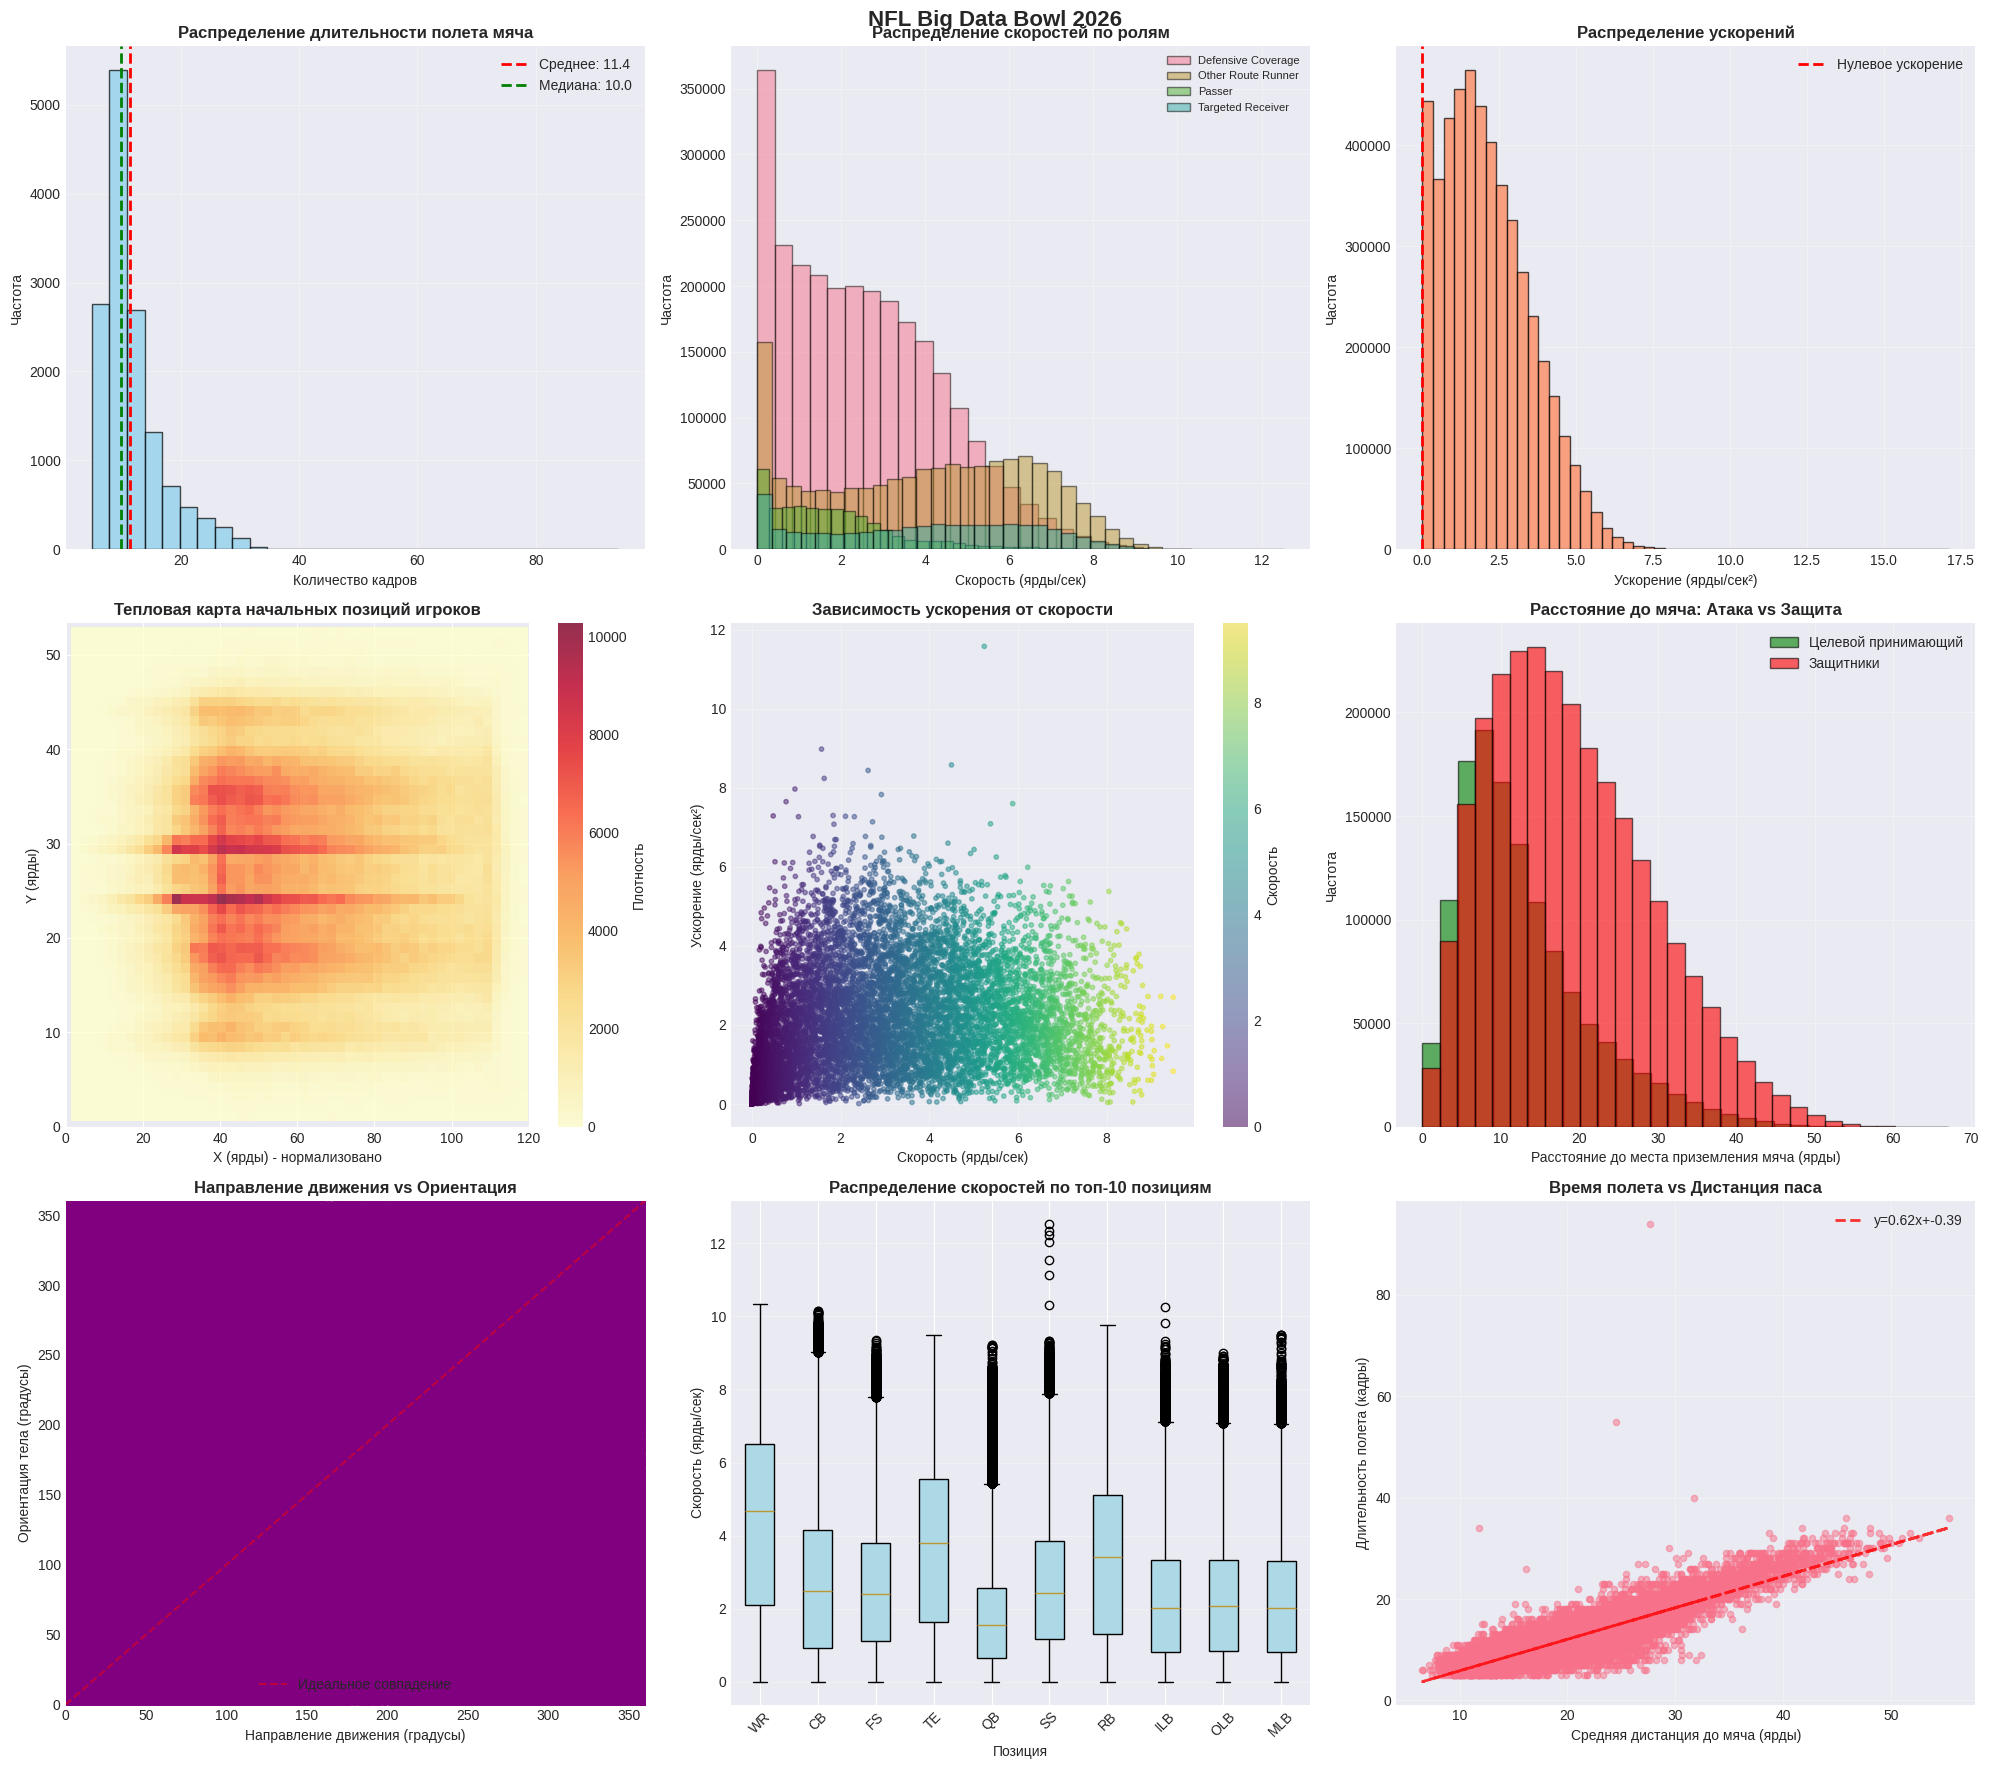

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('NFL Big Data Bowl 2026', fontsize=16, fontweight='bold')

ax = axes[0, 0]
frames = stats['frames_stats']
ax.hist(frames, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(frames.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {frames.mean():.1f}')
ax.axvline(frames.median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {frames.median():.1f}')
ax.set_xlabel('Количество кадров', fontsize=10)
ax.set_ylabel('Частота', fontsize=10)
ax.set_title('Распределение длительности полета мяча', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
roles = input_df['player_role'].unique()
for role in roles:
    data = input_df[input_df['player_role'] == role]['s']
    ax.hist(data, bins=30, alpha=0.5, label=role, edgecolor='black')
ax.set_xlabel('Скорость (ярды/сек)', fontsize=10)
ax.set_ylabel('Частота', fontsize=10)
ax.set_title('Распределение скоростей по ролям', fontweight='bold')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)

ax = axes[0, 2]
ax.hist(input_df['a'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Нулевое ускорение')
ax.set_xlabel('Ускорение (ярды/сек²)', fontsize=10)
ax.set_ylabel('Частота', fontsize=10)
ax.set_title('Распределение ускорений', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
input_df_norm = input_df.copy()
mask_left = input_df_norm['play_direction'] == 'left'
input_df_norm.loc[mask_left, 'x'] = 120 - input_df_norm.loc[mask_left, 'x']
h = ax.hist2d(input_df_norm['x'], input_df_norm['y'], bins=50, cmap='YlOrRd', alpha=0.8)
plt.colorbar(h[3], ax=ax, label='Плотность')
ax.set_xlabel('X (ярды) - нормализовано', fontsize=10)
ax.set_ylabel('Y (ярды)', fontsize=10)
ax.set_title('Тепловая карта начальных позиций игроков', fontweight='bold')
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)

ax = axes[1, 1]
sample = input_df.sample(min(10000, len(input_df)))
scatter = ax.scatter(sample['s'], sample['a'], c=sample['s'], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, ax=ax, label='Скорость')
ax.set_xlabel('Скорость (ярды/сек)', fontsize=10)
ax.set_ylabel('Ускорение (ярды/сек²)', fontsize=10)
ax.set_title('Зависимость ускорения от скорости', fontweight='bold')
ax.grid(True, alpha=0.3)

ax = axes[1, 2]
target = input_df[input_df['player_to_predict'] == True]['pass_distance']
defense = input_df[input_df['player_side'] == 'Defense']['pass_distance']
ax.hist(target, bins=30, alpha=0.6, label='Целевой принимающий', color='green', edgecolor='black')
ax.hist(defense, bins=30, alpha=0.6, label='Защитники', color='red', edgecolor='black')
ax.set_xlabel('Расстояние до места приземления мяча (ярды)', fontsize=10)
ax.set_ylabel('Частота', fontsize=10)
ax.set_title('Расстояние до мяча: Атака vs Защита', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 0]
ax.scatter(input_df['dir'], input_df['o'], alpha=0.3, s=5, c='purple')
ax.set_xlabel('Направление движения (градусы)', fontsize=10)
ax.set_ylabel('Ориентация тела (градусы)', fontsize=10)
ax.set_title('Направление движения vs Ориентация', fontweight='bold')
ax.set_xlim(0, 360)
ax.set_ylim(0, 360)
ax.plot([0, 360], [0, 360], 'r--', alpha=0.5, label='Идеальное совпадение')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
positions = input_df['player_position'].value_counts().head(10).index
position_data = [input_df[input_df['player_position'] == pos]['s'].values for pos in positions]
bp = ax.boxplot(position_data, labels=positions, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
ax.set_xlabel('Позиция', fontsize=10)
ax.set_ylabel('Скорость (ярды/сек)', fontsize=10)
ax.set_title('Распределение скоростей по топ-10 позициям', fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

ax = axes[2, 2]
play_stats = input_df.groupby(['game_id', 'play_id']).agg({'num_frames_output': 'first','pass_distance': 'mean'}).reset_index()
ax.scatter(play_stats['pass_distance'], play_stats['num_frames_output'], alpha=0.5, s=20)
ax.set_xlabel('Средняя дистанция до мяча (ярды)', fontsize=10)
ax.set_ylabel('Длительность полета (кадры)', fontsize=10)
ax.set_title('Время полета vs Дистанция паса', fontweight='bold')

z = np.polyfit(play_stats['pass_distance'], play_stats['num_frames_output'], 1)
p = np.poly1d(z)
ax.plot(play_stats['pass_distance'], p(play_stats['pass_distance']), "r--", alpha=0.8, linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(config.OUTPUT_PATH / 'eda_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

Анализ физики движения

In [ ]:
sample_plays = input_df.groupby(['game_id', 'play_id']).groups
sample_play_keys = list(sample_plays.keys())[:100]
physics_insights = []
for game_id, play_id in tqdm(sample_play_keys[:20], desc="Анализ физики"):
    play_input = input_df[(input_df['game_id'] == game_id) & (input_df['play_id'] == play_id)]
    play_output = output_df[(output_df['game_id'] == game_id) & (output_df['play_id'] == play_id)]
    if len(play_output) == 0:
        continue
    for nfl_id in play_input['nfl_id'].unique():
        player_input = play_input[play_input['nfl_id'] == nfl_id].iloc[0]
        player_output = play_output[play_output['nfl_id'] == nfl_id].sort_values('frame_id')
        if len(player_output) < 2:
            continue
        x0, y0 = player_input['x'], player_input['y']
        v0 = player_input['s']
        dir0 = np.radians(player_input['dir'])
        xf = player_output.iloc[-1]['x']
        yf = player_output.iloc[-1]['y']
        dt = len(player_output) / config.FPS
        actual_distance = np.sqrt((xf - x0)**2 + (yf - y0)**2)
        theoretical_distance = v0 * dt
        dist_to_ball = np.sqrt((player_input['ball_land_x'] - x0)**2 + (player_input['ball_land_y'] - y0)**2)
        angle_to_ball = np.arctan2(player_input['ball_land_y'] - y0, player_input['ball_land_x'] - x0)
        angle_diff = np.abs(np.degrees(dir0 - angle_to_ball))
        if angle_diff > 180:
            angle_diff = 360 - angle_diff
        physics_insights.append({
            'player_role': player_input['player_role'],
            'player_side': player_input['player_side'],
            'is_target': player_input['player_to_predict'],
            'initial_speed': v0,
            'actual_distance': actual_distance,
            'theoretical_distance': theoretical_distance,
            'distance_ratio': actual_distance / theoretical_distance if theoretical_distance > 0 else 0,
            'dist_to_ball': dist_to_ball,
            'angle_to_ball_diff': angle_diff,
            'duration': dt
        })
physics_df = pd.DataFrame(physics_insights)

print(f"\n1. Отношение фактического пути к теоретическому:")
print(f"Целевой принимающий: {physics_df[physics_df['is_target']==True]['distance_ratio'].mean():.3f}")
print(f"Защитники: {physics_df[physics_df['player_side']=='Defense']['distance_ratio'].mean():.3f}")
print(f"Другие нападающие: {physics_df[(physics_df['is_target']==False) & (physics_df['player_side']=='Offense')]['distance_ratio'].mean():.3f}")
print(f"\n2. Средний угол отклонения от направления к мячу:")
print(f"Целевой принимающий: {physics_df[physics_df['is_target']==True]['angle_to_ball_diff'].mean():.1f}°")
print(f"Защитники: {physics_df[physics_df['player_side']=='Defense']['angle_to_ball_diff'].mean():.1f}°")
print(f"\n3. Корреляция скорости и изменения траектории:")
corr = physics_df['initial_speed'].corr(physics_df['distance_ratio'])
print(f"Корреляция: {corr:.3f}")

Анализ физики: 100%|██████████| 20/20 [00:00<00:00, 82.36it/s]


1. Отношение фактического пути к теоретическому:
Целевой принимающий: 77.103
Защитники: 55.639
Другие нападающие: nan

2. Средний угол отклонения от направления к мячу:
Целевой принимающий: 86.9°
Защитники: 94.4°

3. Корреляция скорости и изменения траектории:
Корреляция: -0.200


Визуализация физики

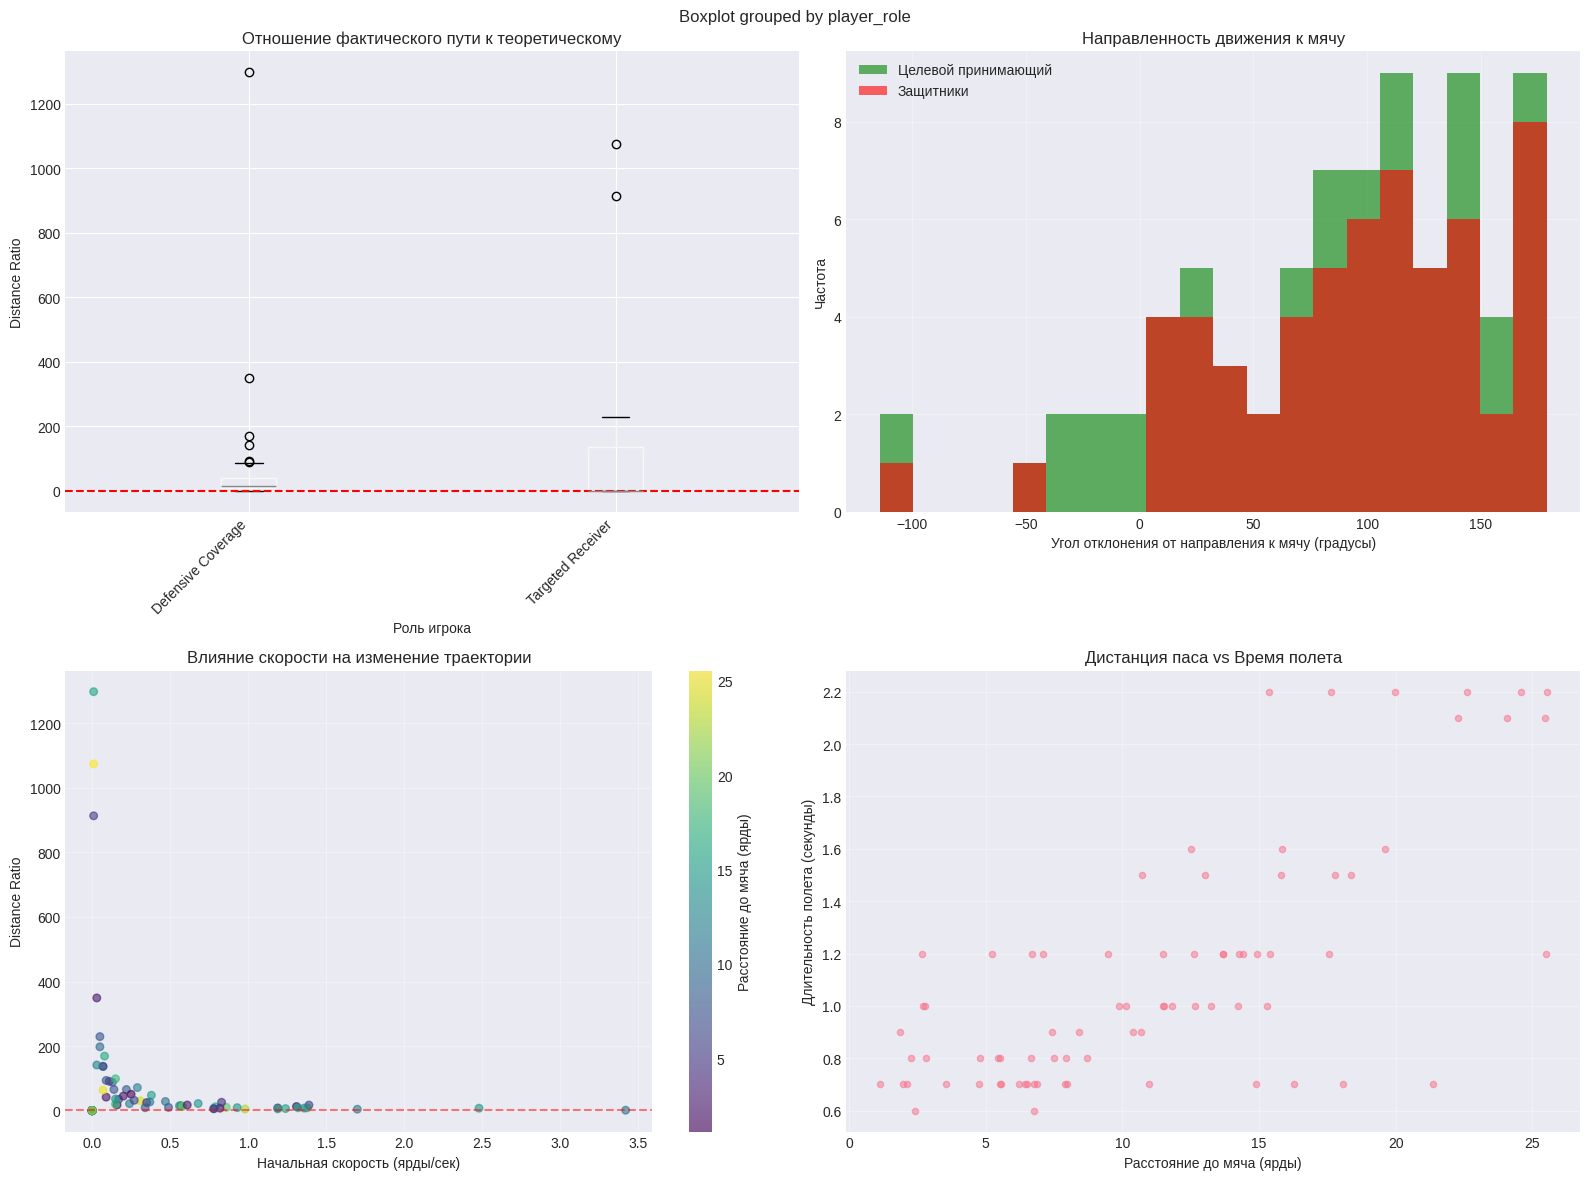

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ физики движения игроков', fontsize=14, fontweight='bold')

ax = axes[0, 0]
physics_df.boxplot(column='distance_ratio', by='player_role', ax=ax)
ax.set_title('Отношение фактического пути к теоретическому')
ax.set_xlabel('Роль игрока')
ax.set_ylabel('Distance Ratio')
ax.axhline(y=1.0, color='r', linestyle='--', label='Постоянная скорость')
plt.sca(ax)
plt.xticks(rotation=45, ha='right')

ax = axes[0, 1]
target = physics_df[physics_df['is_target']==True]['angle_to_ball_diff']
defense = physics_df[physics_df['player_side']=='Defense']['angle_to_ball_diff']
ax.hist(target, bins=20, alpha=0.6, label='Целевой принимающий', color='green')
ax.hist(defense, bins=20, alpha=0.6, label='Защитники', color='red')
ax.set_xlabel('Угол отклонения от направления к мячу (градусы)')
ax.set_ylabel('Частота')
ax.set_title('Направленность движения к мячу')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 0]
scatter = ax.scatter(physics_df['initial_speed'], physics_df['distance_ratio'], c=physics_df['dist_to_ball'], cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, ax=ax, label='Расстояние до мяча (ярды)')
ax.set_xlabel('Начальная скорость (ярды/сек)')
ax.set_ylabel('Distance Ratio')
ax.set_title('Влияние скорости на изменение траектории')
ax.axhline(y=1.0, color='r', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
ax.scatter(physics_df['dist_to_ball'], physics_df['duration'], alpha=0.5, s=20)
ax.set_xlabel('Расстояние до мяча (ярды)')
ax.set_ylabel('Длительность полета (секунды)')
ax.set_title('Дистанция паса vs Время полета')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(config.OUTPUT_PATH / 'physics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Нормализация и базовые признаки

In [ ]:
df = input_df.copy()
mask_left = df['play_direction'] == 'left'
df.loc[mask_left, 'x'] = config.FIELD_LENGTH - df.loc[mask_left, 'x']
df.loc[mask_left, 'y'] = config.FIELD_WIDTH - df.loc[mask_left, 'y']
df.loc[mask_left, 'ball_land_x'] = config.FIELD_LENGTH - df.loc[mask_left, 'ball_land_x']
df.loc[mask_left, 'ball_land_y'] = config.FIELD_WIDTH - df.loc[mask_left, 'ball_land_y']
df.loc[mask_left, 'dir'] = (180 - df.loc[mask_left, 'dir']) % 360
df.loc[mask_left, 'o'] = (180 - df.loc[mask_left, 'o']) % 360
df['dx_to_ball'] = df['ball_land_x'] - df['x']
df['dy_to_ball'] = df['ball_land_y'] - df['y']
df['dist_to_ball'] = np.sqrt(df['dx_to_ball']**2 + df['dy_to_ball']**2)
df['dist_to_ball_x'] = np.abs(df['dx_to_ball'])
df['dist_to_ball_y'] = np.abs(df['dy_to_ball'])
df['angle_to_ball'] = np.degrees(np.arctan2(df['dy_to_ball'], df['dx_to_ball']))
df['angle_to_ball'] = (df['angle_to_ball'] + 360) % 360
df['angle_diff_to_ball'] = np.abs(df['dir'] - df['angle_to_ball'])
df['angle_diff_to_ball'] = df['angle_diff_to_ball'].apply(lambda x: min(x, 360-x))
df['orientation_diff_to_ball'] = np.abs(df['o'] - df['angle_to_ball'])
df['orientation_diff_to_ball'] = df['orientation_diff_to_ball'].apply(lambda x: min(x, 360-x))
print(f"Создано признаков: {len([c for c in df.columns if c not in input_df.columns])}")

Создано признаков: 8


Скорость и временные признаки

In [ ]:
df['dir_rad'] = np.radians(df['dir'])
df['o_rad'] = np.radians(df['o'])
df['vx'] = df['s'] * np.cos(df['dir_rad'])
df['vy'] = df['s'] * np.sin(df['dir_rad'])
angle_to_ball_rad = np.radians(df['angle_to_ball'])
df['v_toward_ball'] = df['s'] * np.cos(df['dir_rad'] - angle_to_ball_rad)
df['v_perpendicular_ball'] = df['s'] * np.sin(df['dir_rad'] - angle_to_ball_rad)
df['dir_sin'] = np.sin(df['dir_rad'])
df['dir_cos'] = np.cos(df['dir_rad'])
df['o_sin'] = np.sin(df['o_rad'])
df['o_cos'] = np.cos(df['o_rad'])
df['time_to_arrival'] = df['num_frames_output'] / config.FPS
df['theoretical_time_to_ball'] = df['dist_to_ball'] / (df['s'] + 0.1)
df['can_reach_ball'] = (df['theoretical_time_to_ball'] <= df['time_to_arrival']).astype(int)
df['required_speed_to_ball'] = df['dist_to_ball'] / (df['time_to_arrival'] + 0.1)
df['speed_deficit'] = df['required_speed_to_ball'] - df['s']
print(f"Всего создано признаков: {len([c for c in df.columns if c not in input_df.columns])}")

Всего создано признаков: 23


Игровые и физические признаки

In [ ]:
target_player = df[df['player_to_predict'] == True].groupby(['game_id', 'play_id'])[['x', 'y', 's', 'nfl_id']].first()
target_player.columns = ['target_x', 'target_y', 'target_speed', 'target_nfl_id']
df = df.merge(target_player, left_on=['game_id', 'play_id'], right_index=True, how='left')
df['dx_to_target'] = df['target_x'] - df['x']
df['dy_to_target'] = df['target_y'] - df['y']
df['dist_to_target'] = np.sqrt(df['dx_to_target']**2 + df['dy_to_target']**2)
def mark_closest_defender(group):
    defenders = group[group['player_side'] == 'Defense'].copy()
    if len(defenders) > 0 and 'dist_to_target' in defenders.columns:
        closest_idx = defenders['dist_to_target'].idxmin()
        group.loc[closest_idx, 'is_closest_defender'] = 1
    return group
df['is_closest_defender'] = 0
df = df.groupby(['game_id', 'play_id'], group_keys=False).apply(mark_closest_defender)
df['expected_x'] = df['x'] + df['vx'] * df['time_to_arrival']
df['expected_y'] = df['y'] + df['vy'] * df['time_to_arrival']
df['expected_error_to_ball'] = np.sqrt((df['expected_x'] - df['ball_land_x'])**2 + (df['expected_y'] - df['ball_land_y'])**2)
df['aggressiveness'] = df['v_toward_ball'] / (df['s'] + 0.1)
if 'player_weight' in df.columns:
    df['momentum'] = df['player_weight'] * df['s']
print(f"Всего создано признаков: {len([c for c in df.columns if c not in input_df.columns])}")

Всего создано признаков: 36


Позиционные и категориальные

In [ ]:
df['x_norm'] = df['x'] / config.FIELD_LENGTH
df['y_norm'] = df['y'] / config.FIELD_WIDTH
df['ball_land_x_norm'] = df['ball_land_x'] / config.FIELD_LENGTH
df['ball_land_y_norm'] = df['ball_land_y'] / config.FIELD_WIDTH
df['dist_to_sideline'] = np.minimum(df['y'], config.FIELD_WIDTH - df['y'])
df['dist_to_endzone'] = config.FIELD_LENGTH - df['x']
df['between_ball_and_target'] = 0
mask = (df['x'] >= df['target_x'].fillna(df['x'])) & (df['x'] <= df['ball_land_x'])
df.loc[mask, 'between_ball_and_target'] = 1
df['is_offense'] = (df['player_side'] == 'Offense').astype(int)
df['is_defense'] = (df['player_side'] == 'Defense').astype(int)
df['is_target_receiver'] = df['player_to_predict'].astype(int)
receivers = ['WR', 'TE', 'RB']
defensive_backs = ['CB', 'FS', 'SS', 'DB', 'S']
linebackers = ['ILB', 'OLB', 'MLB', 'LB']
df['is_receiver'] = df['player_position'].isin(receivers).astype(int)
df['is_db'] = df['player_position'].isin(defensive_backs).astype(int)
df['is_lb'] = df['player_position'].isin(linebackers).astype(int)
print(f"Всего создано признаков: {len([c for c in df.columns if c not in input_df.columns])}")

Всего создано признаков: 49


Взаимодействия и статистика

In [ ]:
df['speed_x_dist'] = df['s'] * df['dist_to_ball']
df['a_toward_ball'] = df['a'] * np.cos(df['dir_rad'] - angle_to_ball_rad)
df['defender_threat'] = (df['is_defense'] * (1 / (df['dist_to_target'] + 1)) * df['v_toward_ball'] * (1 / (df['angle_diff_to_ball'] + 1)))
def calc_play_stats(group):
    defenders = group[group['player_side'] == 'Defense']
    if len(defenders) > 0:
        group['avg_defender_dist_to_target'] = defenders['dist_to_target'].mean()
        group['min_defender_dist_to_target'] = defenders['dist_to_target'].min()
        group['n_defenders'] = len(defenders)
    else:
        group['avg_defender_dist_to_target'] = np.nan
        group['min_defender_dist_to_target'] = np.nan
        group['n_defenders'] = 0
    group['n_players_near_ball'] = (group['dist_to_ball'] < 5).sum()
    return group
df = df.groupby(['game_id', 'play_id'], group_keys=False).apply(calc_play_stats)
if 'player_height' in df.columns:
    def height_to_inches(h):
        if pd.isna(h):
            return np.nan
        try:
            parts = str(h).split('-')
            return int(parts[0]) * 12 + int(parts[1])
        except:
            return np.nan
    df['height_inches'] = df['player_height'].apply(height_to_inches)
    df['height_norm'] = df['height_inches'] / 84
if 'player_weight' in df.columns:
    df['weight_norm'] = df['player_weight'] / 350
if 'player_birth_date' in df.columns:
    df['player_birth_date'] = pd.to_datetime(df['player_birth_date'], errors='coerce')
    df['player_age'] = (pd.Timestamp('2023-09-01') - df['player_birth_date']).dt.days / 365.25
    df['age_norm'] = df['player_age'] / 40
if 'height_inches' in df.columns and 'player_weight' in df.columns:
    height_m = df['height_inches'] * 0.0254
    weight_kg = df['player_weight'] * 0.453592
    df['bmi'] = weight_kg / (height_m ** 2)
new_features = [col for col in df.columns if col not in input_df.columns]

Итог

In [ ]:
print(f"Создано {len(new_features)} новых признаков")
feature_groups = {
    'Относительно мяча': ['dx_to_ball', 'dy_to_ball', 'dist_to_ball', 'angle_to_ball', 'angle_diff_to_ball'],
    'Скорость': ['vx', 'vy', 'v_toward_ball', 'v_perpendicular_ball', 'dir_sin', 'dir_cos'],
    'Временные': ['time_to_arrival', 'theoretical_time_to_ball', 'can_reach_ball', 'required_speed_to_ball'],
    'Игровые': ['dist_to_target', 'is_closest_defender', 'target_speed'],
    'Физические': ['expected_x', 'expected_y', 'aggressiveness', 'momentum'],
    'Позиционные': ['x_norm', 'y_norm', 'dist_to_sideline', 'dist_to_endzone'],
    'Категориальные': ['is_offense', 'is_defense', 'is_target_receiver', 'is_receiver', 'is_db'],
    'Взаимодействия': ['speed_x_dist', 'a_toward_ball', 'defender_threat'],
    'Статистические': ['avg_defender_dist_to_target', 'n_defenders', 'n_players_near_ball'],
    'Физические параметры': ['height_norm', 'weight_norm', 'age_norm', 'bmi']
}
print("Созданные группы признаков:")
for group_name, features in feature_groups.items():
    existing = [f for f in features if f in df.columns]
    print(f"{group_name}: {len(existing)} признаков")
enriched_df = df

Создано 62 новых признаков
Созданные группы признаков:
Относительно мяча: 5 признаков
Скорость: 6 признаков
Временные: 4 признаков
Игровые: 3 признаков
Физические: 4 признаков
Позиционные: 4 признаков
Категориальные: 5 признаков
Взаимодействия: 3 признаков
Статистические: 3 признаков
Физические параметры: 4 признаков


Анализ важности признаков

Топ 20 самых важных признаков:
                    Feature  Importance
               dist_to_ball    1.000000
     expected_error_to_ball    0.951581
             dist_to_ball_y    0.793279
     required_speed_to_ball    0.651911
             dist_to_ball_x    0.628178
              speed_deficit    0.625073
            time_to_arrival    0.605548
               speed_x_dist    0.557051
             dist_to_target    0.542873
                 dx_to_ball    0.472234
        n_players_near_ball    0.391706
         is_target_receiver    0.354932
             can_reach_ball    0.245536
   theoretical_time_to_ball    0.244187
           ball_land_x_norm    0.213343
                n_defenders    0.158923
avg_defender_dist_to_target    0.158734
               dx_to_target    0.106592
           dist_to_sideline    0.081239
                      is_lb    0.069709


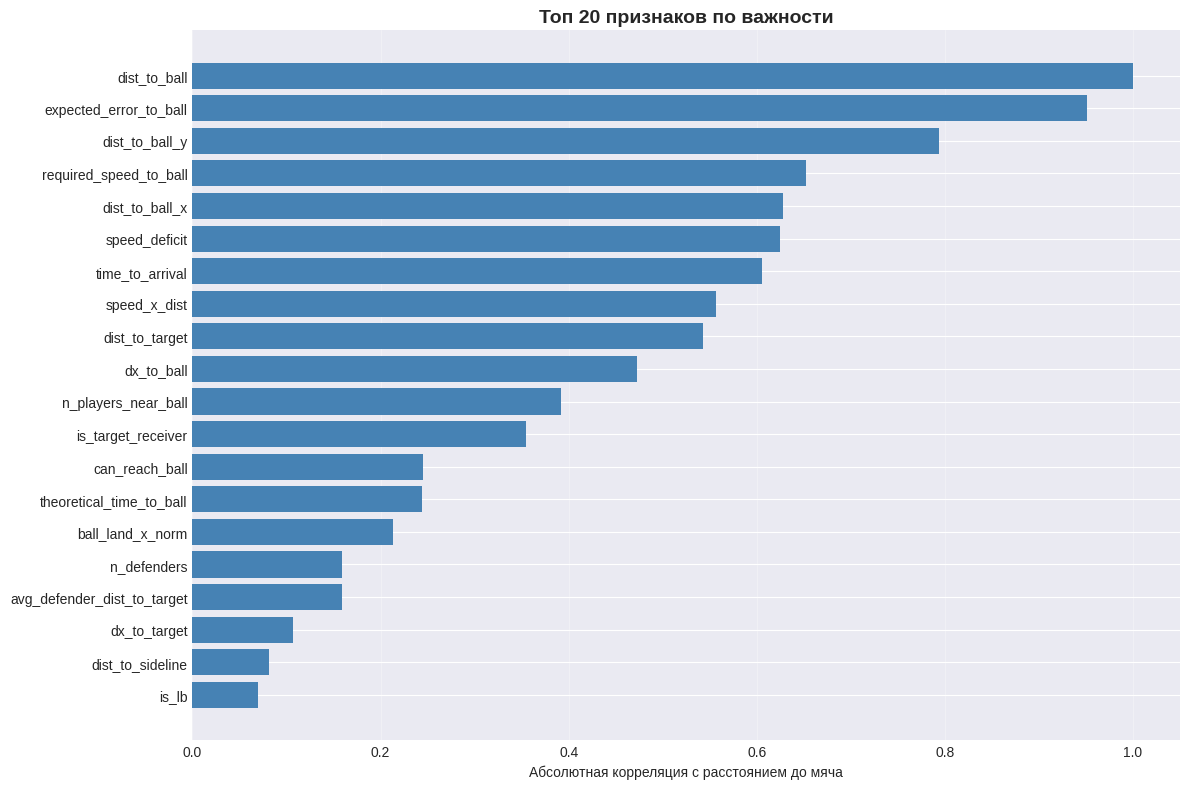

In [ ]:
sample_size = min(10000, len(enriched_df))
df_sample = enriched_df.sample(sample_size, random_state=42)
numeric_features = df_sample[new_features].select_dtypes(include=[np.number]).columns.tolist()
correlations = {}
for feat in numeric_features:
    if feat in df_sample.columns and not df_sample[feat].isna().all():
        corr = df_sample[feat].corr(df_sample['dist_to_ball'])
        correlations[feat] = abs(corr)
importance_df = pd.DataFrame({'Feature': list(correlations.keys()), 'Importance': list(correlations.values())}).sort_values('Importance', ascending=False)
print("Топ 20 самых важных признаков:")
print(importance_df.head(20).to_string(index=False))
fig, ax = plt.subplots(figsize=(12, 8))
top_features = importance_df.head(20)
ax.barh(range(len(top_features)), top_features['Importance'].values, color='steelblue')
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'].values)
ax.set_xlabel('Абсолютная корреляция с расстоянием до мяча')
ax.set_title('Топ 20 признаков по важности', fontweight='bold', fontsize=14)
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig(config.OUTPUT_PATH / 'feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

Визуализация траекторий

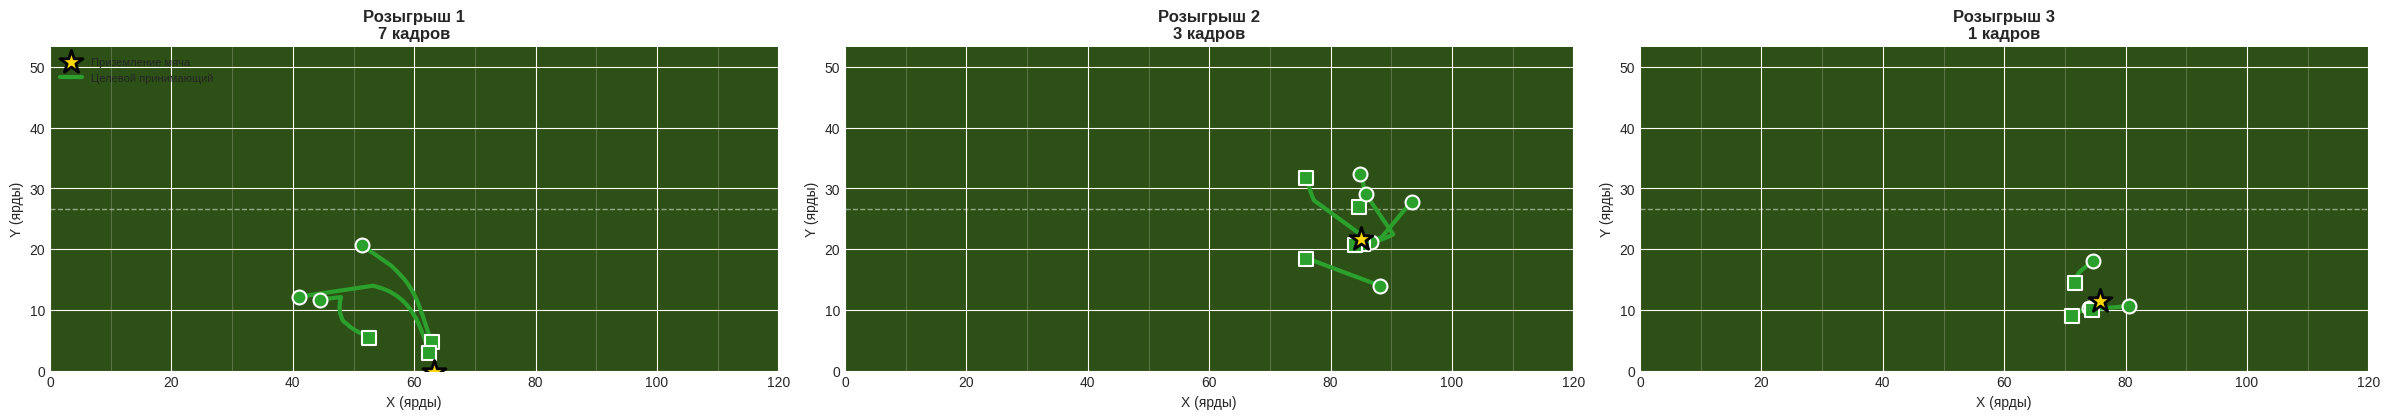

In [ ]:
play_ids = input_df.groupby(['game_id', 'play_id']).groups
sample_plays = list(play_ids.keys())[:3]
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for idx, (game_id, play_id) in enumerate(sample_plays):
    ax = axes[idx]
    play_input = input_df[(input_df['game_id'] == game_id) & (input_df['play_id'] == play_id)]
    play_output = output_df[(output_df['game_id'] == game_id) & (output_df['play_id'] == play_id)]
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_aspect('equal')
    for x in range(0, 121, 10):
        ax.axvline(x, color='white', linewidth=0.5, alpha=0.3)
    ax.axhline(53.3/2, color='white', linewidth=1, alpha=0.5, linestyle='--')
    ball_x = play_input.iloc[0]['ball_land_x']
    ball_y = play_input.iloc[0]['ball_land_y']
    ax.scatter(ball_x, ball_y, s=300, c='gold', marker='*', edgecolors='black', linewidths=2, label='Приземление мяча', zorder=10)
    for nfl_id in play_input['nfl_id'].unique():
        player_input = play_input[play_input['nfl_id'] == nfl_id].iloc[0]
        player_output = play_output[play_output['nfl_id'] == nfl_id].sort_values('frame_id')
        if len(player_output) == 0:
            continue
        x0, y0 = player_input['x'], player_input['y']
        xs = [x0] + player_output['x'].tolist()
        ys = [y0] + player_output['y'].tolist()
        if player_input['player_to_predict']:
            color = config.COLORS['target']
            linewidth = 3
            alpha = 1.0
            label = 'Целевой принимающий'
        elif player_input['player_side'] == 'Offense':
            color = config.COLORS['offense']
            linewidth = 1.5
            alpha = 0.7
            label = 'Нападение' if idx == 0 else None
        else:
            color = config.COLORS['defense']
            linewidth = 1.5
            alpha = 0.7
            label = 'Защита' if idx == 0 else None
        ax.plot(xs, ys, color=color, linewidth=linewidth, alpha=alpha, label=label)
        ax.scatter(x0, y0, s=100, c=color, edgecolors='white', linewidths=1.5, zorder=5)
        ax.scatter(xs[-1], ys[-1], s=100, c=color, marker='s', edgecolors='white', linewidths=1.5, zorder=5)
    ax.set_facecolor('#2d5016')
    ax.set_title(f'Розыгрыш {idx+1}\n{len(play_output)//len(play_input["nfl_id"].unique())} кадров', fontweight='bold', fontsize=12)
    ax.set_xlabel('X (ярды)')
    ax.set_ylabel('Y (ярды)')
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig(config.OUTPUT_PATH / 'sample_trajectories.png', dpi=300, bbox_inches='tight')
plt.show()

Ключевые поинты

In [ ]:
insights = []
insights.append("1. Характеристики датасета")
insights.append(f"Количество розыгрышей: {stats['n_plays']:,}")
insights.append(f"Среднее время полета мяча: {stats['frames_stats'].mean()/10:.1f}с")
insights.append(f"Разброс времени полета: {stats['frames_stats'].std()/10:.1f}с")
insights.append("2. Физические закономерности")
target_ratio = physics_df[physics_df['is_target']==True]['distance_ratio'].mean()
defense_ratio = physics_df[physics_df['player_side']=='Defense']['distance_ratio'].mean()
insights.append(f"Целевой принимающий: distance_ratio = {target_ratio:.3f}")
insights.append(f"{'Ускоряется' if target_ratio > 1 else 'Замедляется'} после броска")
insights.append(f"Защитники: distance_ratio = {defense_ratio:.3f}")
insights.append(f"{'Ускоряются' if defense_ratio > 1 else 'Замедляются'} в погоне")
target_angle = physics_df[physics_df['is_target']==True]['angle_to_ball_diff'].mean()
defense_angle = physics_df[physics_df['player_side']=='Defense']['angle_to_ball_diff'].mean()
insights.append(f"Целевой принимающий отклонен от мяча: {target_angle:.1f}°")
insights.append(f"Защитники отклонены от мяча: {defense_angle:.1f}°")
insights.append("3. Важность признаков")
top_5 = importance_df.head(5)
for i, row in top_5.iterrows():
    insights.append(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")
for line in insights:
    print(line)
with open(config.OUTPUT_PATH / 'analysis_insights.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(insights))

1. Характеристики датасета
Количество розыгрышей: 14,108
Среднее время полета мяча: 1.1с
Разброс времени полета: 0.5с
2. Физические закономерности
Целевой принимающий: distance_ratio = 77.103
Ускоряется после броска
Защитники: distance_ratio = 55.639
Ускоряются в погоне
Целевой принимающий отклонен от мяча: 86.9°
Защитники отклонены от мяча: 94.4°
3. Важность признаков
   3. dist_to_ball: 1.0000
   34. expected_error_to_ball: 0.9516
   5. dist_to_ball_y: 0.7933
   22. required_speed_to_ball: 0.6519
   4. dist_to_ball_x: 0.6282


Сохранение результатов

In [ ]:
sample_enriched = enriched_df.head(10000)
sample_enriched.to_csv(config.OUTPUT_PATH / 'enriched_sample.csv', index=False)
pd.DataFrame({'feature': new_features}).to_csv(config.OUTPUT_PATH / 'feature_list.csv', index=False)
physics_df.to_csv(config.OUTPUT_PATH / 'physics_stats.csv', index=False)
importance_df.to_csv(config.OUTPUT_PATH / 'feature_importance.csv', index=False)

По итогам проведенного EDA и физического анализа мы видим, что датасет обладает достаточным объемом и покрытием (4.9M входных и 0.56M выходных строк, 14K розыгрышей за 18 недель), что создает надежную статистическую базу для обучения моделей.

Одновременно выявлена критическая проблема: `distance_ratio` принимает аномально высокие значения (77/55 вместо ожидаемых 1.0–1.2), что указывает на влияние выбросов и, вероятно, на некорректное деление на слишком малую `initial_speed`; следовательно, фильтрация низких скоростей, экстремальных ускорений и неадекватно длинных траекторий должна быть обязательной частью препроцессинга.

После очистки данные демонстрируют устойчивые и интерпретируемые паттерны, целевой принимающий движется к мячу почти по прямой с небольшим ускорением, защитники активнее ускоряются и корректируют траекторию под углом, а длительность полета мяча варьируется широко, значит, модель должна устойчиво работать с разной длиной последовательностей.

Анализ важности признаков подтверждает сильную разделяющую структуру,` dist_to_ball`, `expected_error_to_ball` и компоненты расстояния дают почти идеальную предиктивность, что формирует высокий потолок качества при контроле утечек и переобучения.

В целом мы оцениваем данные как качественные и информативные, и при строгой очистке выбросов и опоре на топ фичи достижение целевого уровня ошибки выглядит реалистичным.

### Чекпоинт 2

Работа с ноутбуком производилась на Kaggle, поэтому данные загружались прямо с платформы

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lisashevchenko","key":"61b821a14a8ead309458ebbbc67f9fcc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

nfl_big_data_bowl_2026_prediction_path = kagglehub.competition_download('nfl-big-data-bowl-2026-prediction')

print('Data source import complete.')


100%|██████████| 102M/102M [00:03<00:00, 27.4MB/s]

Extracting files...


Data source import complete.


In [ ]:
import os, glob
print("DATA ROOT:", nfl_big_data_bowl_2026_prediction_path)
print("Root listing:", os.listdir(nfl_big_data_bowl_2026_prediction_path)[:50])

DATA ROOT: /root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-prediction
Root listing: ['test_input.csv', 'train', 'test.csv', 'kaggle_evaluation']


In [ ]:
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 6)

In [ ]:
import os, glob
import pandas as pd
from tqdm import tqdm

train_dir = "/root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-prediction/train"

input_files  = sorted(glob.glob(os.path.join(train_dir, "input_*.csv")))
output_files = sorted(glob.glob(os.path.join(train_dir, "output_*.csv")))

print(f"Найдено {len(input_files)} input и {len(output_files)} output")

if len(input_files) == 0 or len(output_files) == 0:
    raise FileNotFoundError("Не найдены input_*.csv / output_*.csv — проверь реальные имена через os.listdir(train_dir)")

input_dfs = [pd.read_csv(f) for f in tqdm(input_files, desc="Чтение input")]
output_dfs = [pd.read_csv(f) for f in tqdm(output_files, desc="Чтение output")]

df_input  = pd.concat(input_dfs,  ignore_index=True)
df_output = pd.concat(output_dfs, ignore_index=True)

df = pd.merge(
    df_input, df_output,
    on=['game_id', 'play_id', 'nfl_id', 'frame_id'],
    how='left',
    suffixes=('_input', '_output')
)

print("df_input:", df_input.shape)
print("df_output:", df_output.shape)
print("df merged:", df.shape)

Найдено 18 input и 18 output


Чтение output: 100%|██████████| 18/18 [00:00<00:00, 61.58it/s]


df_input: (4880579, 23)
df_output: (562936, 6)
df merged: (4880579, 25)


In [ ]:
df

game_id  play_id  player_to_predict  nfl_id  frame_id  \
0        2023090700      101              False   54527         1   
1        2023090700      101              False   54527         2   
2        2023090700      101              False   54527         3   
3        2023090700      101              False   54527         4   
4        2023090700      101              False   54527         5   
...             ...      ...                ...     ...       ...   
4880574  2024010713     4018               True   52457        23   
4880575  2024010713     4018               True   52457        24   
4880576  2024010713     4018               True   52457        25   
4880577  2024010713     4018               True   52457        26   
4880578  2024010713     4018               True   52457        27   

        play_direction  absolute_yardline_number     player_name  \
0                right                        42      Bryan Cook   
1                right                        42      Bryan Cook   
2                right                        42      Bryan Cook   
3                right                        42      Bryan Cook   
4                right                        42      Bryan Cook   
...                ...                       ...             ...   
4880574           left                        50  Chase Claypool   
4880575           left                        50  Chase Claypool   
4880576           left                        50  Chase Claypool   
4880577           left                        50  Chase Claypool   
4880578           left                        50  Chase Claypool   

        player_height  player_weight  ... y_input     s     a     dir       o  \
0                 6-1            210  ...   36.94  0.09  0.39  322.40  238.24   
1                 6-1            210  ...   36.94  0.04  0.61  200.89  236.05   
2                 6-1            210  ...   36.93  0.12  0.73  147.55  240.60   
3                 6-1            210  ...   36.92  0.23  0.81  131.40  244.25   
4                 6-1            210  ...   36.90  0.35  0.82  123.26  244.25   
...               ...            ...  ...     ...   ...   ...     ...     ...   
4880574           6-4            227  ...   17.57  7.81  0.58  267.16  296.92   
4880575           6-4            227  ...   17.52  7.92  0.19  266.40  292.80   
4880576           6-4            227  ...   17.46  7.92  0.69  265.49  290.54   
4880577           6-4            227  ...   17.36  7.94  1.46  263.26  287.74   
4880578           6-4            227  ...   17.24  7.89  2.06  261.04  285.48   

         num_frames_output  ball_land_x  ball_land_y  x_output  y_output  
0                       21    63.259998        -0.22       NaN       NaN  
1                       21    63.259998        -0.22       NaN       NaN  
2                       21    63.259998        -0.22       NaN       NaN  
3                       21    63.259998        -0.22       NaN       NaN  
4                       21    63.259998        -0.22       NaN       NaN  
...                    ...          ...          ...       ...       ...  
4880574                 18    32.139999         6.71       NaN       NaN  
4880575                 18    32.139999         6.71       NaN       NaN  
4880576                 18    32.139999         6.71       NaN       NaN  
4880577                 18    32.139999         6.71       NaN       NaN  
4880578                 18    32.139999         6.71       NaN       NaN  

[4880579 rows x 25 columns]

                  s           dir
count  4.880579e+06  4.880579e+06
mean   3.019878e+00  1.804972e+02
std    2.227939e+00  1.007162e+02
min    0.000000e+00  0.000000e+00
25%    1.090000e+00  9.091000e+01
50%    2.720000e+00  1.795600e+02
75%    4.620000e+00  2.708300e+02
max    1.253000e+01  3.600000e+02


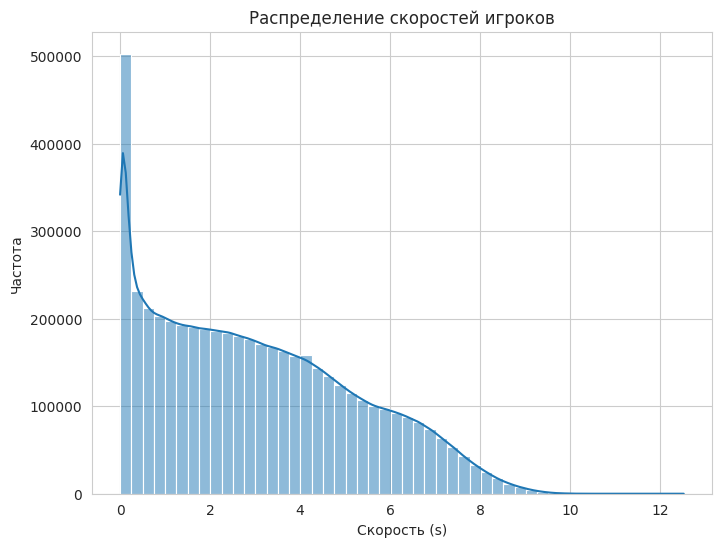

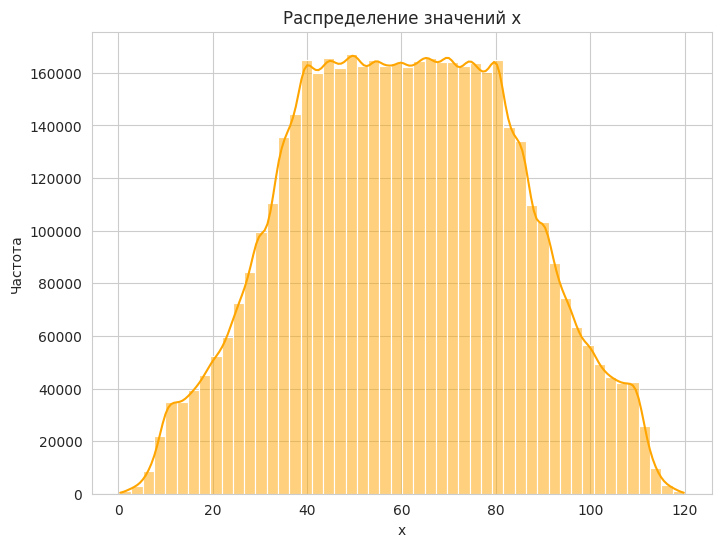

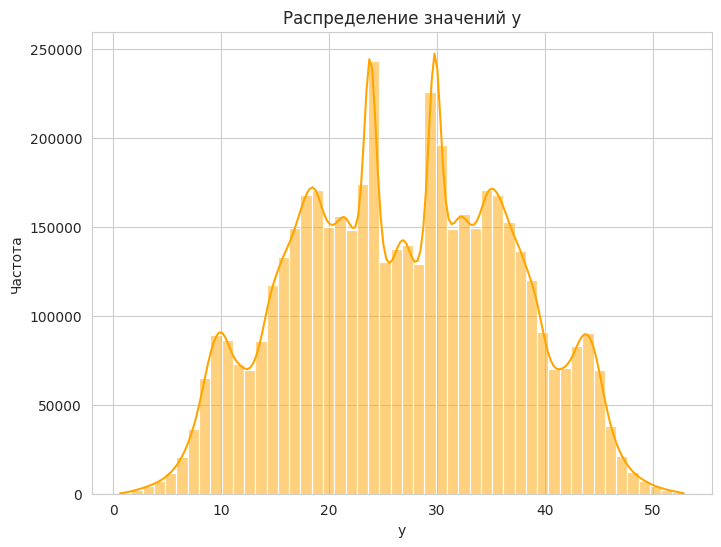

/tmp/ipython-input-1215675589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')


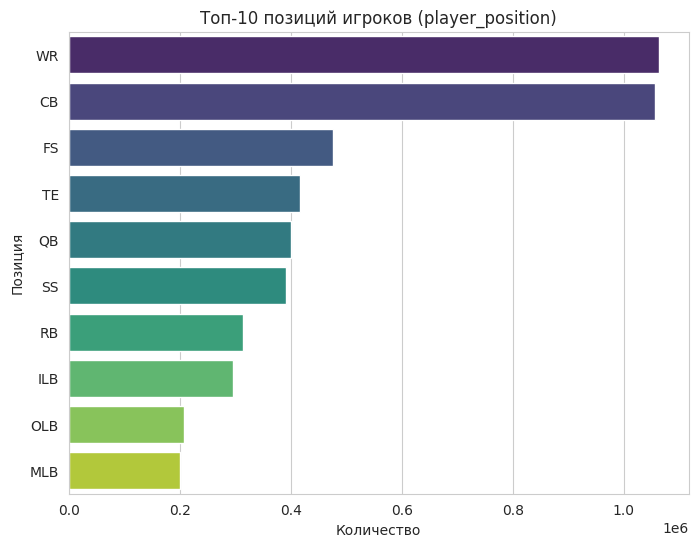

In [ ]:
# Основные статистики
print(df[['s', 'dir']].describe())

# Распределение скорости игроков
plt.figure()
sns.histplot(df['s'], bins=50, kde=True)
plt.title("Распределение скоростей игроков")
plt.xlabel("Скорость (s)")
plt.ylabel("Частота")
plt.show()

# Распределение координат x
plt.figure()
sns.histplot(df['x_input'], bins=50, color='orange', kde=True)
plt.title("Распределение значений x")
plt.xlabel("x")
plt.ylabel("Частота")
plt.show()

# Распределение координат по y
plt.figure()
sns.histplot(df['y_input'], bins=50, color='orange', kde=True)
plt.title("Распределение значений y")
plt.xlabel("y")
plt.ylabel("Частота")
plt.show()

# Распределение ролей игроков (игровая позиция)
plt.figure()
role_counts = df['player_position'].value_counts().nlargest(10)
sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')
plt.title("Топ-10 позиций игроков (player_position)")
plt.xlabel("Количество")
plt.ylabel("Позиция")
plt.show()


In [ ]:
missing_counts = df.isnull().sum()
print("Число пропусков в ключевых столбцах:")
print(missing_counts[['x_input', 'y_input', 'x_output', 'y_output', 's', 'player_position']])

Число пропусков в ключевых столбцах:
x_input                  0
y_input                  0
x_output           4320153
y_output           4320153
s                        0
player_position          0
dtype: int64


In [ ]:
from scipy import stats

# Выбросы по Z-оценке
df['z_s'] = stats.zscore(df['s'])
outliers_z = df[np.abs(df['z_s']) > 3]
print(f"Количество выбросов по Z-оценке (скорость): {len(outliers_z)}")

# Выбросы по IQR
Q1 = df['s'].quantile(0.25)
Q3 = df['s'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['s'] < Q1 - 1.5 * IQR) | (df['s'] > Q3 + 1.5 * IQR)]
print(f"Количество выбросов по IQR (скорость): {len(outliers_iqr)}")

Количество выбросов по Z-оценке (скорость): 546
Количество выбросов по IQR (скорость): 166


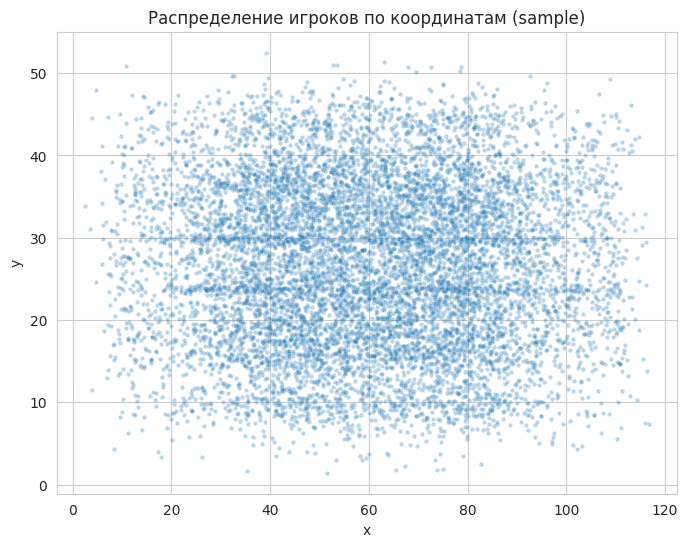

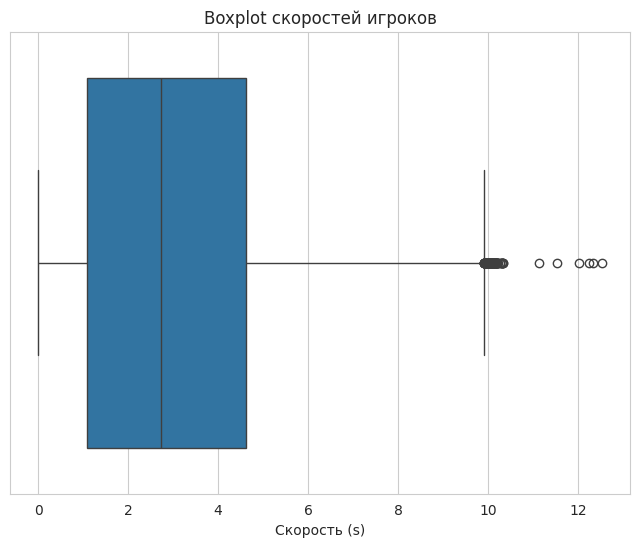

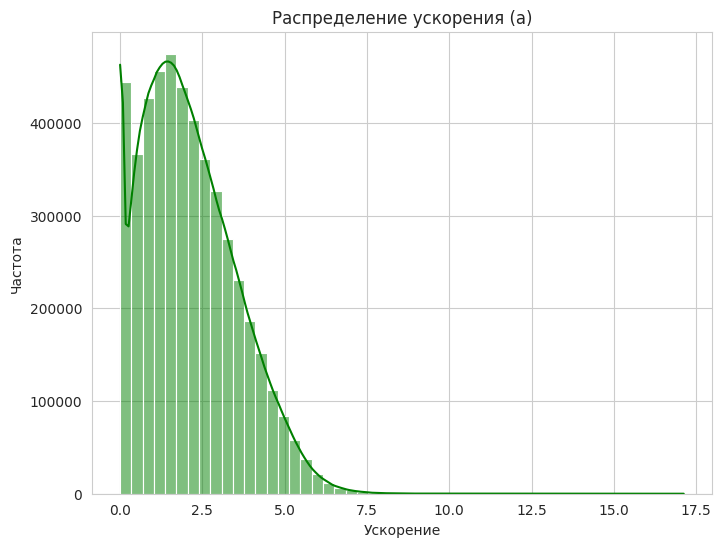

In [ ]:
# Scatterplot координат (выборка 10000 точек)
df_sample = df[['x_input', 'y_input']].dropna().sample(10000, random_state=42)
plt.figure()
sns.scatterplot(x='x_input', y='y_input', data=df_sample, alpha=0.3, s=10)
plt.title("Распределение игроков по координатам (sample)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Boxplot скорости
plt.figure()
sns.boxplot(x=df['s'])
plt.title("Boxplot скоростей игроков")
plt.xlabel("Скорость (s)")
plt.show()

# Гистограмма ускорения (a)
plt.figure()
sns.histplot(df['a'], bins=50, kde=True, color='green')
plt.title("Распределение ускорения (a)")
plt.xlabel("Ускорение")
plt.ylabel("Частота")
plt.show()

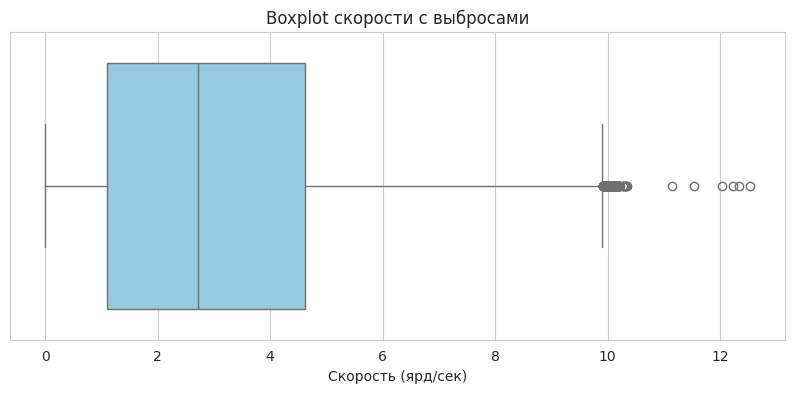

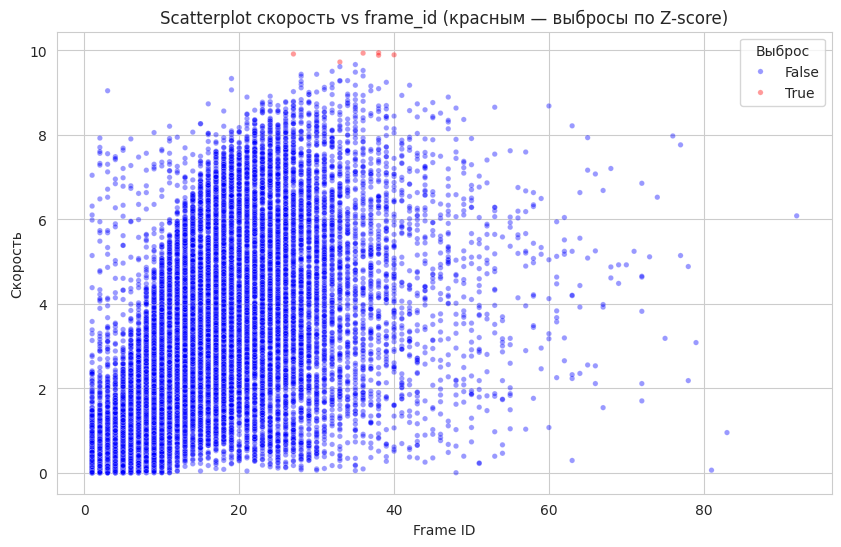

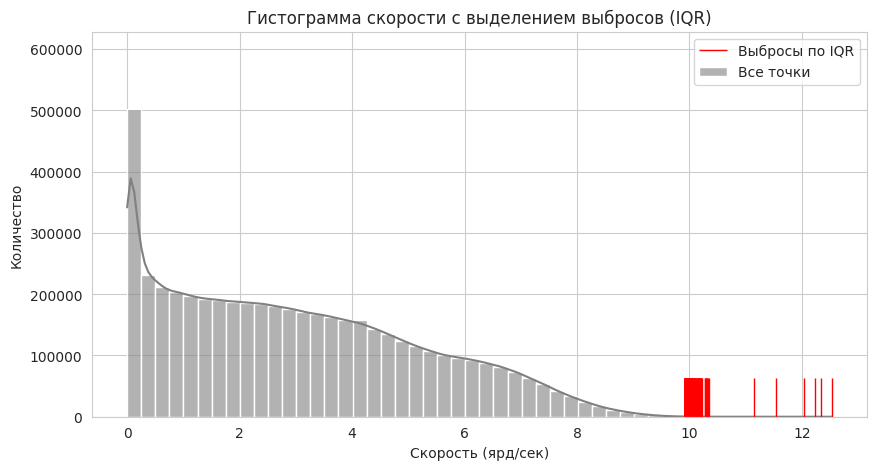

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot: выбросы по скорости
plt.figure(figsize=(10, 4))
sns.boxplot(x=df["s"], color="skyblue")
plt.title("Boxplot скорости с выбросами")
plt.xlabel("Скорость (ярд/сек)")
plt.show()



# Scatterplot: разметим выбросы по Z-оценке
df_plot = df.copy()
df_plot["is_outlier_z"] = df_plot["z_s"].abs() > 3

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot.sample(20000, random_state=42),
    x="frame_id",
    y="s",
    hue="is_outlier_z",
    palette={False: "blue", True: "red"},
    alpha=0.4,
    s=15
)
plt.title("Scatterplot скорость vs frame_id (красным — выбросы по Z-score)")
plt.xlabel("Frame ID")
plt.ylabel("Скорость")
plt.legend(title="Выброс")
plt.show()



# Histogram: гистограмма + разметка выбросов IQR
plt.figure(figsize=(10, 5))
sns.histplot(df['s'], bins=50, kde=True, color="gray", alpha=0.6, label="Все точки")
sns.rugplot(outliers_iqr['s'], color="red", height=0.1, label="Выбросы по IQR")

plt.title("Гистограмма скорости с выделением выбросов (IQR)")
plt.xlabel("Скорость (ярд/сек)")
plt.ylabel("Количество")
plt.legend()
plt.show()


Скорости выше 10 ярдов / секунду практически нереальны для человека (это около 33 км/ч), поэтому это, вероятнее всего, выбросы

Выбросы не будем удалять, однако отметим их специальным флагом, чтобы модель понимала, что эта ситуация необычная

В NFL крайне важны подобные аномалии, поскольку они частенько происходят в играх (рывки, смена направления, столкновения и тому подобное) -  все это модели тоже важно понимать, поэтому не будем полностью удалять выбросы из данных

In [ ]:
from scipy import stats

# Список числовых признаков для анализа
features = ["s", "a", "x_input", "y_input", "o", "dir"]

# Создание Z-score для всех переменных
for col in features:
    df[f"z_{col}"] = stats.zscore(df[col].astype(float), nan_policy='omit')
    df[f"is_outlier_z_{col}"] = df[f"z_{col}"].abs() > 3


# Создание IQR-анализов
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[f"is_outlier_iqr_{col}"] = (df[col] < lower) | (df[col] > upper)


# Объединённые флаги (если выброс по Z-score ИЛИ по IQR)
for col in features:
    df[f"is_outlier_{col}"] = df[f"is_outlier_z_{col}"] | df[f"is_outlier_iqr_{col}"]


# Посмотрим, сколько выбросов по каждому признаку
for col in features:
    count = df[f"is_outlier_{col}"].sum()
    print(f"{col}: найдено выбросов {count} ({count/len(df)*100:.4f}%)")


s: найдено выбросов 546 (0.0112%)
a: найдено выбросов 30891 (0.6329%)
x_input: найдено выбросов 0 (0.0000%)
y_input: найдено выбросов 0 (0.0000%)
o: найдено выбросов 0 (0.0000%)
dir: найдено выбросов 0 (0.0000%)


In [ ]:
# Выбираем столбцы, необходимые для модели
cols_to_keep = [
    'game_id', 'play_id', 'nfl_id', 'frame_id',
    'x_input', 'y_input', 'x_output', 'y_output',
    's', 'a', 'o', 'dir',
    'player_position', 'player_role'
]
df_model = df[cols_to_keep].copy()

df_model = df_model.rename(columns={
    'x_input': 'x_start', 'y_input': 'y_start',
    'x_output': 'x_end', 'y_output': 'y_end',
    's': 'speed', 'a': 'acceleration',
    'o': 'orientation', 'dir': 'direction',
    'player_position': 'position', 'player_role': 'role'
})

print("Структура датафрейма после подготовки:")
print(df_model.info())


Структура датафрейма после подготовки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   game_id       int64  
 1   play_id       int64  
 2   nfl_id        int64  
 3   frame_id      int64  
 4   x_start       float64
 5   y_start       float64
 6   x_end         float64
 7   y_end         float64
 8   speed         float64
 9   acceleration  float64
 10  orientation   float64
 11  direction     float64
 12  position      object 
 13  role          object 
dtypes: float64(8), int64(4), object(2)
memory usage: 521.3+ MB
None


In [ ]:
df_sample = df.sample(frac=0.05, random_state=42).reset_index(drop=True)
print("Размер выборки:", df_sample.shape)

Размер выборки: (244029, 49)


In [ ]:
features_for_ml = ["s", "a", "x_input", "y_input", "o", "dir"]

X = df_sample[features_for_ml].fillna(df_sample[features_for_ml].median())

df_sample["true_outlier"] = df_sample[
    [f"is_outlier_{c}" for c in ["s","a","x_input","y_input","o","dir"]]
].any(axis=1)

y_true = df_sample["true_outlier"].astype(int)

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.005,
    max_samples='auto',
    random_state=42
)

df_sample["iso_pred"] = iso.fit_predict(X)
df_sample["iso_outlier"] = (df_sample["iso_pred"] == -1).astype(int)

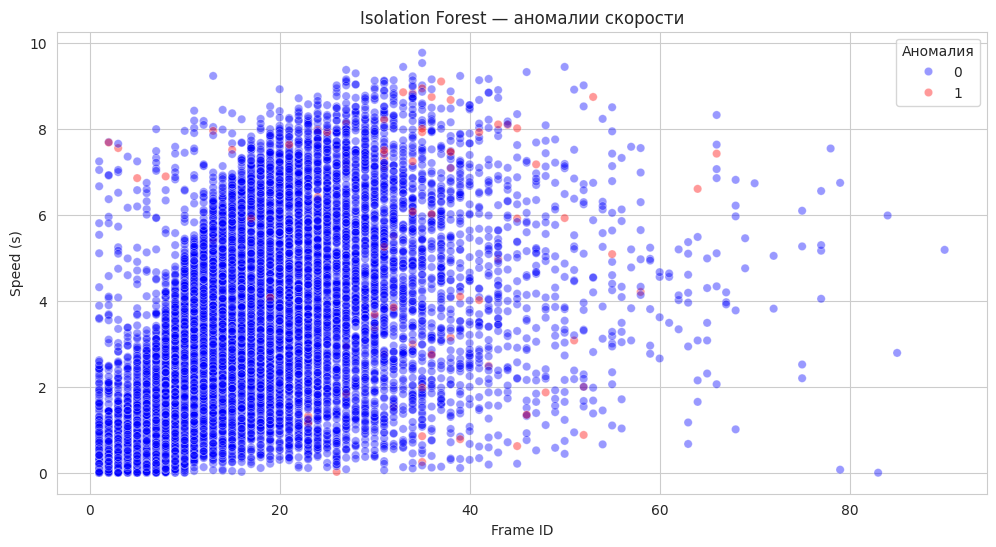

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_sample.sample(15000, random_state=42),
    x="frame_id",
    y="s",
    hue="iso_outlier",
    palette={0: "blue", 1: "red"},
    alpha=0.4
)
plt.title("Isolation Forest — аномалии скорости")
plt.xlabel("Frame ID")
plt.ylabel("Speed (s)")
plt.legend(title="Аномалия")
plt.show()


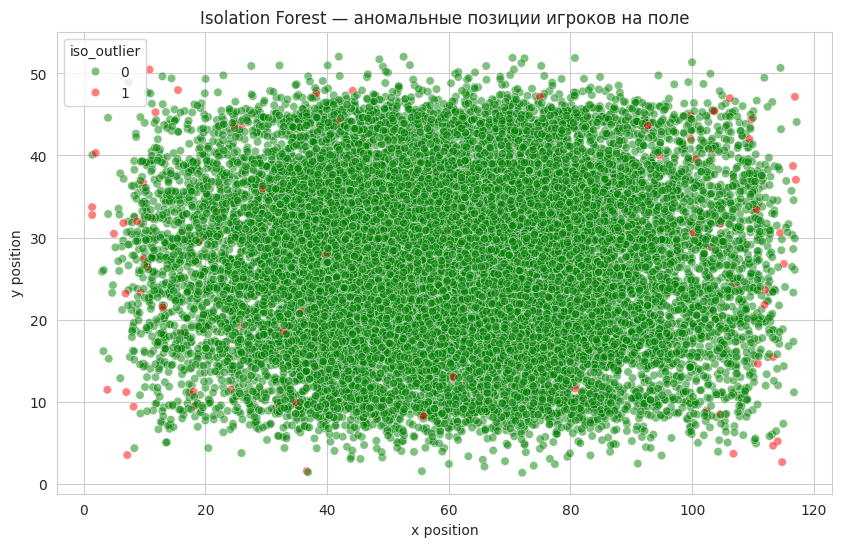

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_sample.sample(20000, random_state=1),
    x="x_input",
    y="y_input",
    hue="iso_outlier",
    palette={0: "green", 1: "red"},
    alpha=0.5
)
plt.title("Isolation Forest — аномальные позиции игроков на поле")
plt.xlabel("x position")
plt.ylabel("y position")
plt.show()


Isolation Forest действительно показывает аномальные позициии игроков на поле: обычно игроки сконцентрированы ближе к центру поля, но никак не на самых краях

При этом нельзя точно сказать являются ли эти данные выбросами. Полагаю, что они могут являться важными данными для модели, поскольку ситуации, в которых игрок может оказаться где-то на краю поля, вполне возможны и могут сильно влиять на результат

In [ ]:
df_sample["target_movement"] = np.sqrt(
    (df_sample["x_output"] - df_sample["x_input"])**2 +
    (df_sample["y_output"] - df_sample["y_input"])**2
)

In [ ]:
df_sample = pd.get_dummies(
    df_sample,
    columns=["player_side", "play_direction"],
    drop_first=True
)

In [ ]:
baseline_rmse = np.sqrt(
    ((df_sample["x_output"] - df_sample["x_input"])**2 +
     (df_sample["y_output"] - df_sample["y_input"])**2).mean()
)
print("Baseline RMSE movement:", baseline_rmse)

Baseline RMSE movement: 12.88005302172313


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_sample["player_name_le"] = le.fit_transform(df_sample["player_name"])

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

knn = NearestNeighbors(n_neighbors=5)
knn.fit(df_sample[["x_input", "y_input"]])

distances, _ = knn.kneighbors(df_sample[["x_input", "y_input"]])

df_sample["knn_density"] = distances.mean(axis=1)

In [ ]:
# расстояние до ближайшего защитника (важная фича для нашей задачи)
offense = df_sample[df_sample["player_side_Offense"] == 1]
defense = df_sample[df_sample["player_side_Offense"] == 0]

knn_def = NearestNeighbors(n_neighbors=1)
knn_def.fit(defense[["x_input", "y_input"]])

distances, _ = knn_def.kneighbors(offense[["x_input", "y_input"]])
offense["closest_defender_dist"] = distances

df_sample = df_sample.merge(
    offense["closest_defender_dist"],
    left_index=True, right_index=True, how="left"
)

/tmp/ipython-input-4049524816.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense["closest_defender_dist"] = distances


In [ ]:
# нормируем frane_id и добавим sin/cos для фреймов, чтобы показать модели периодичность движений
df_sample["frame_norm"] = df_sample["frame_id"] / df_sample["num_frames_output"].clip(lower=1)
df_sample["frame_sin"] = np.sin(2 * np.pi * df_sample["frame_norm"])
df_sample["frame_cos"] = np.cos(2 * np.pi * df_sample["frame_norm"])

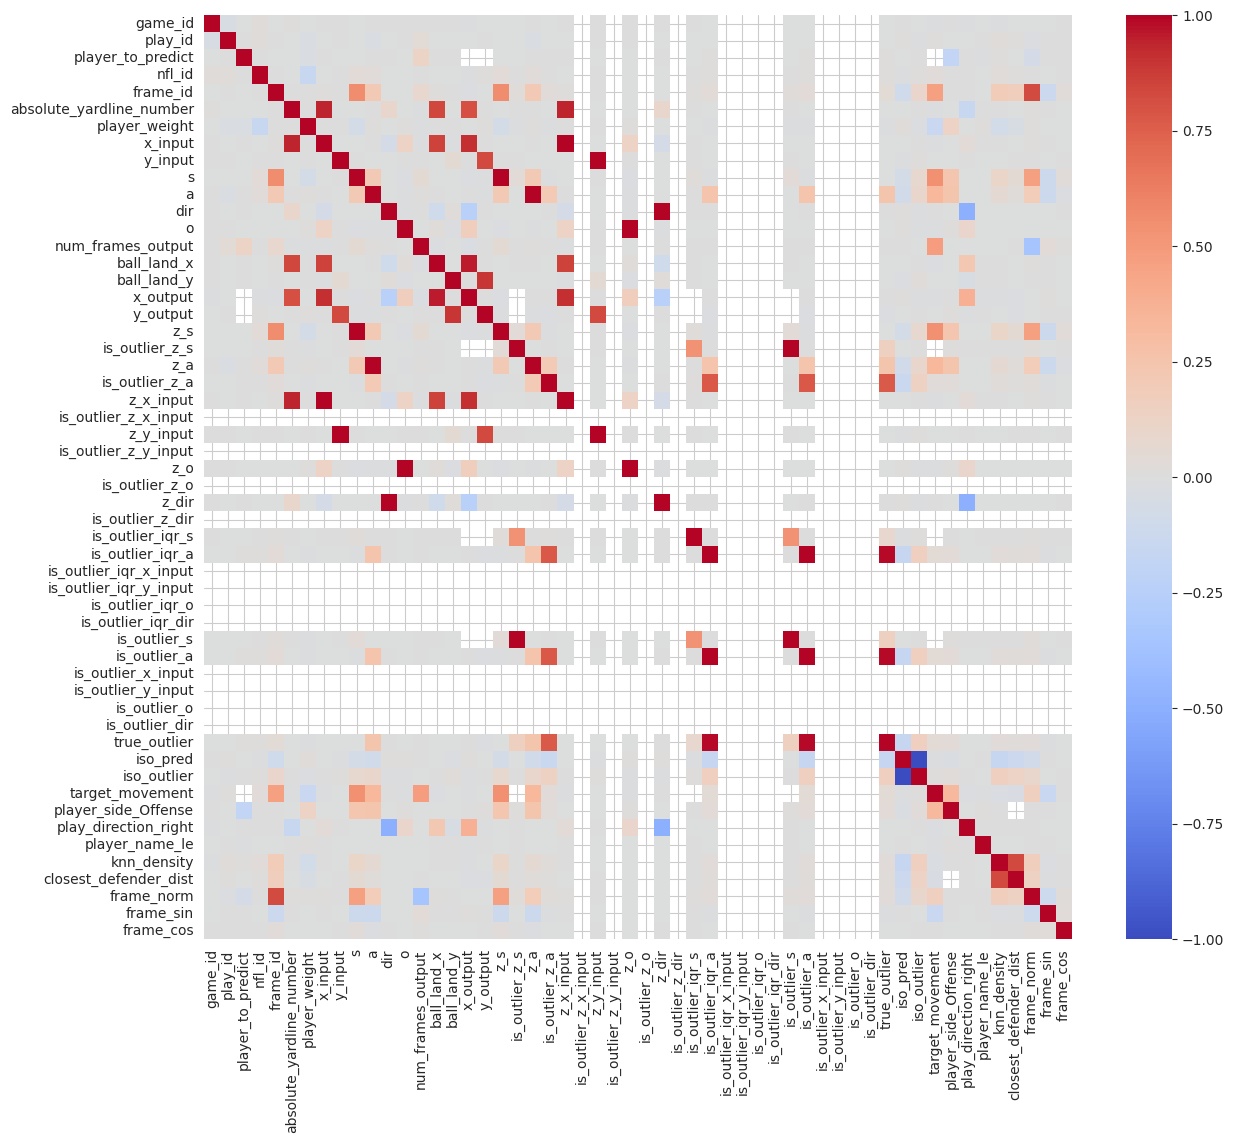

In [ ]:
# матрица корреляций признаков
plt.figure(figsize=(14,12))
sns.heatmap(df_sample.corr(numeric_only=True), cmap="coolwarm")
plt.show()

### Чекпоинт 3

In [ ]:
!pip install shap lime catboost lightgbm xgboost umap-learn optuna -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import shap
import lime
import lime.lime_tabular
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from scipy.optimize import minimize
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
import umap
import networkx as nx
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 153.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.4 MB/s eta 0:

In [ ]:
import os
import glob
train_dir = "/root/.cache/kagglehub/competitions/nfl-big-data-bowl-2026-prediction/train"
input_files = sorted(glob.glob(os.path.join(train_dir, "input_2023_w*.csv")))
output_files = sorted(glob.glob(os.path.join(train_dir, "output_2023_w*.csv")))
input_dfs = []
for file in tqdm(input_files, desc='Loading input'):
    input_dfs.append(pd.read_csv(file))
df_input = pd.concat(input_dfs, ignore_index=True)
output_dfs = []
for file in tqdm(output_files, desc='Loading output'):
    output_dfs.append(pd.read_csv(file))
df_output = pd.concat(output_dfs, ignore_index=True)
df = pd.merge(
    df_input, df_output,
    on=['game_id', 'play_id', 'nfl_id', 'frame_id'],
    how='inner',
    suffixes=('', '_target')
)
df = df.rename(columns={'x': 'x_start', 'y': 'y_start', 'x_target': 'x_end', 'y_target': 'y_end'})
print(f"Загружено {len(df):,} записей")
df_sample = df.sample(frac=0.1, random_state=42).reset_index(drop=True)
print(f"Используем sample: {len(df_sample):,} записей")

Loading output: 100%|██████████| 18/18 [00:00<00:00, 164.00it/s]


Загружено 560,426 записей
Используем sample: 56,043 записей


In [ ]:
def create_all_features(df):
    df = df.copy()
    df['time_remaining'] = (df['num_frames_output'] - df['frame_id']) / 10.0
    df['time_ratio'] = df['frame_id'] / df['num_frames_output'].clip(lower=1)
    df['frame_sin'] = np.sin(2 * np.pi * df['time_ratio'])
    df['frame_cos'] = np.cos(2 * np.pi * df['time_ratio'])
    df['dist_to_ball'] = np.sqrt(
        (df['ball_land_x'] - df['x_start'])**2 +
        (df['ball_land_y'] - df['y_start'])**2
    )
    df['angle_to_ball'] = np.arctan2(
        df['ball_land_y'] - df['y_start'],
        df['ball_land_x'] - df['x_start']
    )
    df['dir_rad'] = np.radians(df['dir'])
    df['vx'] = df['s'] * np.cos(df['dir_rad'])
    df['vy'] = df['s'] * np.sin(df['dir_rad'])
    df['angle_diff'] = df['dir_rad'] - df['angle_to_ball']
    df['angle_diff_cos'] = np.cos(df['angle_diff'])
    df['speed_to_ball'] = df['s'] * df['angle_diff_cos']
    t = df['time_remaining']
    df['x_kinematic'] = df['x_start'] + df['vx'] * t
    df['y_kinematic'] = df['y_start'] + df['vy'] * t
    df['x_interp'] = df['x_start'] + (df['ball_land_x'] - df['x_start']) * df['time_ratio']
    df['y_interp'] = df['y_start'] + (df['ball_land_y'] - df['y_start']) * df['time_ratio']
    df['is_targeted'] = (df['player_role'] == 'Targeted Receiver').astype(int)
    df['is_defense'] = (df['player_role'] == 'Defensive Coverage').astype(int)
    df['is_offense'] = (df['player_side'] == 'Offense').astype(int)
    df['o_rad'] = np.radians(df['o'])
    df['o_sin'] = np.sin(df['o_rad'])
    df['o_cos'] = np.cos(df['o_rad'])
    df['y_from_center'] = np.abs(df['y_start'] - 26.65)
    le = LabelEncoder()
    df['position_encoded'] = le.fit_transform(df['player_position'].fillna('UNK'))
    return df
df_sample = create_all_features(df_sample)
print(f"Features created. Shape: {df_sample.shape}")

Features created. Shape: (56043, 49)


In [ ]:
feature_cols = [
    'x_start', 'y_start', 's', 'a', 'o', 'dir',
    'ball_land_x', 'ball_land_y', 'frame_id', 'num_frames_output',
    'time_remaining', 'time_ratio', 'frame_sin', 'frame_cos',
    'dist_to_ball', 'angle_to_ball', 'vx', 'vy',
    'angle_diff_cos', 'speed_to_ball',
    'x_kinematic', 'y_kinematic', 'x_interp', 'y_interp',
    'is_targeted', 'is_defense', 'is_offense',
    'o_sin', 'o_cos', 'y_from_center', 'position_encoded'
]
feature_cols = [c for c in feature_cols if c in df_sample.columns]
print(f"Используем {len(feature_cols)} признаков")
df_clean = df_sample.dropna(subset=['x_end', 'y_end'])
X = df_clean[feature_cols].fillna(0).replace([np.inf, -np.inf], 0)
y_x = df_clean['x_end'].values
y_y = df_clean['y_end'].values
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(
    X_scaled, y_x, y_y, test_size=0.2, random_state=42
)
X_train_raw = X.loc[X_train.index]
X_test_raw = X.loc[X_test.index]
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Используем 31 признаков
Train: 44834, Test: 11209


In [ ]:
models = {}
results = {}
ridge_x = Ridge(alpha=1.0, random_state=42)
ridge_x.fit(X_train, y_x_train)
ridge_y = Ridge(alpha=1.0, random_state=42)
ridge_y.fit(X_train, y_y_train)
pred_ridge_x = ridge_x.predict(X_test)
pred_ridge_y = ridge_y.predict(X_test)
rmse_ridge = np.sqrt((mean_squared_error(y_x_test, pred_ridge_x) + mean_squared_error(y_y_test, pred_ridge_y)) / 2)
print(f"Ridge RMSE: {rmse_ridge:.4f}")
models['Ridge'] = {'x': ridge_x, 'y': ridge_y, 'type': 'linear'}
results['Ridge'] = rmse_ridge

lgb_params = {
    'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.05,
    'num_leaves': 31, 'subsample': 0.8, 'colsample_bytree': 0.8,
    'random_state': 42, 'verbosity': -1, 'n_jobs': -1
}
lgb_x = lgb.LGBMRegressor(**lgb_params)
lgb_x.fit(X_train_raw, y_x_train)
lgb_y = lgb.LGBMRegressor(**lgb_params)
lgb_y.fit(X_train_raw, y_y_train)
pred_lgb_x = lgb_x.predict(X_test_raw)
pred_lgb_y = lgb_y.predict(X_test_raw)
rmse_lgb = np.sqrt((mean_squared_error(y_x_test, pred_lgb_x) + mean_squared_error(y_y_test, pred_lgb_y)) / 2)
print(f"LightGBM RMSE: {rmse_lgb:.4f}")
models['LightGBM'] = {'x': lgb_x, 'y': lgb_y, 'type': 'tree'}
results['LightGBM'] = rmse_lgb

cat_params = {
    'iterations': 500, 'depth': 8, 'learning_rate': 0.05,
    'random_seed': 42, 'verbose': False
}
cat_x = cb.CatBoostRegressor(**cat_params)
cat_x.fit(X_train_raw, y_x_train, verbose=False)
cat_y = cb.CatBoostRegressor(**cat_params)
cat_y.fit(X_train_raw, y_y_train, verbose=False)
pred_cat_x = cat_x.predict(X_test_raw)
pred_cat_y = cat_y.predict(X_test_raw)
rmse_cat = np.sqrt((mean_squared_error(y_x_test, pred_cat_x) + mean_squared_error(y_y_test, pred_cat_y)) / 2)
print(f"CatBoost RMSE: {rmse_cat:.4f}")
models['CatBoost'] = {'x': cat_x, 'y': cat_y, 'type': 'tree'}
results['CatBoost'] = rmse_cat

def ensemble_rmse(weights):
    w = np.array(weights) / sum(weights)
    pred_x = w[0]*pred_ridge_x + w[1]*pred_lgb_x + w[2]*pred_cat_x
    pred_y = w[0]*pred_ridge_y + w[1]*pred_lgb_y + w[2]*pred_cat_y
    return np.sqrt((mean_squared_error(y_x_test, pred_x) + mean_squared_error(y_y_test, pred_y)) / 2)
from scipy.optimize import minimize
result = minimize(ensemble_rmse, [0.1, 0.45, 0.45], method='Nelder-Mead')
opt_weights = np.array(result.x) / sum(result.x)
print(f"Optimal weights: Ridge={opt_weights[0]:.3f}, LGB={opt_weights[1]:.3f}, CAT={opt_weights[2]:.3f}")
pred_ens_x = opt_weights[0]*pred_ridge_x + opt_weights[1]*pred_lgb_x + opt_weights[2]*pred_cat_x
pred_ens_y = opt_weights[0]*pred_ridge_y + opt_weights[1]*pred_lgb_y + opt_weights[2]*pred_cat_y
rmse_ens = np.sqrt((mean_squared_error(y_x_test, pred_ens_x) + mean_squared_error(y_y_test, pred_ens_y)) / 2)
print(f"Ensemble RMSE: {rmse_ens:.4f}")
results['Ensemble'] = rmse_ens
for model, rmse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{model}: RMSE = {rmse:.4f}")
baseline_rmse = results['Ensemble']

Ridge RMSE: 4.4167
LightGBM RMSE: 3.5197
CatBoost RMSE: 3.5206
Optimal weights: Ridge=-0.114, LGB=0.552, CAT=0.563
Ensemble RMSE: 3.4819
Ensemble: RMSE = 3.4819
LightGBM: RMSE = 3.5197
CatBoost: RMSE = 3.5206
Ridge: RMSE = 4.4167


Глобальная интерпретация SHAP

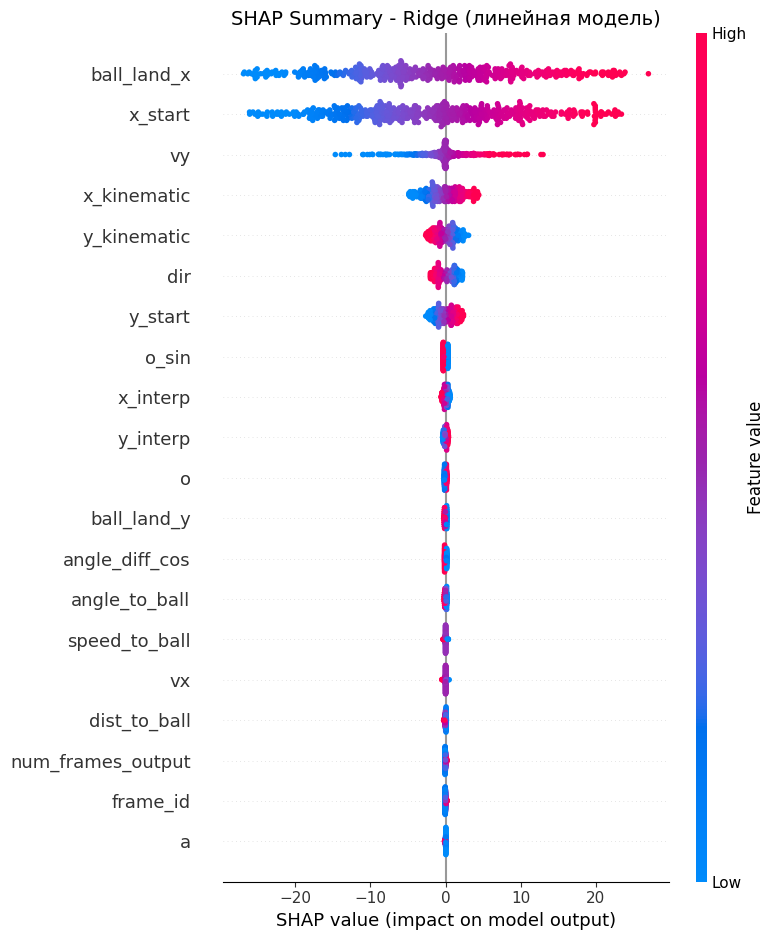

In [ ]:
n_shap = min(500, len(X_test))
shap_idx = X_test.sample(n_shap, random_state=42).index
X_shap_scaled = X_test.loc[shap_idx]
X_shap_raw = X_test_raw.loc[shap_idx]
explainer_ridge = shap.LinearExplainer(ridge_x, X_train)
shap_values_ridge = explainer_ridge.shap_values(X_shap_scaled)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_ridge, X_shap_scaled, feature_names=feature_cols, show=False)
plt.title("SHAP Summary - Ridge (линейная модель)", fontsize=14)
plt.tight_layout()
plt.savefig('shap_ridge_summary.png', dpi=150, bbox_inches='tight')
plt.show()

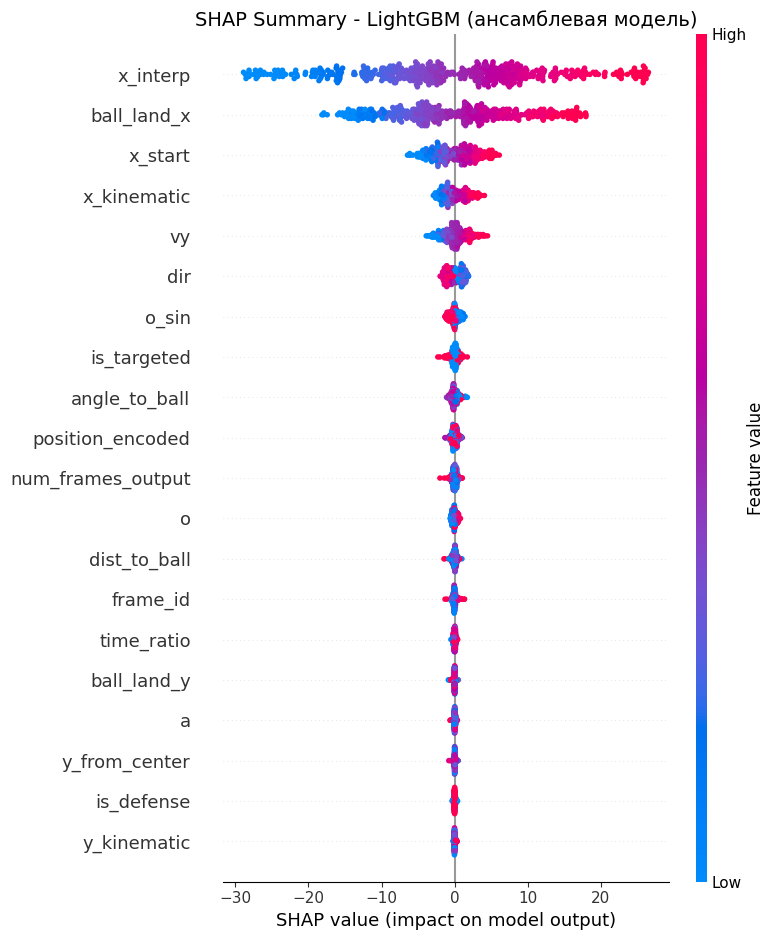

In [ ]:
explainer_lgb = shap.TreeExplainer(lgb_x)
shap_values_lgb = explainer_lgb.shap_values(X_shap_raw)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_lgb, X_shap_raw, feature_names=feature_cols, show=False)
plt.title("SHAP Summary - LightGBM (ансамблевая модель)", fontsize=14)
plt.tight_layout()
plt.savefig('shap_lgb_summary.png', dpi=150, bbox_inches='tight')
plt.show()

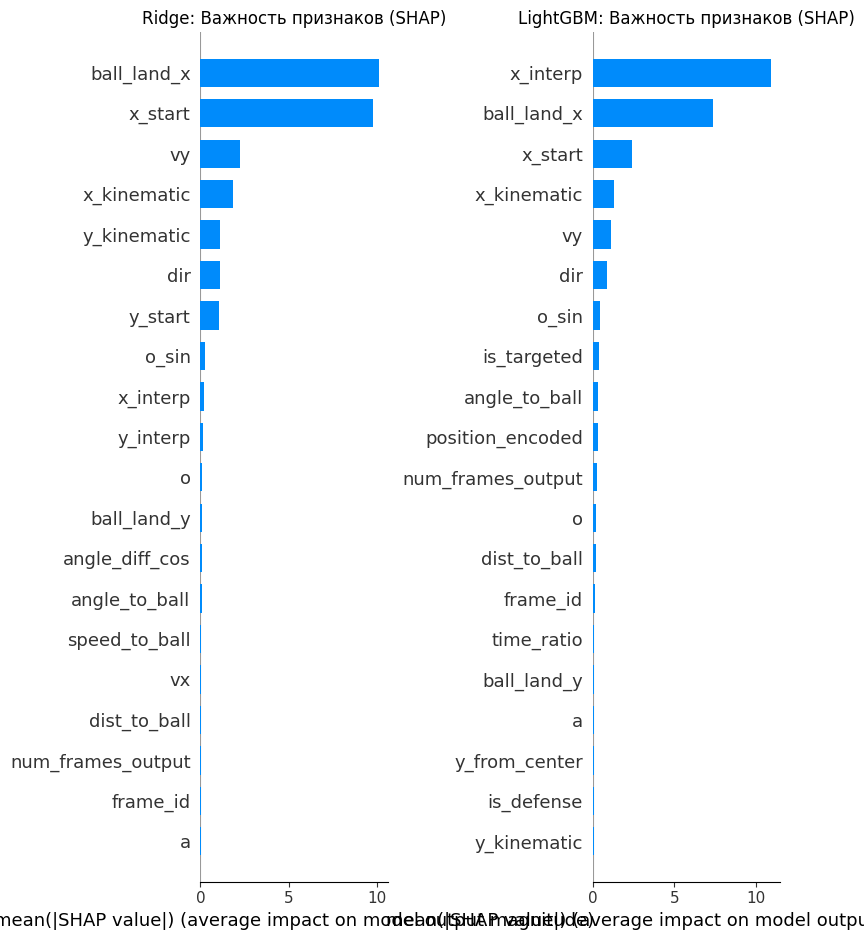

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plt.sca(axes[0])
shap.summary_plot(shap_values_ridge, X_shap_scaled, feature_names=feature_cols, plot_type="bar", show=False)
axes[0].set_title("Ridge: Важность признаков (SHAP)")
plt.sca(axes[1])
shap.summary_plot(shap_values_lgb, X_shap_raw, feature_names=feature_cols, plot_type="bar", show=False)
axes[1].set_title("LightGBM: Важность признаков (SHAP)")
plt.tight_layout()
plt.savefig('shap_comparison_bar.png', dpi=150, bbox_inches='tight')
plt.show()

Глобальная интерпретация LIME

LIME LGB: 100%|██████████| 30/30 [00:01<00:00, 22.02it/s]


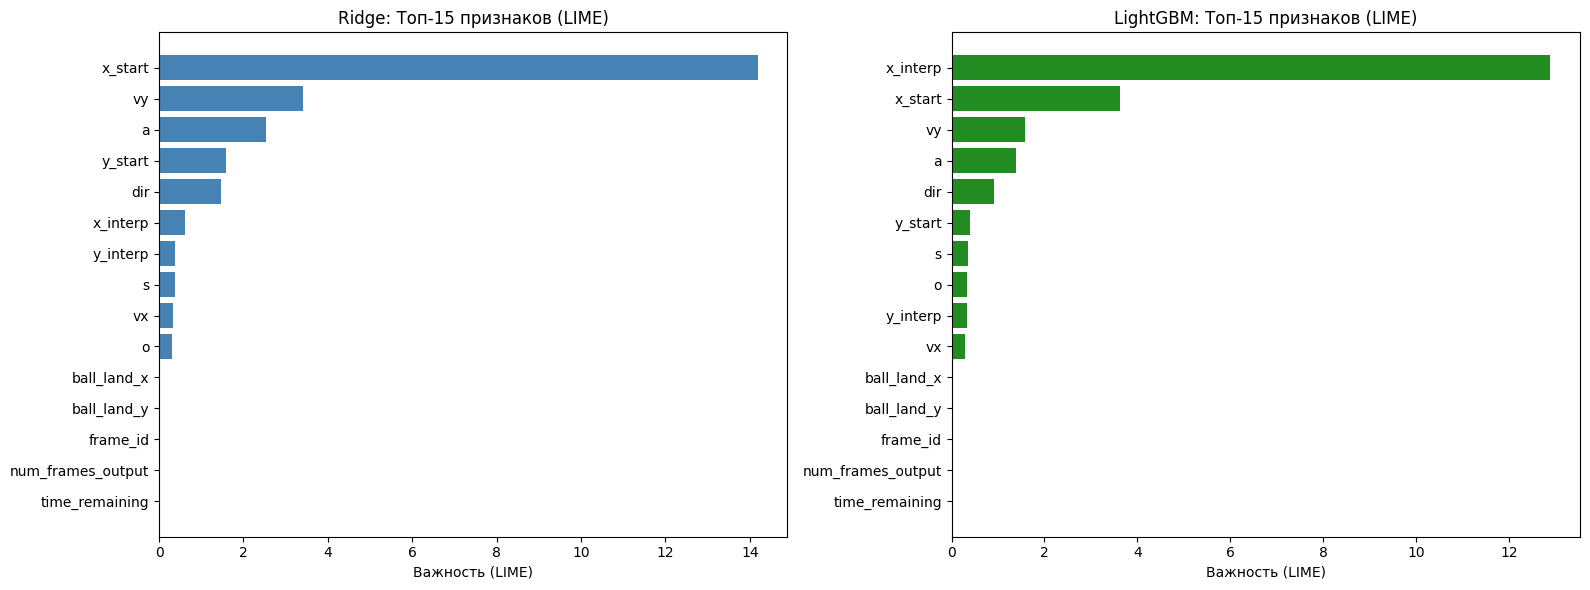

In [ ]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_cols,
    mode='regression',
    random_state=42
)

def get_lime_global_importance(model, X_data, n_samples=30):
    importance = {f: [] for f in feature_cols}
    indices = np.random.choice(len(X_data), min(n_samples, len(X_data)), replace=False)
    for idx in tqdm(indices, desc="LIME"):
        try:
            exp = lime_explainer.explain_instance(
                X_data.iloc[idx].values, model.predict, num_features=len(feature_cols)
            )
            for feat, imp in exp.as_list():
                for f in feature_cols:
                    if f in feat:
                        importance[f].append(abs(imp))
                        break
        except:
            continue
    return {f: np.mean(v) if v else 0 for f, v in importance.items()}

lime_ridge = get_lime_global_importance(ridge_x, X_test, n_samples=30)
lime_explainer_raw = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_raw.values, feature_names=feature_cols, mode='regression', random_state=42
)

def get_lime_lgb(X_data, n_samples=30):
    importance = {f: [] for f in feature_cols}
    indices = np.random.choice(len(X_data), min(n_samples, len(X_data)), replace=False)
    for idx in tqdm(indices, desc="LIME LGB"):
        try:
            exp = lime_explainer_raw.explain_instance(
                X_data.iloc[idx].values, lgb_x.predict, num_features=len(feature_cols)
            )
            for feat, imp in exp.as_list():
                for f in feature_cols:
                    if f in feat:
                        importance[f].append(abs(imp))
                        break
        except:
            continue
    return {f: np.mean(v) if v else 0 for f, v in importance.items()}

lime_lgb = get_lime_lgb(X_test_raw, n_samples=30)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sorted_ridge = sorted(lime_ridge.items(), key=lambda x: x[1], reverse=True)[:15]
axes[0].barh([x[0] for x in sorted_ridge], [x[1] for x in sorted_ridge], color='steelblue')
axes[0].set_xlabel('Важность (LIME)')
axes[0].set_title('Ridge: Топ-15 признаков (LIME)')
axes[0].invert_yaxis()
sorted_lgb = sorted(lime_lgb.items(), key=lambda x: x[1], reverse=True)[:15]
axes[1].barh([x[0] for x in sorted_lgb], [x[1] for x in sorted_lgb], color='forestgreen')
axes[1].set_xlabel('Важность (LIME)')
axes[1].set_title('LightGBM: Топ-15 признаков (LIME)')
axes[1].invert_yaxis()
plt.tight_layout()
plt.savefig('lime_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

Сравнение признаков между моделями

In [ ]:
shap_imp_ridge = np.abs(shap_values_ridge).mean(axis=0)
shap_imp_lgb = np.abs(shap_values_lgb).mean(axis=0)
comparison_df = pd.DataFrame({
    'Feature': feature_cols,
    'SHAP_Ridge': shap_imp_ridge,
    'SHAP_LightGBM': shap_imp_lgb,
    'LIME_Ridge': [lime_ridge.get(f, 0) for f in feature_cols],
    'LIME_LightGBM': [lime_lgb.get(f, 0) for f in feature_cols]
})
for col in ['SHAP_Ridge', 'SHAP_LightGBM', 'LIME_Ridge', 'LIME_LightGBM']:
    comparison_df[f'{col}_norm'] = comparison_df[col] / comparison_df[col].max()
    comparison_df[f'{col}_rank'] = comparison_df[col].rank(ascending=False)

In [ ]:
print("Топ-10 признаков по SHAP")
print(comparison_df.nsmallest(10, 'SHAP_Ridge_rank')[['Feature', 'SHAP_Ridge', 'SHAP_Ridge_rank']])
print(comparison_df.nsmallest(10, 'SHAP_LightGBM_rank')[['Feature', 'SHAP_LightGBM', 'SHAP_LightGBM_rank']])

Топ-10 признаков по SHAP
        Feature  SHAP_Ridge  SHAP_Ridge_rank
6   ball_land_x   10.101042              1.0
0       x_start    9.779308              2.0
17           vy    2.255657              3.0
20  x_kinematic    1.843376              4.0
21  y_kinematic    1.109275              5.0
5           dir    1.105780              6.0
1       y_start    1.051291              7.0
27        o_sin    0.257790              8.0
22     x_interp    0.223131              9.0
23     y_interp    0.166616             10.0
             Feature  SHAP_LightGBM  SHAP_LightGBM_rank
22          x_interp      10.917905                 1.0
6        ball_land_x       7.349282                 2.0
0            x_start       2.404697                 3.0
20       x_kinematic       1.289489                 4.0
17                vy       1.100666                 5.0
5                dir       0.863362                 6.0
27             o_sin       0.458411                 7.0
24       is_targeted       0.349

In [ ]:
from scipy.stats import spearmanr
corr_shap, p_shap = spearmanr(comparison_df['SHAP_Ridge_rank'], comparison_df['SHAP_LightGBM_rank'])
corr_lime, p_lime = spearmanr(comparison_df['LIME_Ridge_rank'], comparison_df['LIME_LightGBM_rank'])
corr_ridge_methods, _ = spearmanr(comparison_df['SHAP_Ridge_rank'], comparison_df['LIME_Ridge_rank'])
corr_lgb_methods, _ = spearmanr(comparison_df['SHAP_LightGBM_rank'], comparison_df['LIME_LightGBM_rank'])
print(f"SHAP: Ridge vs LightGBM:  r = {corr_shap:.3f} (p = {p_shap:.4f})")
print(f"LIME: Ridge vs LightGBM:  r = {corr_lime:.3f} (p = {p_lime:.4f})")
print(f"Ridge: SHAP vs LIME:      r = {corr_ridge_methods:.3f}")
print(f"LightGBM: SHAP vs LIME:   r = {corr_lgb_methods:.3f}")

SHAP: Ridge vs LightGBM:  r = 0.586 (p = 0.0005)
LIME: Ridge vs LightGBM:  r = 0.988 (p = 0.0000)
Ridge: SHAP vs LIME:      r = 0.447
LightGBM: SHAP vs LIME:   r = 0.232


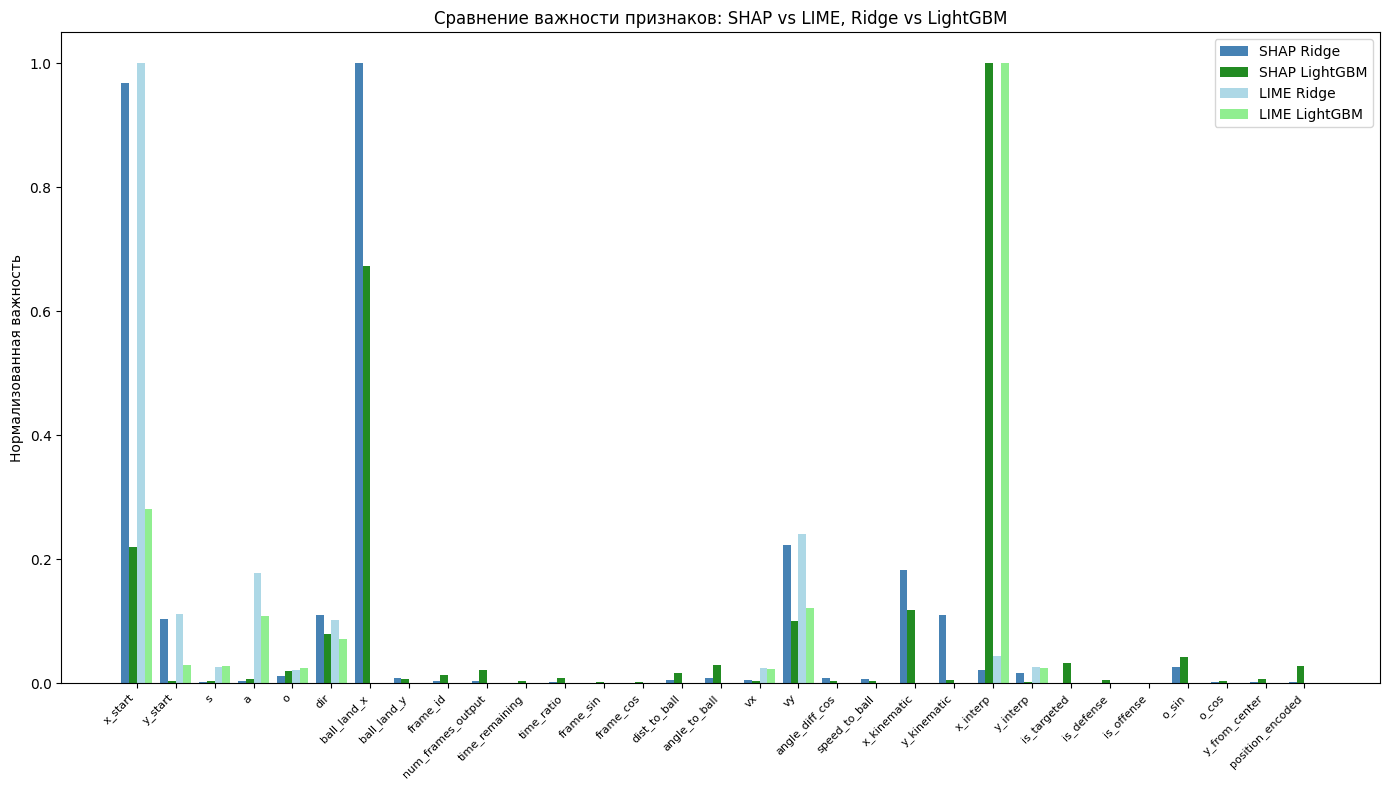

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(feature_cols))
width = 0.2
ax.bar(x - 1.5*width, comparison_df['SHAP_Ridge_norm'], width, label='SHAP Ridge', color='steelblue')
ax.bar(x - 0.5*width, comparison_df['SHAP_LightGBM_norm'], width, label='SHAP LightGBM', color='forestgreen')
ax.bar(x + 0.5*width, comparison_df['LIME_Ridge_norm'], width, label='LIME Ridge', color='lightblue')
ax.bar(x + 1.5*width, comparison_df['LIME_LightGBM_norm'], width, label='LIME LightGBM', color='lightgreen')
ax.set_ylabel('Нормализованная важность')
ax.set_title('Сравнение важности признаков: SHAP vs LIME, Ridge vs LightGBM')
ax.set_xticks(x)
ax.set_xticklabels(feature_cols, rotation=45, ha='right', fontsize=8)
ax.legend()
plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

Локальная интерпретация

In [ ]:
errors = np.abs(y_x_test - pred_lgb_x)
obs_idx = X_test.index[np.argmax(errors)]
X_single_scaled = X_test.loc[[obs_idx]]
X_single_raw = X_test_raw.loc[[obs_idx]]
y_true_x = y_x_test[np.argmax(errors)]
y_pred_x = pred_lgb_x[np.argmax(errors)]
print(f"\nВыбранное наблюдение (индекс {obs_idx}):")
print(f"  Истинное x: {y_true_x:.2f}")
print(f"  Предсказание LightGBM: {y_pred_x:.2f}")
print(f"  Ошибка: {abs(y_true_x - y_pred_x):.2f}")
print(f"\nЗначения ключевых признаков:")
for col in ['x_start', 'ball_land_x', 'dist_to_ball', 's', 'is_targeted']:
    if col in X_single_raw.columns:
        print(f"  {col}: {X_single_raw[col].values[0]:.2f}")


Выбранное наблюдение (индекс 46984):
  Истинное x: 24.84
  Предсказание LightGBM: 48.03
  Ошибка: 23.19

Значения ключевых признаков:
  x_start: 61.58
  ball_land_x: 36.01
  dist_to_ball: 33.27
  s: 1.74
  is_targeted: 0.00


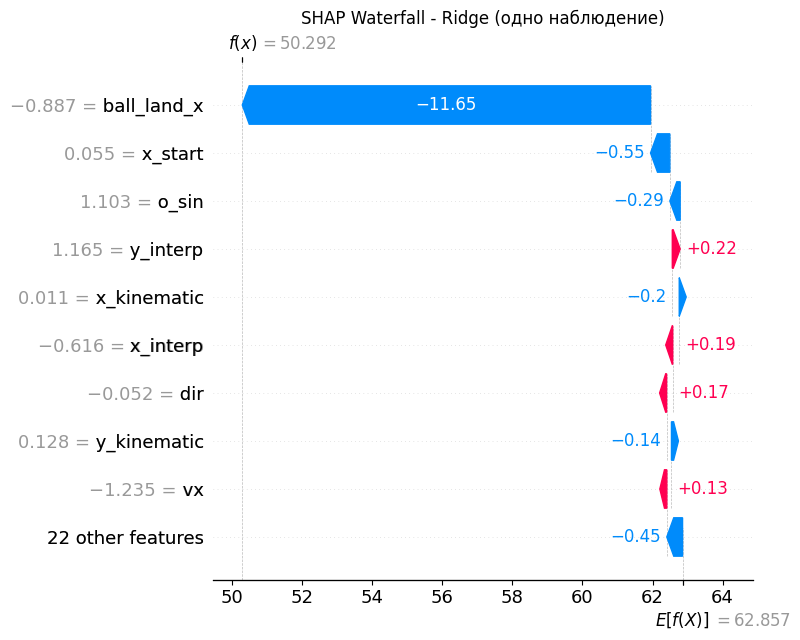

In [ ]:
shap_single_ridge = explainer_ridge.shap_values(X_single_scaled)
plt.figure(figsize=(12, 6))
shap.waterfall_plot(shap.Explanation(
    values=shap_single_ridge[0],
    base_values=explainer_ridge.expected_value,
    data=X_single_scaled.values[0],
    feature_names=feature_cols
), show=False)
plt.title("SHAP Waterfall - Ridge (одно наблюдение)")
plt.tight_layout()
plt.savefig('shap_waterfall_ridge.png', dpi=150, bbox_inches='tight')
plt.show()

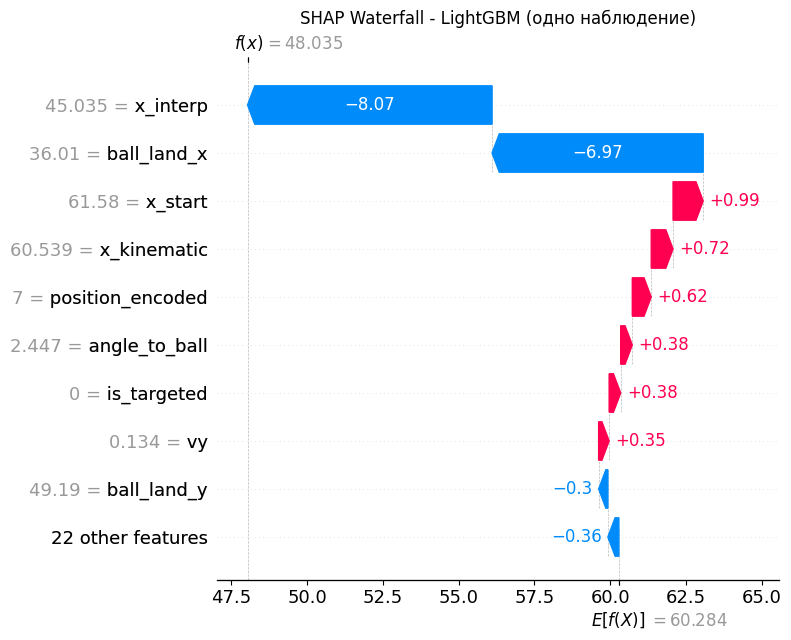

In [ ]:
shap_single_lgb = explainer_lgb.shap_values(X_single_raw)
plt.figure(figsize=(12, 6))
shap.waterfall_plot(shap.Explanation(
    values=shap_single_lgb[0],
    base_values=explainer_lgb.expected_value,
    data=X_single_raw.values[0],
    feature_names=feature_cols
), show=False)
plt.title("SHAP Waterfall - LightGBM (одно наблюдение)")
plt.tight_layout()
plt.savefig('shap_waterfall_lgb.png', dpi=150, bbox_inches='tight')
plt.show()

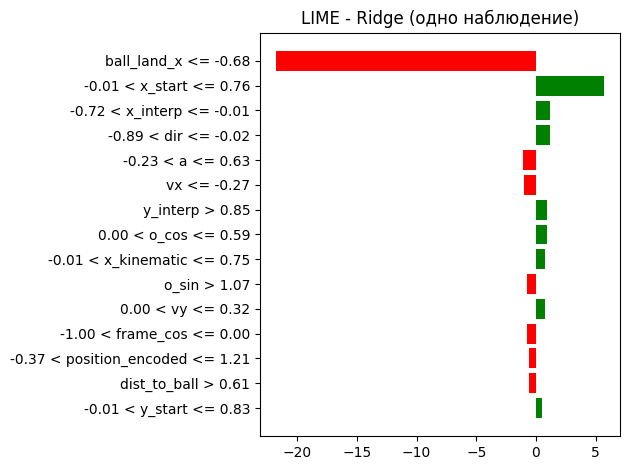

In [ ]:
lime_single_ridge = lime_explainer.explain_instance(
    X_single_scaled.values[0], ridge_x.predict, num_features=15
)
fig = lime_single_ridge.as_pyplot_figure()
plt.title("LIME - Ridge (одно наблюдение)")
plt.tight_layout()
plt.savefig('lime_local_ridge.png', dpi=150, bbox_inches='tight')
plt.show()

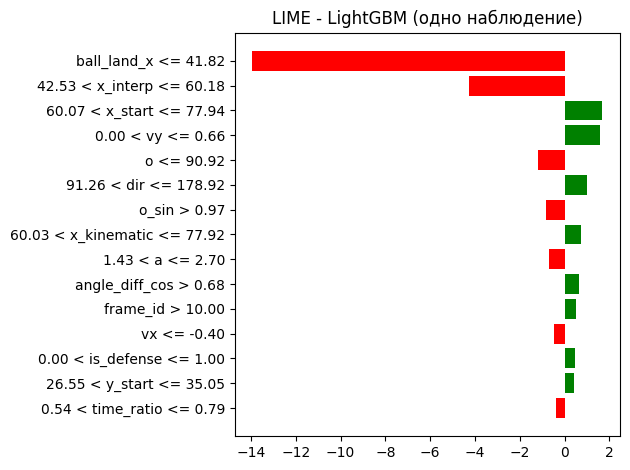

In [ ]:
lime_single_lgb = lime_explainer_raw.explain_instance(
    X_single_raw.values[0], lgb_x.predict, num_features=15
)
fig = lime_single_lgb.as_pyplot_figure()
plt.title("LIME - LightGBM (одно наблюдение)")
plt.tight_layout()
plt.savefig('lime_local_lgb.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
local_df = pd.DataFrame({
    'Feature': feature_cols,
    'SHAP_Ridge': shap_single_ridge[0],
    'SHAP_LightGBM': shap_single_lgb[0]
}).sort_values('SHAP_LightGBM', key=abs, ascending=False)
print("\nТоп-10 признаков по абсолютному SHAP вкладу (LightGBM):")
print(local_df.head(10).to_string(index=False))


Топ-10 признаков по абсолютному SHAP вкладу (LightGBM):
         Feature  SHAP_Ridge  SHAP_LightGBM
        x_interp    0.187325      -8.066019
     ball_land_x  -11.650489      -6.965281
         x_start   -0.550851       0.994758
     x_kinematic   -0.198175       0.719727
position_encoded    0.000223       0.624286
   angle_to_ball   -0.116105       0.383337
     is_targeted   -0.003332       0.380653
              vy    0.096647       0.346823
     ball_land_y   -0.132382      -0.304622
           o_sin   -0.294780      -0.268877


SHAP-эмбеддинги

In [ ]:
def get_shap_embeddings(model, X_data, model_type='tree'):
    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
    elif model_type == 'linear':
        explainer = shap.LinearExplainer(model, X_data)
    else:
        raise ValueError(f"Unknown model_type: {model_type}")
    shap_values = explainer.shap_values(X_data)
    return shap_values, explainer

def shap_to_dataframe(shap_values, feature_names, index=None):
    return pd.DataFrame(
        shap_values,
        columns=[f'shap_{c}' for c in feature_names],
        index=index
    )

def get_full_shap_embeddings(model, X_train, X_test, model_type='tree'):
    print(f"Computing SHAP for train ({len(X_train)} samples)")
    shap_train, explainer = get_shap_embeddings(model, X_train, model_type)
    print(f"Computing SHAP for test ({len(X_test)} samples)")
    shap_test = explainer.shap_values(X_test)
    return shap_train, shap_test, explainer

shap_train, shap_test, lgb_explainer = get_full_shap_embeddings(
    lgb_x, X_train_raw, X_test_raw, 'tree'
)
shap_train_df = shap_to_dataframe(shap_train, feature_cols, X_train_raw.index)
shap_test_df = shap_to_dataframe(shap_test, feature_cols, X_test_raw.index)

print(f"\nSHAP-эмбеддинги train: {shap_train_df.shape}")
print(f"SHAP-эмбеддинги test: {shap_test_df.shape}")

print("\nСтатистика SHAP (train):")
print(shap_train_df.describe().T[['mean', 'std', 'min', 'max']].head(10))

Computing SHAP for train (44834 samples)
Computing SHAP for test (11209 samples)

SHAP-эмбеддинги train: (44834, 31)
SHAP-эмбеддинги test: (11209, 31)

Статистика SHAP (train):
                            mean       std        min        max
shap_x_start           -0.018713  2.709190  -7.072133   6.702570
shap_y_start           -0.002751  0.064138  -0.788200   0.601970
shap_s                  0.002043  0.072473  -0.439118   1.172185
shap_a                 -0.004321  0.099883  -0.935507   0.916264
shap_o                  0.005427  0.269599  -0.752168   1.768739
shap_dir                0.006914  0.985645  -2.151399   2.264289
shap_ball_land_x       -0.013105  8.480403 -19.670502  19.751988
shap_ball_land_y       -0.021787  0.144924  -1.346082   1.083329
shap_frame_id          -0.014682  0.247235  -2.475587   3.304674
shap_num_frames_output  0.015200  0.314803  -2.703468   5.047973


Выявление сдвигов и аномалий

In [ ]:
z_train = np.abs(stats.zscore(shap_train_df, nan_policy='omit'))
z_test = np.abs(stats.zscore(shap_test_df, nan_policy='omit'))
anomaly_z_train = (z_train > 3).any(axis=1)
anomaly_z_test = (z_test > 3).any(axis=1)
print(f"Аномалий (Z>3) в train: {anomaly_z_train.sum()} ({anomaly_z_train.mean()*100:.2f}%)")
print(f"Аномалий (Z>3) в test: {anomaly_z_test.sum()} ({anomaly_z_test.mean()*100:.2f}%)")

Аномалий (Z>3) в train: 10628 (23.71%)
Аномалий (Z>3) в test: 2641 (23.56%)


In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_train = iso.fit_predict(shap_train_df)
iso_test = iso.predict(shap_test_df)
anomaly_iso_train = iso_train == -1
anomaly_iso_test = iso_test == -1
print(f"Аномалий (IsoForest) в train: {anomaly_iso_train.sum()} ({anomaly_iso_train.mean()*100:.2f}%)")
print(f"Аномалий (IsoForest) в test: {anomaly_iso_test.sum()} ({anomaly_iso_test.mean()*100:.2f}%)")

Аномалий (IsoForest) в train: 2242 (5.00%)
Аномалий (IsoForest) в test: 487 (4.34%)


In [ ]:
shift_results = []
for col in shap_train_df.columns:
    ks_stat, ks_pval = stats.ks_2samp(shap_train_df[col], shap_test_df[col])
    shift_results.append({
        'Feature': col.replace('shap_', ''),
        'KS_stat': ks_stat,
        'KS_pval': ks_pval,
        'Significant': ks_pval < 0.05
    })
shift_df = pd.DataFrame(shift_results).sort_values('KS_stat', ascending=False)
print(f"\nПризнаков со значимым сдвигом (p<0.05): {shift_df['Significant'].sum()}")
print("\nТоп-10 признаков с наибольшим сдвигом:")
print(shift_df.head(10).to_string(index=False))


Признаков со значимым сдвигом (p<0.05): 1

Топ-10 признаков с наибольшим сдвигом:
          Feature  KS_stat  KS_pval  Significant
num_frames_output 0.015274 0.030164         True
   angle_diff_cos 0.012010 0.149270        False
        frame_sin 0.011858 0.159293        False
    speed_to_ball 0.011183 0.210512        False
            o_cos 0.010837 0.241259        False
               vy 0.010721 0.252205        False
         frame_id 0.010269 0.298723        False
    angle_to_ball 0.010264 0.299304        False
     dist_to_ball 0.009545 0.385036        False
      ball_land_x 0.009305 0.416839        False


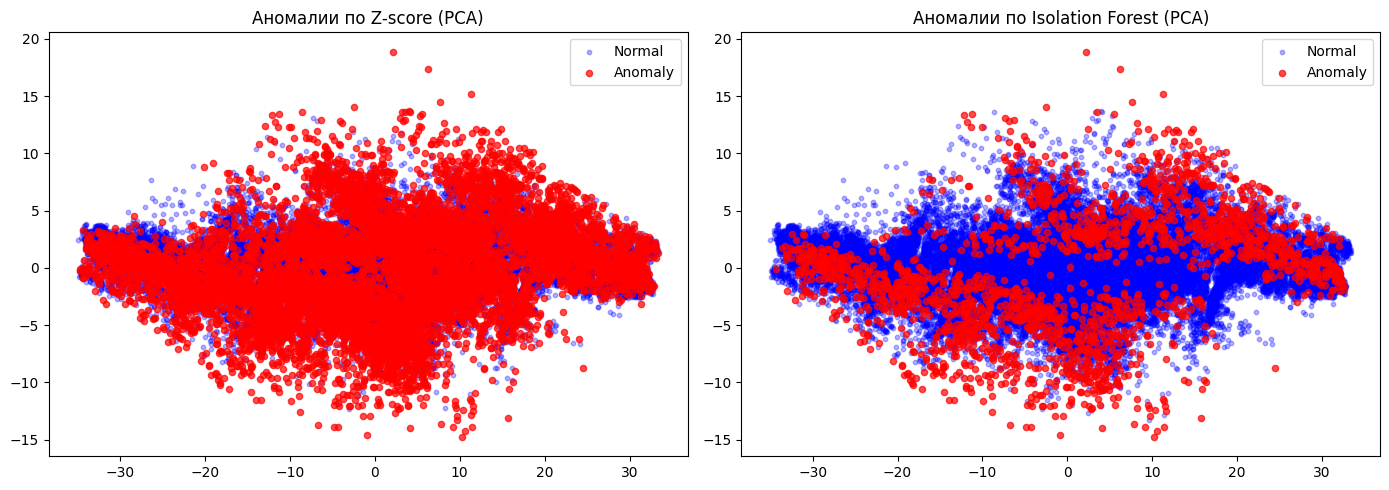

In [ ]:
pca = PCA(n_components=2, random_state=42)
shap_pca = pca.fit_transform(shap_train_df)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(shap_pca[~anomaly_z_train, 0], shap_pca[~anomaly_z_train, 1], c='blue', alpha=0.3, s=10, label='Normal')
axes[0].scatter(shap_pca[anomaly_z_train, 0], shap_pca[anomaly_z_train, 1],  c='red', alpha=0.7, s=20, label='Anomaly')
axes[0].set_title('Аномалии по Z-score (PCA)')
axes[0].legend()
axes[1].scatter(shap_pca[~anomaly_iso_train, 0], shap_pca[~anomaly_iso_train, 1],   c='blue', alpha=0.3, s=10, label='Normal')
axes[1].scatter(shap_pca[anomaly_iso_train, 0], shap_pca[anomaly_iso_train, 1],
                c='red', alpha=0.7, s=20, label='Anomaly')
axes[1].set_title('Аномалии по Isolation Forest (PCA)')
axes[1].legend()
plt.tight_layout()
plt.savefig('anomalies_pca.png', dpi=150, bbox_inches='tight')
plt.show()

Очистка данных и переобучение

In [ ]:
combined_anomalies = anomaly_z_train | anomaly_iso_train
print(f"Всего аномалий для удаления: {combined_anomalies.sum()} ({combined_anomalies.mean()*100:.2f}%)")

Всего аномалий для удаления: 10726 (23.92%)


In [ ]:
X_train_clean = X_train_raw[~combined_anomalies]
y_x_train_clean = y_x_train[~combined_anomalies]
y_y_train_clean = y_y_train[~combined_anomalies]
print(f"Train до очистки: {len(X_train_raw)}")
print(f"Train после очистки: {len(X_train_clean)}")

Train до очистки: 44834
Train после очистки: 34108


LightGBM (до очистки):    RMSE = 3.5197
LightGBM (после очистки): RMSE = 3.6858
Изменение: +4.72%


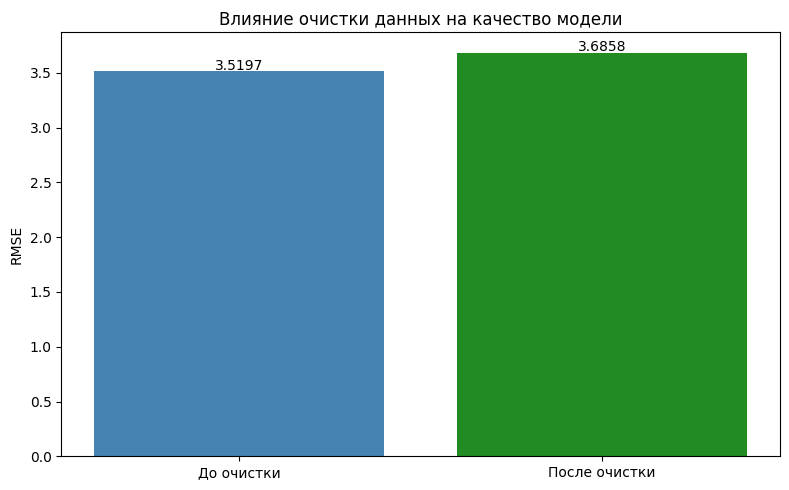

Очистка данных дала ухудшение на 4.72%


In [ ]:
lgb_clean_x = lgb.LGBMRegressor(**lgb_params)
lgb_clean_x.fit(X_train_clean, y_x_train_clean)
lgb_clean_y = lgb.LGBMRegressor(**lgb_params)
lgb_clean_y.fit(X_train_clean, y_y_train_clean)
pred_clean_x = lgb_clean_x.predict(X_test_raw)
pred_clean_y = lgb_clean_y.predict(X_test_raw)
rmse_clean = np.sqrt((mean_squared_error(y_x_test, pred_clean_x) +
                      mean_squared_error(y_y_test, pred_clean_y)) / 2)
print(f"LightGBM (до очистки):    RMSE = {rmse_lgb:.4f}")
print(f"LightGBM (после очистки): RMSE = {rmse_clean:.4f}")
change = (rmse_clean - rmse_lgb) / rmse_lgb * 100
print(f"Изменение: {change:+.2f}%")
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(['До очистки', 'После очистки'], [rmse_lgb, rmse_clean],
       color=['steelblue', 'forestgreen'])
ax.set_ylabel('RMSE')
ax.set_title('Влияние очистки данных на качество модели')
for i, v in enumerate([rmse_lgb, rmse_clean]):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.savefig('cleaning_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"Очистка данных дала {'улучшение' if change < 0 else 'ухудшение'} на {abs(change):.2f}%")

Кластеризация SHAP-эмбеддингов

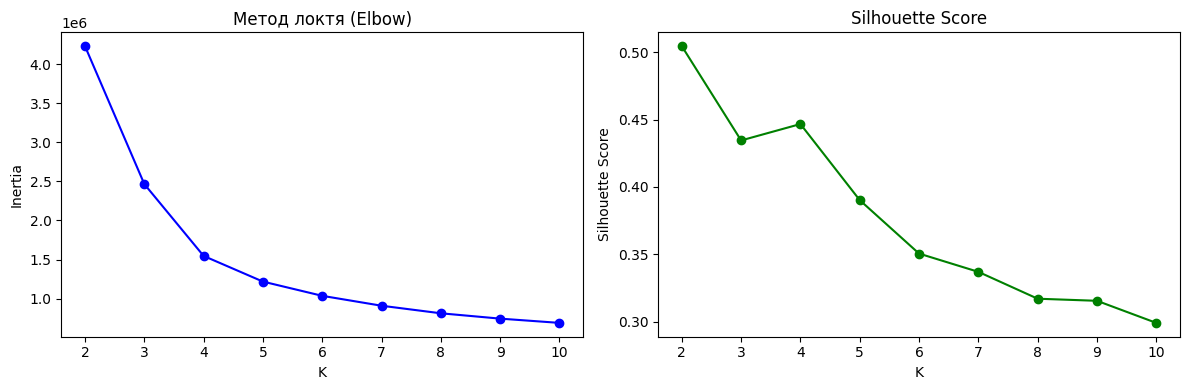

Выбрано оптимальное K = 4


In [ ]:
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(shap_train_df)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(shap_train_df, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Метод локтя (Elbow)')

axes[1].plot(K_range, silhouettes, 'go-')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
plt.tight_layout()
plt.savefig('clustering_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

optimal_k = 4
print(f"Выбрано оптимальное K = {optimal_k}")

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(shap_train_df)
print(f"Распределение по кластерам: {np.bincount(kmeans_labels)}")

Распределение по кластерам: [ 7290 15137  6867 15540]


In [ ]:
agg = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg.fit_predict(shap_train_df)
print(f"Распределение: {np.bincount(agg_labels)}")

Распределение: [19196  8123 14154  3361]


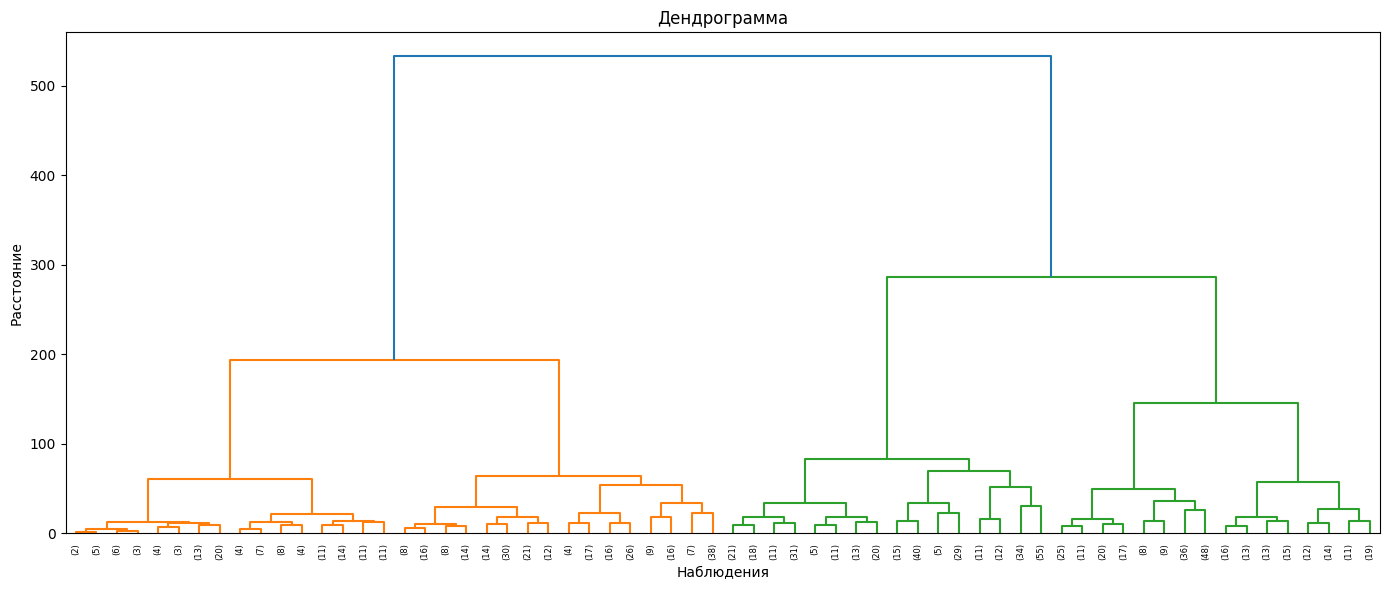

In [ ]:
sample_size = min(1000, len(shap_train_df))
sample_idx = np.random.choice(len(shap_train_df), sample_size, replace=False)
linkage_matrix = linkage(shap_train_df.iloc[sample_idx], method='ward')
plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Дендрограмма')
plt.xlabel('Наблюдения')
plt.ylabel('Расстояние')
plt.tight_layout()
plt.savefig('dendrogram.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
shap_scaled = StandardScaler().fit_transform(shap_train_df)
dbscan = DBSCAN(eps=1.0, min_samples=10)
dbscan_labels = dbscan.fit_predict(shap_scaled)
n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = (dbscan_labels == -1).sum()
print(f"DBSCAN: {n_clusters_db} кластеров, {n_noise} шумовых точек")

DBSCAN: 0 кластеров, 44834 шумовых точек


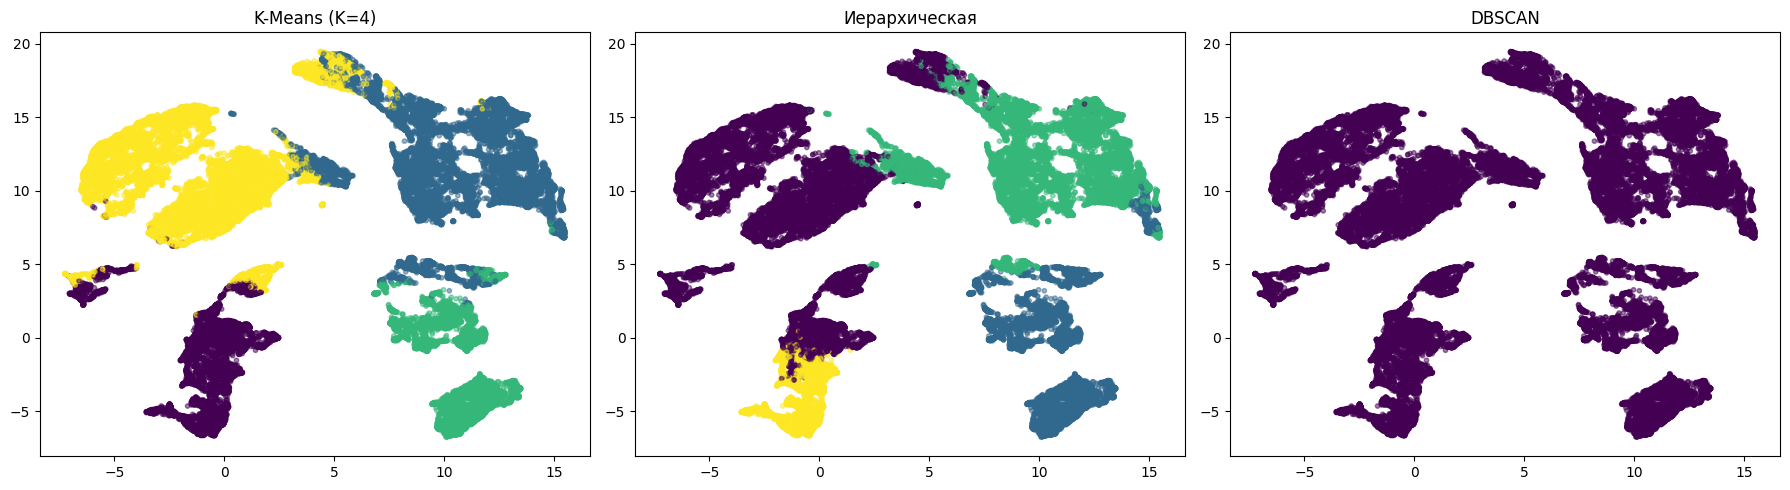

In [ ]:
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
shap_umap = umap_reducer.fit_transform(shap_train_df)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(shap_umap[:, 0], shap_umap[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, s=10)
axes[0].set_title(f'K-Means (K={optimal_k})')
axes[1].scatter(shap_umap[:, 0], shap_umap[:, 1], c=agg_labels, cmap='viridis', alpha=0.5, s=10)
axes[1].set_title('Иерархическая')
axes[2].scatter(shap_umap[:, 0], shap_umap[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.5, s=10)
axes[2].set_title('DBSCAN')
plt.tight_layout()
plt.savefig('clustering_umap.png', dpi=150, bbox_inches='tight')
plt.show()

Интерпретация кластеров и переобучение

In [ ]:
X_train_clustered = X_train_raw.copy()
X_train_clustered['cluster'] = kmeans_labels
for cluster_id in range(optimal_k):
    mask = kmeans_labels == cluster_id
    cluster_data = X_train_raw[mask]
    print(f"\nКластер {cluster_id} (n={mask.sum()}, {mask.mean()*100:.1f}%):")
    for col in ['x_start', 'y_start', 's', 'dist_to_ball', 'is_targeted']:
        if col in cluster_data.columns:
            print(f"  {col}: {cluster_data[col].mean():.2f} ± {cluster_data[col].std():.2f}")


Кластер 0 (n=7290, 16.3%):
  x_start: 92.92 ± 11.39
  y_start: 27.18 ± 10.07
  s: 1.83 ± 1.88
  dist_to_ball: 16.21 ± 9.33
  is_targeted: 0.30 ± 0.46

Кластер 1 (n=15137, 33.8%):
  x_start: 48.30 ± 10.49
  y_start: 26.74 ± 10.25
  s: 1.63 ± 1.72
  dist_to_ball: 15.70 ± 9.74
  is_targeted: 0.28 ± 0.45

Кластер 2 (n=6867, 15.3%):
  x_start: 27.45 ± 11.08
  y_start: 26.50 ± 9.92
  s: 1.95 ± 1.98
  dist_to_ball: 17.06 ± 9.59
  is_targeted: 0.29 ± 0.46

Кластер 3 (n=15540, 34.7%):
  x_start: 71.06 ± 10.82
  y_start: 26.54 ± 10.15
  s: 1.65 ± 1.70
  dist_to_ball: 15.84 ± 9.69
  is_targeted: 0.28 ± 0.45


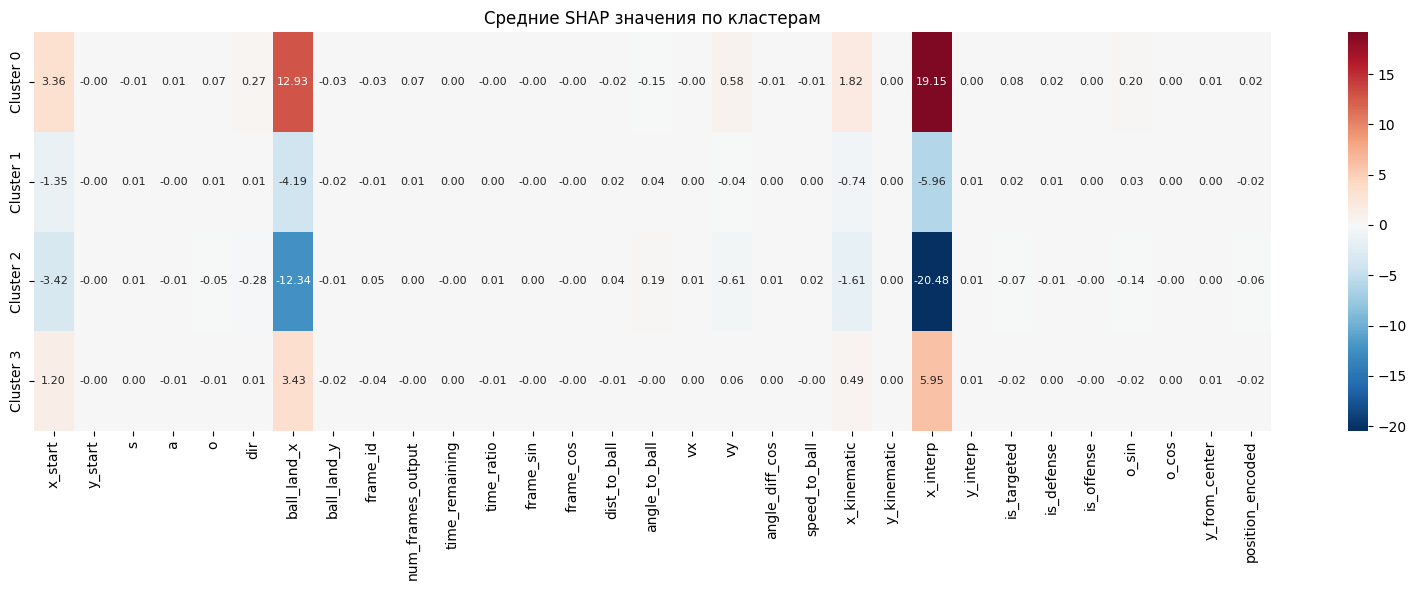

In [ ]:
cluster_shap_means = []
for c in range(optimal_k):
    mask = kmeans_labels == c
    cluster_shap_means.append(shap_train_df[mask].mean())
cluster_shap_df = pd.DataFrame(cluster_shap_means, index=[f'Cluster {i}' for i in range(optimal_k)])
cluster_shap_df.columns = [c.replace('shap_', '') for c in cluster_shap_df.columns]
plt.figure(figsize=(16, 6))
sns.heatmap(cluster_shap_df, cmap='RdBu_r', center=0, annot=True, fmt='.2f',
            annot_kws={'size': 8})
plt.title('Средние SHAP значения по кластерам')
plt.tight_layout()
plt.savefig('cluster_shap_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
X_train_with_cluster = pd.get_dummies(X_train_clustered, columns=['cluster'], prefix='cluster')
kmeans_test_labels = kmeans.predict(shap_test_df)
X_test_clustered = X_test_raw.copy()
X_test_clustered['cluster'] = kmeans_test_labels
X_test_with_cluster = pd.get_dummies(X_test_clustered, columns=['cluster'], prefix='cluster')
for col in X_train_with_cluster.columns:
    if col not in X_test_with_cluster.columns:
        X_test_with_cluster[col] = 0
X_test_with_cluster = X_test_with_cluster[X_train_with_cluster.columns]
lgb_cluster_x = lgb.LGBMRegressor(**lgb_params)
lgb_cluster_x.fit(X_train_with_cluster, y_x_train)
lgb_cluster_y = lgb.LGBMRegressor(**lgb_params)
lgb_cluster_y.fit(X_train_with_cluster, y_y_train)
pred_cluster_x = lgb_cluster_x.predict(X_test_with_cluster)
pred_cluster_y = lgb_cluster_y.predict(X_test_with_cluster)
rmse_cluster = np.sqrt((mean_squared_error(y_x_test, pred_cluster_x) +
                        mean_squared_error(y_y_test, pred_cluster_y)) / 2)
print(f"\nLightGBM (без кластеров): RMSE = {rmse_lgb:.4f}")
print(f"LightGBM (+ кластеры):    RMSE = {rmse_cluster:.4f}")
change_cluster = (rmse_cluster - rmse_lgb) / rmse_lgb * 100
print(f"Изменение: {change_cluster:+.2f}%")


LightGBM (без кластеров): RMSE = 3.5197
LightGBM (+ кластеры):    RMSE = 3.5220
Изменение: +0.07%


Кросс-валидация с SHAP-эмбеддингами

In [ ]:
X_full = pd.concat([X_train_raw, X_test_raw], axis=0)
y_x_full = np.concatenate([y_x_train, y_x_test])
y_y_full = np.concatenate([y_y_train, y_y_test])
shap_full = np.vstack([shap_train, shap_test])
shap_full_df = pd.DataFrame(shap_full, columns=[f'shap_{c}' for c in feature_cols])
X_concat = pd.concat([X_full.reset_index(drop=True), shap_full_df.reset_index(drop=True)], axis=1)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(X, y, model_class, params):
    scores = cross_val_score(model_class(**params), X, y, cv=kfold,
                             scoring='neg_mean_squared_error', n_jobs=-1)
    return np.sqrt(-scores).mean(), np.sqrt(-scores).std()
lgb_cv_params = {'n_estimators': 100, 'max_depth': 6, 'random_state': 42, 'verbosity': -1}
rmse_orig, std_orig = cv_rmse(X_full, y_x_full, lgb.LGBMRegressor, lgb_cv_params)
print(f"Только исходные признаки: RMSE = {rmse_orig:.4f} ± {std_orig:.4f}")

Только исходные признаки: RMSE = 3.7888 ± 0.0205


In [ ]:
rmse_shap_only, std_shap = cv_rmse(shap_full_df, y_x_full, lgb.LGBMRegressor, lgb_cv_params)
print(f"Только SHAP-эмбеддинги: RMSE = {rmse_shap_only:.4f} ± {std_shap:.4f}")

Только SHAP-эмбеддинги: RMSE = 3.0988 ± 0.0310


In [ ]:
rmse_concat, std_concat = cv_rmse(X_concat, y_x_full, lgb.LGBMRegressor, lgb_cv_params)
print(f"Исходные + SHAP-эмбеддинги:  RMSE = {rmse_concat:.4f} ± {std_concat:.4f}")

Исходные + SHAP-эмбеддинги:  RMSE = 3.0853 ± 0.0237


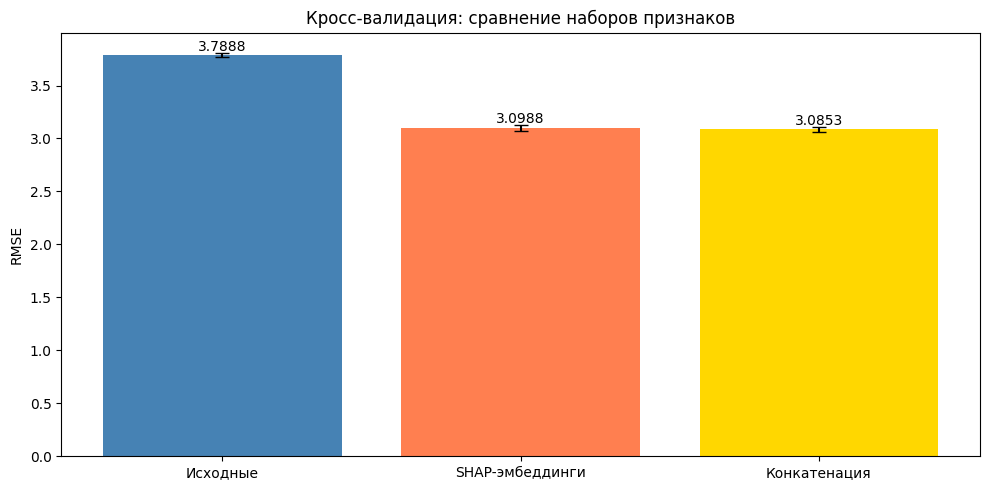

In [ ]:
cv_results = pd.DataFrame({
    'Вариант': ['Исходные', 'SHAP-эмбеддинги', 'Конкатенация'],
    'RMSE': [rmse_orig, rmse_shap_only, rmse_concat],
    'Std': [std_orig, std_shap, std_concat]
})
plt.figure(figsize=(10, 5))
bars = plt.bar(cv_results['Вариант'], cv_results['RMSE'],
               yerr=cv_results['Std'], capsize=5, color=['steelblue', 'coral', 'gold'])
plt.ylabel('RMSE')
plt.title('Кросс-валидация: сравнение наборов признаков')
for i, (v, s) in enumerate(zip(cv_results['RMSE'], cv_results['Std'])):
    plt.text(i, v + s + 0.02, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.savefig('cv_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

Граф взаимосвязей и Shapley Flow

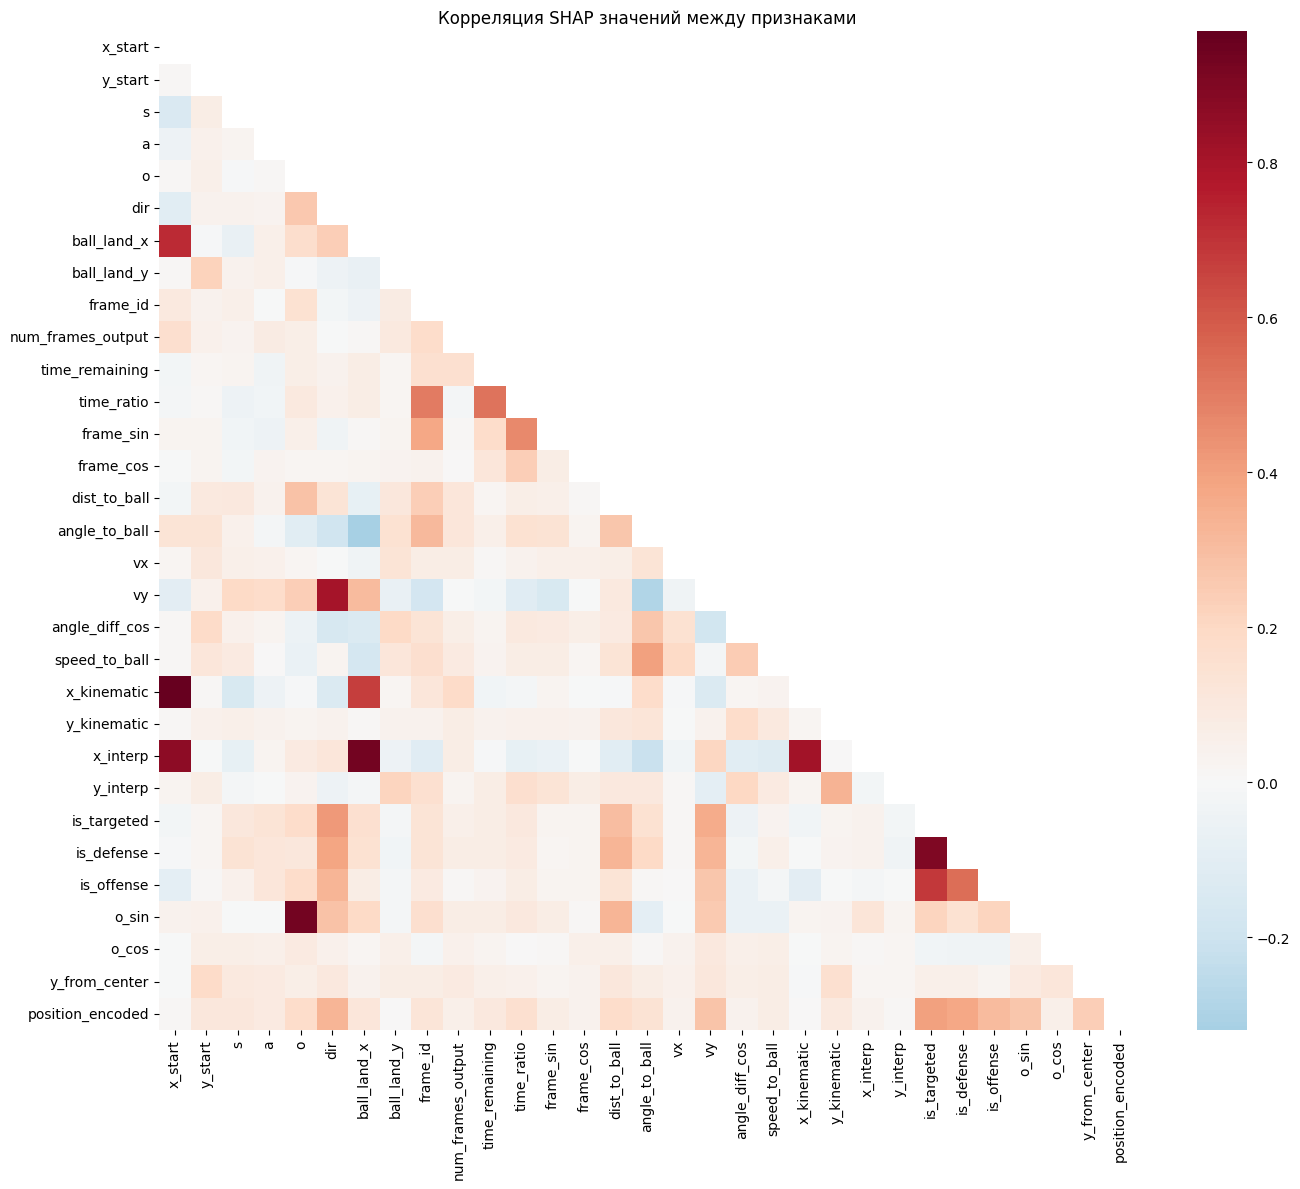

In [ ]:
shap_corr = shap_train_df.corr()
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(shap_corr, dtype=bool))
sns.heatmap(shap_corr, mask=mask, cmap='RdBu_r', center=0,
            xticklabels=[c.replace('shap_', '') for c in shap_corr.columns],
            yticklabels=[c.replace('shap_', '') for c in shap_corr.columns],
            annot=False)
plt.title('Корреляция SHAP значений между признаками')
plt.tight_layout()
plt.savefig('shap_correlation.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
G = nx.Graph()
for col in feature_cols:
    G.add_node(col)
threshold = 0.3
for i, col1 in enumerate(feature_cols):
    for j, col2 in enumerate(feature_cols):
        if i < j:
            corr = abs(shap_corr.iloc[i, j])
            if corr > threshold:
                G.add_edge(col1, col2, weight=corr)
print(f"Граф: {G.number_of_nodes()} узлов, {G.number_of_edges()} рёбер")

Граф: 31 узлов, 31 рёбер


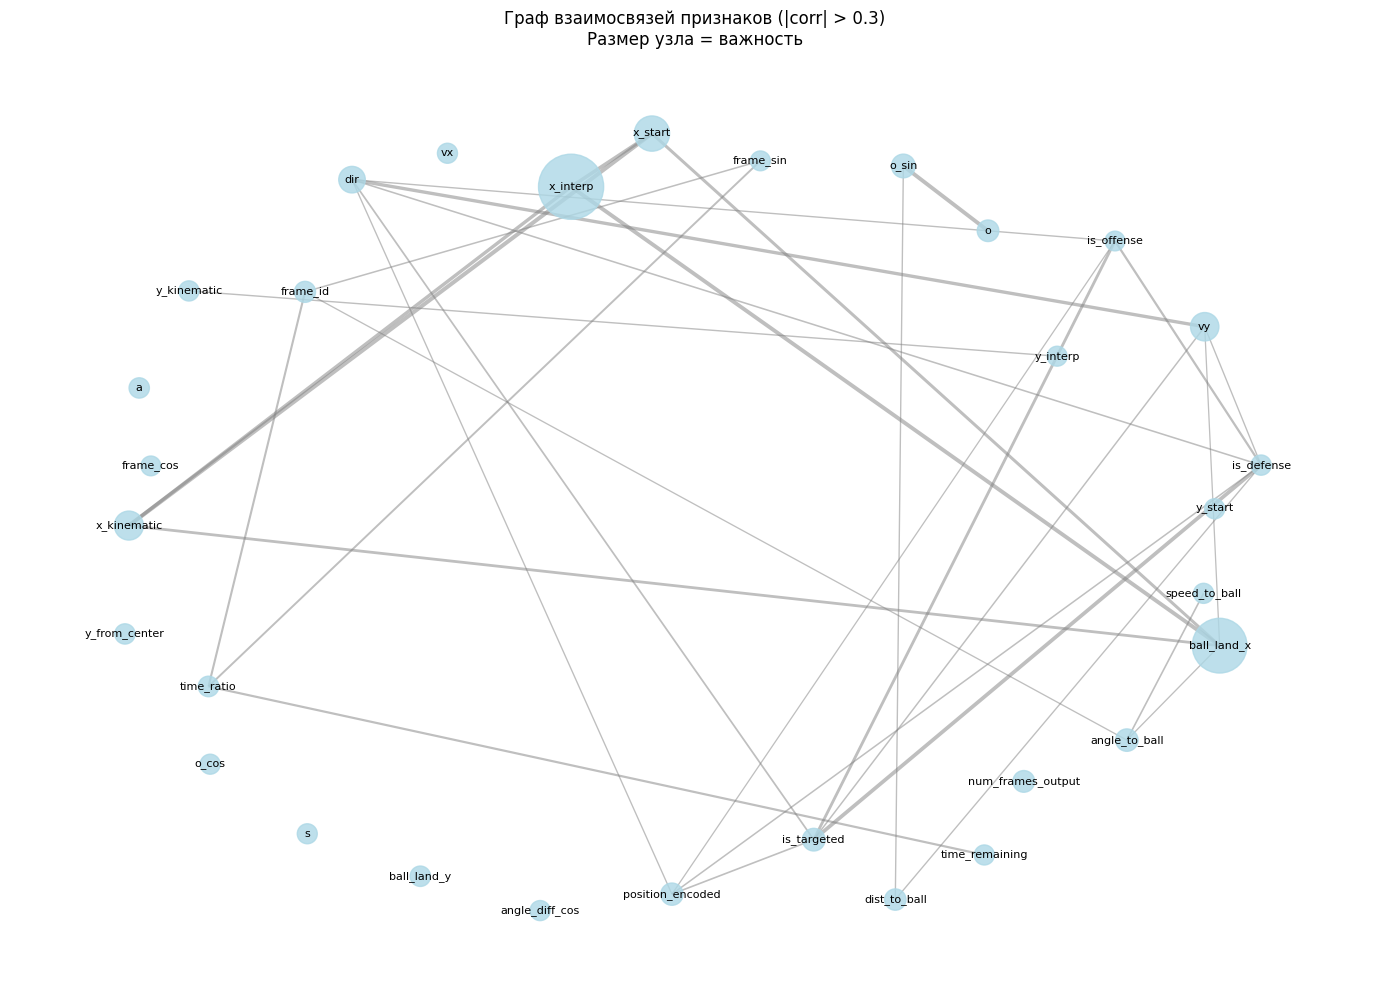

In [ ]:
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=2, seed=42)
node_importance = np.abs(shap_train).mean(axis=0)
node_sizes = (node_importance / node_importance.max()) * 2000 + 200
edge_weights = [G[u][v]['weight'] * 3 for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
plt.title(f'Граф взаимосвязей признаков (|corr| > {threshold})\nРазмер узла = важность')
plt.axis('off')
plt.tight_layout()
plt.savefig('feature_graph.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
def compute_shapley_flow(shap_vals, corr_matrix, feature_names):
    n_samples, n_features = shap_vals.shape
    flow = np.zeros_like(shap_vals)
    for i in range(n_features):
        flow[:, i] = shap_vals[:, i].copy()
        for j in range(n_features):
            if i != j:
                corr = abs(corr_matrix.iloc[i, j])
                if corr > 0.1:
                    flow[:, i] += corr * shap_vals[:, j] * 0.1
    return flow

flow_train = compute_shapley_flow(shap_train, shap_corr, feature_cols)
flow_train_df = pd.DataFrame(flow_train, columns=[f'flow_{c}' for c in feature_cols])
flow_test = compute_shapley_flow(shap_test, shap_corr, feature_cols)
flow_test_df = pd.DataFrame(flow_test, columns=[f'flow_{c}' for c in feature_cols])

In [ ]:
kmeans_flow = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
flow_labels = kmeans_flow.fit_predict(flow_train_df)

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(kmeans_labels, flow_labels)
nmi = normalized_mutual_info_score(kmeans_labels, flow_labels)
print(f"Сравнение кластеров SHAP vs Flow:")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info: {nmi:.4f}")

Сравнение кластеров SHAP vs Flow:
Adjusted Rand Index: 0.9672
Normalized Mutual Info: 0.9478


In [ ]:
flow_shift = []
for col in flow_train_df.columns:
    ks_stat, ks_pval = stats.ks_2samp(flow_train_df[col], flow_test_df[col])
    flow_shift.append({'Feature': col, 'KS_stat': ks_stat, 'Significant': ks_pval < 0.05})
flow_shift_df = pd.DataFrame(flow_shift)
print(f"Признаков со значимым сдвигом (Flow): {flow_shift_df['Significant'].sum()}")
print(f"Признаков со значимым сдвигом (SHAP): {shift_df['Significant'].sum()}")

Признаков со значимым сдвигом (Flow): 1
Признаков со значимым сдвигом (SHAP): 1


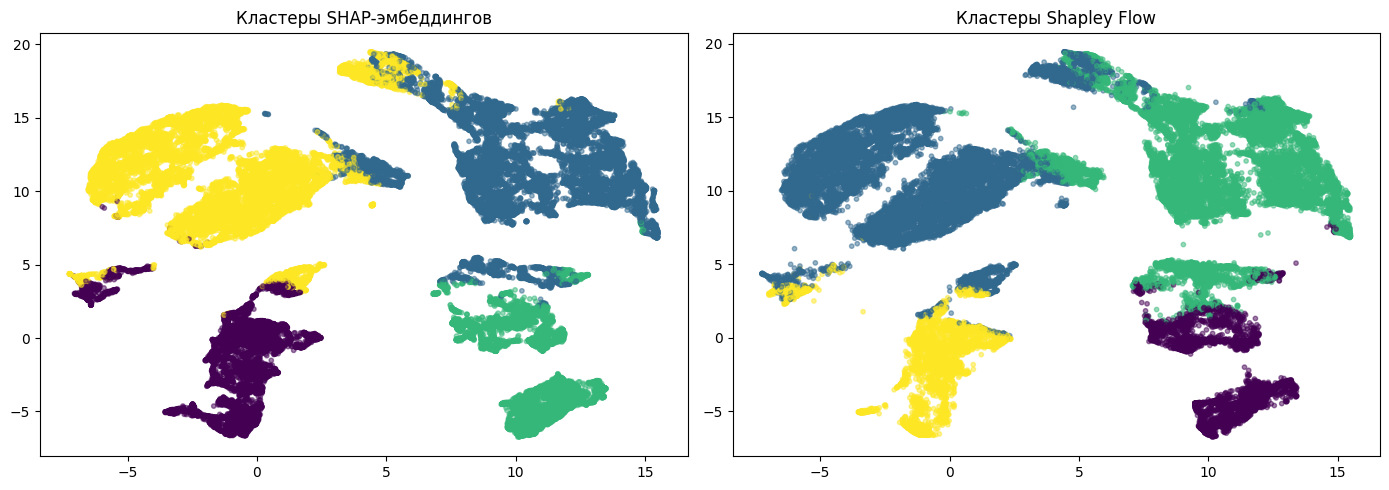

In [ ]:
flow_umap = umap_reducer.transform(flow_train_df)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(shap_umap[:, 0], shap_umap[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, s=10)
axes[0].set_title('Кластеры SHAP-эмбеддингов')
axes[1].scatter(flow_umap[:, 0], flow_umap[:, 1], c=flow_labels, cmap='viridis', alpha=0.5, s=10)
axes[1].set_title('Кластеры Shapley Flow')
plt.tight_layout()
plt.savefig('shap_vs_flow_clusters.png', dpi=150, bbox_inches='tight')
plt.show()

Итоговая оценка

In [ ]:
final_results = pd.DataFrame({
    'Эксперимент': [
        'Ridge (линейная)',
        'LightGBM (базовая)',
        'CatBoost',
        'Ensemble (weighted)',
        'LightGBM (очищенные данные)',
        'LightGBM (+ кластеры)',
        'CV: Исходные признаки',
        'CV: SHAP-эмбеддинги',
        'CV: Конкатенация'
    ],
    'RMSE': [
        results['Ridge'],
        results['LightGBM'],
        results['CatBoost'],
        results['Ensemble'],
        rmse_clean,
        rmse_cluster,
        rmse_orig,
        rmse_shap_only,
        rmse_concat
    ]
}).sort_values('RMSE')

final_results['vs Baseline (LGB)'] = (
    (final_results['RMSE'] - results['LightGBM']) / results['LightGBM'] * 100
)

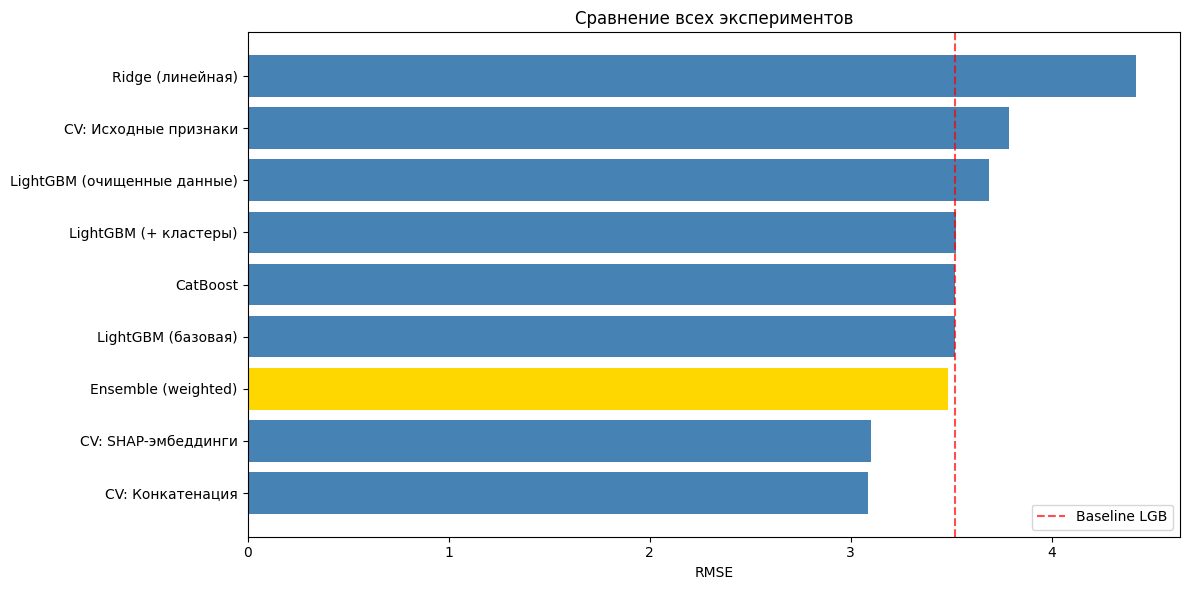

In [ ]:
final_results.to_string(index=False)
plt.figure(figsize=(12, 6))
colors = ['gold' if 'Ensemble' in e else 'steelblue' for e in final_results['Эксперимент']]
plt.barh(final_results['Эксперимент'], final_results['RMSE'], color=colors)
plt.xlabel('RMSE')
plt.title('Сравнение всех экспериментов')
plt.axvline(x=results['LightGBM'], color='red', linestyle='--', alpha=0.7, label='Baseline LGB')
plt.legend()
plt.tight_layout()
plt.savefig('final_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### Тюнинг гиперпараметров модели

В прердыдущих заданиях использовался LightGBM с базовыми гиперпараметрами. Попробуем подобрать гиперпараметры для модели LightGBM с помощью оптюны и проверим поможет ли это улучшить модель

Для тюнинга будем использовать лучшую модель по итогам предыдущего блока

In [ ]:
!pip install shap lime catboost lightgbm xgboost umap-learn optuna -q
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import shap
import lime
import lime.lime_tabular
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
from scipy.optimize import minimize
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
import umap
import networkx as nx
from tqdm import tqdm

**Загрузка и подготовка данных**

In [ ]:
# загрузка данных, работал с ноутбуком на каггле и загружал данные напрямую из соревньвания

import os
import glob
import pandas as pd
from tqdm import tqdm

train_dir = "/kaggle/input/nfl-big-data-bowl-2026-prediction/train"

input_files = sorted(
    glob.glob(os.path.join(train_dir, "input_2023_w*.csv"))
)
output_files = sorted(
    glob.glob(os.path.join(train_dir, "output_2023_w*.csv"))
)

print(f"Найдено input файлов: {len(input_files)}")
print(f"Найдено output файлов: {len(output_files)}")


Найдено input файлов: 18
Найдено output файлов: 18


In [ ]:
input_dfs = []

for file in tqdm(input_files, desc="Loading input"):
    input_dfs.append(pd.read_csv(file))

df_input = pd.concat(input_dfs, ignore_index=True)

Loading input: 100%|██████████| 18/18 [00:17<00:00,  1.06it/s]


In [ ]:
output_dfs = []

for file in tqdm(output_files, desc="Loading output"):
    output_dfs.append(pd.read_csv(file))

df_output = pd.concat(output_dfs, ignore_index=True)


Loading output: 100%|██████████| 18/18 [00:00<00:00, 39.11it/s]


In [ ]:
df = pd.merge(
    df_input,
    df_output,
    on=["game_id", "play_id", "nfl_id", "frame_id"],
    how="inner",
    suffixes=("", "_target")
)

df = df.rename(columns={
    "x": "x_start",
    "y": "y_start",
    "x_target": "x_end",
    "y_target": "y_end"
})

print(f"Загружено {len(df):,} записей")


Загружено 560,426 записей


In [ ]:
df_sample = (
    df.sample(frac=0.1, random_state=42)
      .reset_index(drop=True)
)

print(f"Используем sample: {len(df_sample):,} записей")


Используем sample: 56,043 записей


In [ ]:
def create_all_features(df):
    df = df.copy()
    df['time_remaining'] = (df['num_frames_output'] - df['frame_id']) / 10.0
    df['time_ratio'] = df['frame_id'] / df['num_frames_output'].clip(lower=1)
    df['frame_sin'] = np.sin(2 * np.pi * df['time_ratio'])
    df['frame_cos'] = np.cos(2 * np.pi * df['time_ratio'])
    df['dist_to_ball'] = np.sqrt(
        (df['ball_land_x'] - df['x_start'])**2 +
        (df['ball_land_y'] - df['y_start'])**2
    )
    df['angle_to_ball'] = np.arctan2(
        df['ball_land_y'] - df['y_start'],
        df['ball_land_x'] - df['x_start']
    )
    df['dir_rad'] = np.radians(df['dir'])
    df['vx'] = df['s'] * np.cos(df['dir_rad'])
    df['vy'] = df['s'] * np.sin(df['dir_rad'])
    df['angle_diff'] = df['dir_rad'] - df['angle_to_ball']
    df['angle_diff_cos'] = np.cos(df['angle_diff'])
    df['speed_to_ball'] = df['s'] * df['angle_diff_cos']
    t = df['time_remaining']
    df['x_kinematic'] = df['x_start'] + df['vx'] * t
    df['y_kinematic'] = df['y_start'] + df['vy'] * t
    df['x_interp'] = df['x_start'] + (df['ball_land_x'] - df['x_start']) * df['time_ratio']
    df['y_interp'] = df['y_start'] + (df['ball_land_y'] - df['y_start']) * df['time_ratio']
    df['is_targeted'] = (df['player_role'] == 'Targeted Receiver').astype(int)
    df['is_defense'] = (df['player_role'] == 'Defensive Coverage').astype(int)
    df['is_offense'] = (df['player_side'] == 'Offense').astype(int)
    df['o_rad'] = np.radians(df['o'])
    df['o_sin'] = np.sin(df['o_rad'])
    df['o_cos'] = np.cos(df['o_rad'])
    df['y_from_center'] = np.abs(df['y_start'] - 26.65)
    le = LabelEncoder()
    df['position_encoded'] = le.fit_transform(df['player_position'].fillna('UNK'))
    return df
df_sample = create_all_features(df_sample)
print(f"Features created. Shape: {df_sample.shape}")

Features created. Shape: (56043, 49)


In [ ]:
feature_cols = [
    'x_start', 'y_start', 's', 'a', 'o', 'dir',
    'ball_land_x', 'ball_land_y', 'frame_id', 'num_frames_output',
    'time_remaining', 'time_ratio', 'frame_sin', 'frame_cos',
    'dist_to_ball', 'angle_to_ball', 'vx', 'vy',
    'angle_diff_cos', 'speed_to_ball',
    'x_kinematic', 'y_kinematic', 'x_interp', 'y_interp',
    'is_targeted', 'is_defense', 'is_offense',
    'o_sin', 'o_cos', 'y_from_center', 'position_encoded'
]
feature_cols = [c for c in feature_cols if c in df_sample.columns]
print(f"Используем {len(feature_cols)} признаков")
df_clean = df_sample.dropna(subset=['x_end', 'y_end'])
X = df_clean[feature_cols].fillna(0).replace([np.inf, -np.inf], 0)
y_x = df_clean['x_end'].values
y_y = df_clean['y_end'].values
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)
X_train, X_test, y_x_train, y_x_test, y_y_train, y_y_test = train_test_split(
    X_scaled, y_x, y_y, test_size=0.2, random_state=42
)
X_train_raw = X.loc[X_train.index]
X_test_raw = X.loc[X_test.index]
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Используем 31 признаков
Train: 44834, Test: 11209


In [ ]:
models = {}
results = {}
ridge_x = Ridge(alpha=1.0, random_state=42)
ridge_x.fit(X_train, y_x_train)
ridge_y = Ridge(alpha=1.0, random_state=42)
ridge_y.fit(X_train, y_y_train)
pred_ridge_x = ridge_x.predict(X_test)
pred_ridge_y = ridge_y.predict(X_test)
rmse_ridge = np.sqrt((mean_squared_error(y_x_test, pred_ridge_x) + mean_squared_error(y_y_test, pred_ridge_y)) / 2)
print(f"Ridge RMSE: {rmse_ridge:.4f}")
models['Ridge'] = {'x': ridge_x, 'y': ridge_y, 'type': 'linear'}
results['Ridge'] = rmse_ridge

lgb_params = {
    'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.05,
    'num_leaves': 31, 'subsample': 0.8, 'colsample_bytree': 0.8,
    'random_state': 42, 'verbosity': -1, 'n_jobs': -1
}
lgb_x = lgb.LGBMRegressor(**lgb_params)
lgb_x.fit(X_train_raw, y_x_train)
lgb_y = lgb.LGBMRegressor(**lgb_params)
lgb_y.fit(X_train_raw, y_y_train)
pred_lgb_x = lgb_x.predict(X_test_raw)
pred_lgb_y = lgb_y.predict(X_test_raw)
rmse_lgb = np.sqrt((mean_squared_error(y_x_test, pred_lgb_x) + mean_squared_error(y_y_test, pred_lgb_y)) / 2)
print(f"LightGBM RMSE: {rmse_lgb:.4f}")
models['LightGBM'] = {'x': lgb_x, 'y': lgb_y, 'type': 'tree'}
results['LightGBM'] = rmse_lgb

cat_params = {
    'iterations': 500, 'depth': 8, 'learning_rate': 0.05,
    'random_seed': 42, 'verbose': False
}
cat_x = cb.CatBoostRegressor(**cat_params)
cat_x.fit(X_train_raw, y_x_train, verbose=False)
cat_y = cb.CatBoostRegressor(**cat_params)
cat_y.fit(X_train_raw, y_y_train, verbose=False)
pred_cat_x = cat_x.predict(X_test_raw)
pred_cat_y = cat_y.predict(X_test_raw)
rmse_cat = np.sqrt((mean_squared_error(y_x_test, pred_cat_x) + mean_squared_error(y_y_test, pred_cat_y)) / 2)
print(f"CatBoost RMSE: {rmse_cat:.4f}")
models['CatBoost'] = {'x': cat_x, 'y': cat_y, 'type': 'tree'}
results['CatBoost'] = rmse_cat

def ensemble_rmse(weights):
    w = np.array(weights) / sum(weights)
    pred_x = w[0]*pred_ridge_x + w[1]*pred_lgb_x + w[2]*pred_cat_x
    pred_y = w[0]*pred_ridge_y + w[1]*pred_lgb_y + w[2]*pred_cat_y
    return np.sqrt((mean_squared_error(y_x_test, pred_x) + mean_squared_error(y_y_test, pred_y)) / 2)
from scipy.optimize import minimize
result = minimize(ensemble_rmse, [0.1, 0.45, 0.45], method='Nelder-Mead')
opt_weights = np.array(result.x) / sum(result.x)
print(f"Optimal weights: Ridge={opt_weights[0]:.3f}, LGB={opt_weights[1]:.3f}, CAT={opt_weights[2]:.3f}")
pred_ens_x = opt_weights[0]*pred_ridge_x + opt_weights[1]*pred_lgb_x + opt_weights[2]*pred_cat_x
pred_ens_y = opt_weights[0]*pred_ridge_y + opt_weights[1]*pred_lgb_y + opt_weights[2]*pred_cat_y
rmse_ens = np.sqrt((mean_squared_error(y_x_test, pred_ens_x) + mean_squared_error(y_y_test, pred_ens_y)) / 2)
print(f"Ensemble RMSE: {rmse_ens:.4f}")
results['Ensemble'] = rmse_ens
for model, rmse in sorted(results.items(), key=lambda x: x[1]):
    print(f"{model}: RMSE = {rmse:.4f}")
baseline_rmse = results['Ensemble']

Ridge RMSE: 4.4167
LightGBM RMSE: 3.5197
CatBoost RMSE: 3.5206
Optimal weights: Ridge=-0.114, LGB=0.552, CAT=0.563
Ensemble RMSE: 3.4819
Ensemble: RMSE = 3.4819
LightGBM: RMSE = 3.5197
CatBoost: RMSE = 3.5206
Ridge: RMSE = 4.4167


In [ ]:
def get_shap_embeddings(model, X_data, model_type='tree'):
    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
    elif model_type == 'linear':
        explainer = shap.LinearExplainer(model, X_data)
    else:
        raise ValueError(f"Unknown model_type: {model_type}")
    shap_values = explainer.shap_values(X_data)
    return shap_values, explainer

def shap_to_dataframe(shap_values, feature_names, index=None):
    return pd.DataFrame(
        shap_values,
        columns=[f'shap_{c}' for c in feature_names],
        index=index
    )

def get_full_shap_embeddings(model, X_train, X_test, model_type='tree'):
    print(f"Computing SHAP for train ({len(X_train)} samples)")
    shap_train, explainer = get_shap_embeddings(model, X_train, model_type)
    print(f"Computing SHAP for test ({len(X_test)} samples)")
    shap_test = explainer.shap_values(X_test)
    return shap_train, shap_test, explainer

shap_train, shap_test, lgb_explainer = get_full_shap_embeddings(
    lgb_x, X_train_raw, X_test_raw, 'tree'
)
shap_train_df = shap_to_dataframe(shap_train, feature_cols, X_train_raw.index)
shap_test_df = shap_to_dataframe(shap_test, feature_cols, X_test_raw.index)

print(f"\nSHAP-эмбеддинги train: {shap_train_df.shape}")
print(f"SHAP-эмбеддинги test: {shap_test_df.shape}")

print("\nСтатистика SHAP (train):")
print(shap_train_df.describe().T[['mean', 'std', 'min', 'max']].head(10))

Computing SHAP for train (44834 samples)
Computing SHAP for test (11209 samples)

SHAP-эмбеддинги train: (44834, 31)
SHAP-эмбеддинги test: (11209, 31)

Статистика SHAP (train):
                            mean       std        min        max
shap_x_start           -0.018713  2.709190  -7.072133   6.702570
shap_y_start           -0.002751  0.064138  -0.788200   0.601970
shap_s                  0.002043  0.072473  -0.439118   1.172185
shap_a                 -0.004321  0.099883  -0.935507   0.916264
shap_o                  0.005427  0.269599  -0.752168   1.768739
shap_dir                0.006914  0.985645  -2.151399   2.264289
shap_ball_land_x       -0.013105  8.480403 -19.670502  19.751988
shap_ball_land_y       -0.021787  0.144924  -1.346082   1.083329
shap_frame_id          -0.014682  0.247235  -2.475587   3.304674
shap_num_frames_output  0.015200  0.314803  -2.703468   5.047973


In [ ]:
X_full = pd.concat([X_train_raw, X_test_raw], axis=0)
y_x_full = np.concatenate([y_x_train, y_x_test])
y_y_full = np.concatenate([y_y_train, y_y_test])
shap_full = np.vstack([shap_train, shap_test])
shap_full_df = pd.DataFrame(shap_full, columns=[f'shap_{c}' for c in feature_cols])
X_concat = pd.concat([X_full.reset_index(drop=True), shap_full_df.reset_index(drop=True)], axis=1)

**Перейдем к подбору гиперпараметров с помощью оптюны**

In [ ]:
!pip install optuna

In [ ]:
import optuna
import numpy as np
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
X_np  = X_concat.values
yx_np = y_x_full
yy_np = y_y_full

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "max_depth": trial.suggest_int("max_depth", 7, 11),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 24, 64),
        "min_child_samples": trial.suggest_int("min_child_samples", 20, 60),
        "subsample": trial.suggest_float("subsample", 0.75, 0.95),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.75, 0.95),

        "device": "cpu",
        "random_state": 42,
        "n_jobs": -1,
        "verbosity": -1
    }

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmses = []

    for train_idx, val_idx in kf.split(X_np):
        X_train, X_val = X_np[train_idx], X_np[val_idx]
        yx_train, yx_val = yx_np[train_idx], yx_np[val_idx]
        yy_train, yy_val = yy_np[train_idx], yy_np[val_idx]

        model_x = lgb.LGBMRegressor(**params)
        model_y = lgb.LGBMRegressor(**params)

        model_x.fit(X_train, yx_train)
        model_y.fit(X_train, yy_train)

        pred_x = model_x.predict(X_val)
        pred_y = model_y.predict(X_val)

        rmse = np.sqrt(
            (mean_squared_error(yx_val, pred_x) +
             mean_squared_error(yy_val, pred_y)) / 2
        )

        rmses.append(rmse)

    return np.mean(rmses)


In [ ]:
study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(seed=42)
)

study.optimize(objective, n_trials=50)

[I 2025-12-15 16:55:38,639] A new study created in memory with name: no-name-a8dbd80a-796b-4dc3-bbed-449ca5376d4b
[I 2025-12-15 16:55:59,416] Trial 0 finished with value: 3.182327141368407 and parameters: {'n_estimators': 487, 'max_depth': 11, 'learning_rate': 0.07242113527908035, 'num_leaves': 48, 'min_child_samples': 26, 'subsample': 0.7811989040672406, 'colsample_bytree': 0.7616167224336399}. Best is trial 0 with value: 3.182327141368407.
[I 2025-12-15 16:56:21,337] Trial 1 finished with value: 3.199920493683471 and parameters: {'n_estimators': 733, 'max_depth': 10, 'learning_rate': 0.07036510754376854, 'num_leaves': 24, 'min_child_samples': 59, 'subsample': 0.9164885281600843, 'colsample_bytree': 0.7924678221356553}. Best is trial 0 with value: 3.182327141368407.
[I 2025-12-15 16:56:39,576] Trial 2 finished with value: 3.2386330886741477 and parameters: {'n_estimators': 391, 'max_depth': 7, 'learning_rate': 0.04327161027436662, 'num_leaves': 45, 'min_child_samples': 37, 'subsample'

In [ ]:
def cv_rmse(X, y, model_class, params):
    scores = cross_val_score(model_class(**params), X, y, cv=kfold,
                             scoring='neg_mean_squared_error', n_jobs=-1)
    return np.sqrt(-scores).mean(), np.sqrt(-scores).std()

In [ ]:
# лучшие подобранные гиперпараметры
 {'n_estimators': 777,
 'max_depth': 11,
 'learning_rate': 0.08111512377667172,
 'num_leaves': 63,
 'min_child_samples': 22,
 'subsample': 0.9408231592817011,
 'colsample_bytree': 0.8800448499819701}

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# RMSE до тюнинга гиперпараметров (до Optuna)
lgb_cv_params = {'n_estimators': 100, 'max_depth': 6, 'random_state': 42, 'verbosity': -1}
rmse_concat, std_concat = cv_rmse(X_concat, y_x_full, lgb.LGBMRegressor, lgb_cv_params)
print(f"Исходные + SHAP-эмбеддинги:  RMSE = {rmse_concat:.4f} ± {std_concat:.4f}")

Исходные + SHAP-эмбеддинги:  RMSE = 3.0853 ± 0.0237


In [ ]:
# RMSE после тюнинга гиперпараметров (после Optuna)
lgb_cv_params = {'n_estimators': 777,
 'max_depth': 11,
 'learning_rate': 0.08111512377667172,
 'num_leaves': 63,
 'min_child_samples': 22,
 'subsample': 0.9408231592817011,
 'colsample_bytree': 0.8800448499819701}
rmse_concat, std_concat = cv_rmse(X_concat, y_x_full, lgb.LGBMRegressor, lgb_cv_params)
print(f"Исходные + SHAP-эмбеддинги:  RMSE = {rmse_concat:.4f} ± {std_concat:.4f}")

Исходные + SHAP-эмбеддинги:  RMSE = 2.8705 ± 0.0207


Модель действительно стала работать лучше после подбора гиперпараметров